This notebook imports data created drawn from a SQL Database comprised of data downloaded from ghtorrent.org

### 0.0 Import modules for analysis

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import sys

### 1.1 Import User-Language Data
This is used to calculate data on rates of diffusion.
Dataset 1: (User ID|Year|Project Count|Language) - distinct_languages.csv

Dataset 1: (User ID|Year|Project Count|Language) - distinct_languages.csv

In [35]:
with open('distinct_languages.csv') as f:
    the_data = f.readlines()

### 1.2 Place users in a nested dictionary of languages and years.
(Run time about 90 seconds for full data set - 10/18/2021)

In [38]:
time_Start = time.time()
LanguageUserDicts = {}
TotalUserDicts = {}
for the_count in range(0,len(the_data)):
    a = the_data[the_count]
    b = a.split(';')
    UserId = int(b[0][1:-1])  
    Year = int(b[1][1:-1])
    UseCases= int(b[2][1:-1])
    Language = b[3][1:-2].lower()
    UserTuple = (UserId,UseCases)
    try:
        LanguageUserDicts[Language][Year].append(UserTuple)
    except:
        try:
            LanguageUserDicts[Language][Year] = [UserTuple]
        except:
            LanguageUserDicts[Language] = {}
            LanguageUserDicts[Language][Year] = [UserTuple]
    try:
        TotalUserDicts[Year].append(UserId)
    except:
        TotalUserDicts[Year] = [UserId]
    if the_count%5000000==0:
        print(the_count)
        print(time.time()-time_Start) 
#print(LanguageUserDicts)
                
        

0
0.0
5000000
10.680429935455322
10000000
20.391419887542725
15000000
30.205203533172607
20000000
40.05884289741516
25000000
49.75291419029236
30000000
59.376174211502075
35000000
69.04128575325012
40000000
78.67580246925354
45000000
88.48930048942566
50000000
98.3219985961914
55000000
107.9841537475586


## Step 1.3 (Deprecated Viz) Create dataframe that allows for simple analysis of number of users by language by year. 

(Use for visuals of langauge use by year.) 

In [22]:
YearlyUsers_DF = pd.DataFrame()
# append columns to an empty DataFrame
NameVector = []
for x,y in LanguageUserDicts.items():
    NameVector.append(x)
YearlyUsers_DF['Name'] = NameVector
for z in range(2007,2020):
    YearVector = []
    for x,y in LanguageUserDicts.items():
        try:
            YearVector.append(len(y[z]))
        except:
            YearVector.append(0)
    YearlyUsers_DF[str(z)] = YearVector
YearlyUsers_DF = YearlyUsers_DF[1:]

In [23]:
YearlyUsers_DF

Name  2007  2008   2009   2010   2011    2012    2013    2014  \
1          ruby     3  5118  13109  23746  43910   96229  174888  167793   
2           c++     0   715   3082   7017  16913   44791  106863  134751   
3             c     0   824   3894   9929  21399   51298  120314  131108   
4         shell     0   318   1635   4391  12254   33274   76268   92672   
5    javascript     0  2220   8666  22425  57256  180558  413370  447808   
..          ...   ...   ...    ...    ...    ...     ...     ...     ...   
372     jsonnet     0     0      0      0      0       0       0       0   
373         zap     0     0      0      0      0       0       0       0   
374         zil     0     0      0      0      0       0       0       0   
375         csv     0     0      0      0      0       0       0       0   
376        ebnf     0     0      0      0      0       0       0       0   

       2015    2016    2017     2018    2019  
1    201840  169764  161507   174824   94614  
2    222516  216084  263139   402596  262956  
3    190707  180123  205557   290669  176755  
4    136444  154934  205715   263741  147030  
5    668057  757502  970623  1314315  833852  
..      ...     ...     ...      ...     ...  
372       0       0       0        1     515  
373       0       0       0        0      46  
374       0       0       0        0     116  
375       0       0       0        0       1  
376       0       0       0        0       1  

[376 rows x 14 columns]

In [24]:
Language = []
Year = []
ThisYearTotal = []
NextYearTotal = []
LastYearTotal = []
for x,y in YearlyUsers_DF.iterrows():
    for year in range(2007,2020):
        language = y['Name']
        thisyeartotal = y[str(year)]
        try:
            lastyeartotal = y[str(year-1)]
        except:
            lastyeartotal = 0
        try:
            nextyeartotal = y[str(year+1)]
        except:
            nextyeartotal = 0
        Language.append(language)
        Year.append(year)
        ThisYearTotal.append(thisyeartotal)
        NextYearTotal.append(nextyeartotal)
        LastYearTotal.append(lastyeartotal)       
column_dict = {'Language':Language,'Year':Year,'ThisYearTotal':ThisYearTotal,'NextYearTotal':NextYearTotal,'LastYearTotal':LastYearTotal}
YearOverYearFrame = pd.DataFrame(column_dict)
YearOverYearFrame.to_csv('YearOverYear.csv',sep=',')

Get dictionaries of users total across all years (to allow for sorting by overall total).

In [25]:
OverallTotals = {}
for x,y in LanguageUserDicts.items():
    for a,b in y.items():
        try:
            OverallTotals[x] += len(b) 
        except:
            OverallTotals[x] = len(b)

In [26]:
for a,b in TotalUserDicts.items():
    print(a,len(b))

2016 8673596
2009 74188
2011 392396
2012 1012509
2010 181696
2008 17881
2014 3325437
2015 6247496
2013 2433601
2007 3
2017 11304973
2018 14483644
2019 7758272


(Cell below takes 2-3 minutes)

In [39]:
YearA = []
YearB = []
YearATotal = []
YearBTotal = []
YearAandBTotal = []
for a,b in TotalUserDicts.items():
    for c,d in TotalUserDicts.items():
        if a < c:
            YearA.append(a)
            YearB.append(c)
            YearATotal.append(len(set(b)))
            YearBTotal.append(len(set(d)))
            YearAandBTotal.append(len(set(b).intersection(set(d))))
YearlyIntersections = pd.DataFrame()
YearlyIntersections['YearA'] = YearA
YearlyIntersections['YearB']= YearB
YearlyIntersections['YearATotal'] = YearATotal
YearlyIntersections['YearBTotal'] = YearBTotal
YearlyIntersections['YearAandBTotal'] = YearAandBTotal

In [40]:
YearlyIntersections

YearA  YearB  YearATotal  YearBTotal  YearAandBTotal
0    2016   2017     5183981     6856932         2217855
1    2016   2018     5183981     8281994         1855060
2    2016   2019     5183981     4573772         1049818
3    2009   2016       50189     5183981           22969
4    2009   2011       50189      253592           21813
..    ...    ...         ...         ...             ...
73   2007   2018           3     8281994               2
74   2007   2019           3     4573772               0
75   2017   2018     6856932     8281994         2937140
76   2017   2019     6856932     4573772         1563910
77   2018   2019     8281994     4573772         2362666

[78 rows x 5 columns]

In [43]:
YearOverYearIntersections = YearlyIntersections[YearlyIntersections['YearA']+1==YearlyIntersections['YearB']]

In [29]:
YearlyUsers_DF = pd.DataFrame()
NameVector=[]
YearVector=[]
UserVector=[]
LogVector=[]
OverallVector = []
YearlyUserVector = []
for x,y in LanguageUserDicts.items():
    if x!='':
        for z in range(2008,2020):
            NameVector.append(x)
            YearVector.append(z)
            OverallVector.append(OverallTotals[x])
            YearlyUserVector.append(len(TotalUserDicts[z]))
            try:
                UserVector.append(len(y[z]))
            except:
                UserVector.append(0)
            try:
                LogVector.append(math.log(len(y[z])+1))
            except:
                LogVector.append(0)
YearlyUsers_DF['Name'] = NameVector
YearlyUsers_DF['Year'] = YearVector
YearlyUsers_DF['Users'] = UserVector
YearlyUsers_DF['LogUsers'] = LogVector
YearlyUsers_DF['AllTimeUsers'] = OverallVector
YearlyUsers_DF['TotalYearlyUsers'] = YearlyUserVector
YearlyUsers_DF['PercentageUsers'] = YearlyUsers_DF['Users']/YearlyUsers_DF['TotalYearlyUsers']
YearlyUsers_DF['LogPercentageUsers'] = np.log(YearlyUsers_DF['PercentageUsers'])

C:\Users\adsir\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>100000]

Name  Year  Users  LogUsers  AllTimeUsers  TotalYearlyUsers  \
0     ruby  2008   5118         0       1327345             17881   
1     ruby  2009  13109         0       1327345             74188   
2     ruby  2010  23746         0       1327345            181696   
3     ruby  2011  43910         0       1327345            392396   
4     ruby  2012  96229         0       1327345           1012509   
...    ...   ...    ...       ...           ...               ...   
3163   vue  2015    257         0        193092           6247496   
3164   vue  2016   7146         0        193092           8673596   
3165   vue  2017  37685         0        193092          11304973   
3166   vue  2018  82995         0        193092          14483644   
3167   vue  2019  64983         0        193092           7758272   

      PercentageUsers  LogPercentageUsers  
0            0.286226           -1.250975  
1            0.176700           -1.733303  
2            0.130691           -2.034921  
3            0.111902           -2.190129  
4            0.095040           -2.353456  
...               ...                 ...  
3163         0.000041          -10.098615  
3164         0.000824           -7.101486  
3165         0.003333           -5.703736  
3166         0.005730           -5.161995  
3167         0.008376           -4.782389  

[360 rows x 8 columns]

Create visualizations of language use over time.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

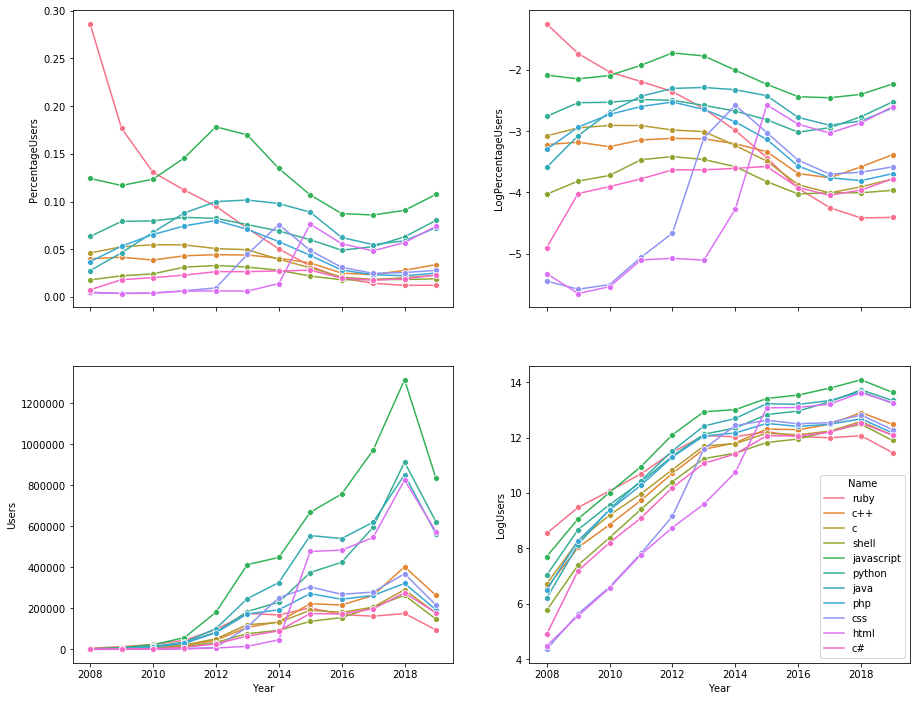

In [23]:

figure, axes = plt.subplots(2, 2, sharex=True, figsize=(15,12))

#sns.boxplot(ax=axes[0, 0], data=iris, x='species', y='petal_width')
#sns.boxplot(ax=axes[0, 1]
sns.lineplot(ax=axes[0,0],data=YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>1000000],x='Year',y= 'PercentageUsers',hue='Name', ci=None, marker='o',legend = False)
sns.lineplot(ax=axes[0,1],data=YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>1000000],x='Year',y= 'LogPercentageUsers',hue='Name', ci=None, marker='o',legend = False)
sns.lineplot(ax=axes[1,0],data=YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>1000000],x='Year',y= 'Users',hue='Name', ci=None, marker='o',legend=False)
sns.lineplot(ax=axes[1,1],data=YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>1000000],x='Year',y= 'LogUsers',hue='Name', ci=None, marker='o')
plt.savefig('GH_Figure.png')
#.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Step 2.1 - Calculate User Overlaps 
Iterate through pairs of dictionaries to get overlaps between langauge users, and changes over time.
(Run time about 15 seconds for full data- 10/18/2021.)

In [32]:
time_Start = time.time()
languages_processed = 0
#out of 377 as of 10/18/2021
LanguageUserDictsSets = {}
for x,y in LanguageUserDicts.items():
    TheLanguageUserDictsSet ={}
    for a,b in y.items():
        TheList = [tup[0] for tup in b]
        SortedList = np.sort(TheList)
        TheLanguageUserDictsSet[a]=set(SortedList)
    LanguageUserDictsSets[x] = TheLanguageUserDictsSet
    languages_processed = languages_processed+1
    if languages_processed % 100 ==0:
        print(languages_processed,time.time()-time_Start)

100 21.433693170547485
200 21.652074575424194
300 21.815674781799316


(Runtime < 10s)

In [7]:
TotalUserSummary = {}
for a,b in TotalUserDicts.items():
    TotalUserSummary[a]=len(set(b))
    print(a,len(set(b)))

2016 5183981
2009 50189
2011 253592
2012 597048
2010 121970
2008 12689
2014 1849124
2015 3354497
2013 1326928
2007 3
2017 6856932
2018 8281994
2019 4573772


Calculate overlap between years.

Create language user overlap dataset.

In [ ]:
time_Start = time.time()
for a_year in range(2007,2008):
    for a,b in LanguageUserDictsSets.items():
        for c,d in LanguageUserDictsSets.items():
            if a!=c and a!='' and c!='':
                 try:
                    LangAYear1 = b[a_year]
                    #except:
                    #    LangAYear1 = set([])
                    try:
                        LangBYear1 = d[a_year]
                    except:
                        LangBYear1 = set([])
                    try:
                        LangAYear2 = b[a_year+1]
                    except:
                        LangAYear2 = set([])
                    try:
                        LangBYear2 = d[a_year+1]
                    except:
                        LangBYear2 = set([])
                    try:
                        Year1Total = TotalUserSummary[a_year]
                    except:
                        Year1Total = 0
                    try:
                        Year2Total = TotalUserSummary[a_year+1]
                    except:
                        Year2Total = 0

## Step 2.2 Implement Set Theoretic Analysis for Language Diffusion Rates

In [33]:
import random
from random import sample

In [34]:
def estimate_intersect(set1,set2,sample_base,random_seed = 1):
    random.seed(random_seed)
    if len(list(set1)) > sample_base:
        sample1 = set(sample(list(set1),sample_base))
    else:
        sample1 = set(set1)
    if len(list(set2)) > sample_base:
        sample2 = set(sample(list(set2),sample_base))
    else:
        sample2 = set(set2)
    size1 = len(set1)
    size2 = len(set2)
    print(size1,size2)
    subsize1 = len(sample1)
    subsize2 = len(sample2)
    sample_intersection1 = sample1.intersection(set(set2))
    sample_intersection2 = sample2.intersection(set(set1))
    sample_int_size1 = len(sample_intersection1)
    sample_int_size2 = len(sample_intersection2)
    estimated_true_size = (size1)*(sample_int_size1/subsize1)
    estiamted_true_size2 = (size2)*(sample_int_size2/subsize2)
    return estimated_true_size,estiamted_true_size2

In [35]:
###get intersection of two years for base population:
time_Start = time.time()
for x in range(2010,2019):
    Year = []
    BaseSample = []
    Lang1 = []
    Lang2 = []
    L1Y1 = []
    L1Y2 = []
    L2Y1 = []
    L2Y2 = []
    L12Y1 = []
    L1_Y1 = []
    L_2Y1 = []
    L12Y2 = []
    L1_Y2 = []
    L_2Y2 = []
    L12Y1_L12Y2 = []
    L12Y1_L1_Y2 = []
    L12Y1_L_2Y2 = []
    L1_Y1_L12Y2 = []
    L1_Y1_L1_Y2 = []
    L1_Y1_L_2Y2 = []
    L_2Y1_L12Y2 = []
    L_2Y1_L1_Y2 = []
    L_2Y1_L_2Y2 = []
    IntersectingSet = set(TotalUserDicts[x]).intersection(set(TotalUserDicts[x+1]))
    SampleSize = min(250000,len(IntersectingSet))
    IntersectingSample = sample(IntersectingSet,SampleSize)
    SubsetUserDicts={}
    for a,b in LanguageUserDictsSets.items():
        try:
            LanguagePopulation = len(b[x])
            if LanguagePopulation > 249 and a!='':
                Set_Y1 = list(set(IntersectingSample).intersection(set(b[x])))
                #SubsetUserDicts_y1[a] = Set_Y1
                Set_Y2 = list(set(IntersectingSample).intersection(set(b[x+1])))
                #SubsetUserDicts_y2[a] = Set_Y2
                SubsetUserDicts[a]=(Set_Y1,Set_Y2)
        except:
            pass
    #print(len(SubsetUserDicts))
    for c,d in SubsetUserDicts.items():
        for e,f in SubsetUserDicts.items():
            if c != e:
                Year.append(x)
                BaseSample.append(SampleSize)
                Lang1.append(c)
                Lang2.append(e)
                setL1Y1 = set(d[0])
                setL1Y2 = set(d[1])
                setL2Y1 = set(f[0])
                setL2Y2 = set(f[1])
                L1Y1.append(len(d[0]))
                L1Y2.append(len(d[1]))
                L2Y1.append(len(f[0]))
                L2Y2.append(len(f[1]))
                #Year 1 Venn
                setL12Y1 = setL1Y1.intersection(setL2Y1)
                setL1_Y1 = setL1Y1.difference(setL12Y1)
                setL_2Y1 = setL2Y1.difference(setL12Y1)
                L12Y1.append(len(setL12Y1))
                L1_Y1.append(len(setL1_Y1))
                L_2Y1.append(len(setL_2Y1))
                #Year 2 Venn
                setL12Y2 = setL1Y2.intersection(setL2Y2)
                setL1_Y2 = setL1Y2.difference(setL12Y2)
                setL_2Y2 = setL2Y2.difference(setL12Y2)
                L12Y2.append(len(setL12Y2))
                L1_Y2.append(len(setL1_Y2))
                L_2Y2.append(len(setL_2Y2))
                #CrossSections
                setL12Y1_L12Y2 = setL12Y1.intersection(setL12Y2)
                setL12Y1_L1_Y2 = setL12Y1.intersection(setL1_Y2)
                setL12Y1_L_2Y2 = setL12Y1.intersection(setL_2Y2)
                setL1_Y1_L12Y2 = setL1_Y1.intersection(setL12Y2)
                setL1_Y1_L1_Y2 = setL1_Y1.intersection(setL1_Y2)
                setL1_Y1_L_2Y2 = setL1_Y1.intersection(setL_2Y2)
                setL_2Y1_L12Y2 = setL_2Y1.intersection(setL12Y2)
                setL_2Y1_L1_Y2 = setL_2Y1.intersection(setL1_Y2)
                setL_2Y1_L_2Y2 = setL_2Y1.intersection(setL_2Y2)
                L12Y1_L12Y2.append(len(setL12Y1_L12Y2))
                L12Y1_L1_Y2.append(len(setL12Y1_L1_Y2))
                L12Y1_L_2Y2.append(len(setL12Y1_L_2Y2))
                L1_Y1_L12Y2.append(len(setL1_Y1_L12Y2))
                L1_Y1_L1_Y2.append(len(setL1_Y1_L1_Y2))
                L1_Y1_L_2Y2.append(len(setL1_Y1_L_2Y2))
                L_2Y1_L12Y2.append(len(setL_2Y1_L12Y2))
                L_2Y1_L1_Y2.append(len(setL_2Y1_L1_Y2))
                L_2Y1_L_2Y2.append(len(setL_2Y1_L_2Y2))
    column_dict = {'Year':Year,
                   'BaseSample':BaseSample,
                        'Lang1':Lang1,
                        'Lang2':Lang2,
                        'L1Y1':L1Y1,
                        'L1Y2':L1Y2,
                        'L2Y1':L2Y1,
                        'L2Y2':L2Y2,
                        'L12Y1':L12Y1,
                        'L1_Y1':L1_Y1,
                        'L_2Y1':L_2Y1,
                        'L12Y2':L12Y2,
                        'L1_Y2':L1_Y2,
                        'L_2Y2':L_2Y2,
                        'L12Y1_L12Y2':L12Y1_L12Y2,
                        'L12Y1_L1_Y2':L12Y1_L1_Y2,
                        'L12Y1_L_2Y2':L12Y1_L_2Y2,
                        'L1_Y1_L12Y2':L1_Y1_L12Y2,
                        'L1_Y1_L1_Y2':L1_Y1_L1_Y2,
                        'L1_Y1_L_2Y2':L1_Y1_L_2Y2,
                        'L_2Y1_L12Y2':L_2Y1_L12Y2,
                        'L_2Y1_L1_Y2':L_2Y1_L1_Y2,
                        'L_2Y1_L_2Y2':L_2Y1_L_2Y2}
    intersection_df = pd.DataFrame(column_dict)
    csv_string = "intersection_df_10_19_250k_"+str(x)+".csv"
    intersection_df.to_csv(csv_string,sep=',')
    print("final time",time.time()-time_Start)

final time 5.9655938148498535
final time 25.224860429763794
final time 85.66095495223999
final time 176.81035685539246
final time 302.1728322505951
final time 463.9126811027527
final time 598.6385326385498
final time 740.8720757961273
final time 910.1732883453369


In [36]:
intersection_df

Year  BaseSample       Lang1        Lang2  L1Y1  L1Y2   L2Y1   L2Y2  \
0      2018      250000        ruby          c++  9752  6672  22365  18475   
1      2018      250000        ruby            c  9752  6672  16859  12561   
2      2018      250000        ruby        shell  9752  6672  16032  11133   
3      2018      250000        ruby   javascript  9752  6672  68703  60587   
4      2018      250000        ruby       python  9752  6672  49019  43995   
...     ...         ...         ...          ...   ...   ...    ...    ...   
22947  2018      250000  dockerfile  webassembly  2704  3029    133     60   
22948  2018      250000  dockerfile  angelscript  2704  3029     14     11   
22949  2018      250000  dockerfile     nextflow  2704  3029      7     10   
22950  2018      250000  dockerfile     solidity  2704  3029     95     59   
22951  2018      250000  dockerfile          rpc  2704  3029     15     11   

       L12Y1  L1_Y1  ...  L_2Y2  L12Y1_L12Y2  L12Y1_L1_Y2  L12Y1_L_2Y2  \
0       1287   8465  ...  17956          101          138          336   
1       1311   8441  ...  12068          120          152          294   
2       2081   7671  ...  10377          172          315          420   
3       4855   4897  ...  58357          684          534         1858   
4       2976   6776  ...  42703          280          269         1080   
...      ...    ...  ...    ...          ...          ...          ...   
22947     10   2694  ...     57            0            3            2   
22948      0   2704  ...     11            0            0            0   
22949      1   2703  ...     10            0            0            1   
22950      4   2700  ...     56            0            1            0   
22951      1   2703  ...     11            0            0            0   

       L1_Y1_L12Y2  L1_Y1_L1_Y2  L1_Y1_L_2Y2  L_2Y1_L12Y2  L_2Y1_L1_Y2  \
0               69         2301          294          144          274   
1               67         2270          275          124          261   
2              125         1997          336          163          337   
3              261         1130          741          718          677   
4              148         1912          631          449          520   
...            ...          ...          ...          ...          ...   
22947            1          438            5            0            3   
22948            0          442            0            0            0   
22949            0          442            1            0            0   
22950            0          441            3            0            1   
22951            0          442            1            0            0   

       L_2Y1_L_2Y2  
0             6198  
1             3612  
2             2386  
3            27980  
4            18950  
...            ...  
22947            7  
22948            1  
22949            2  
22950            6  
22951            0  

[22952 rows x 23 columns]

In [75]:
for a,b in SubsetUserDicts_y1.items():
    print(a,len(b))
for a,b in SubsetUserDicts_y2.items():
    print(a,len(b))

ruby 2888
c++ 744
c 1156
shell 566
javascript 2758
python 1742
objective-c 478
java 1288
php 1258
perl 381
scala 155
emacs lisp 218
c# 397
viml 463
actionscript 161
ruby 3210
c++ 817
c 1238
shell 900
javascript 3572
python 1977
objective-c 642
java 1545
php 1308
perl 406
scala 237
emacs lisp 221
c# 433
viml 620
actionscript 118


In [60]:
len(LanguageUserDictsSets['python'][2009])

5873

In [47]:
estimate_intersect(TotalUserDicts[2016],TotalUserDicts[2017],100)

8673596 11304973


(4597005.88, 4521989.2)

In [ ]:
 ###CODE SCRAPS   
    
    user_overlap_df = pd.DataFrame(columns = ['Year','Lang1','Lang2','TotalYear1','TotalYear2',
                                              'LangAYear1','LangAYear2','LangBYear1','LangBYear2',
                                              'A_and_B_1','A_and_B_2','A_not_B_1','A_not_B_2',
                                              'B_not_A_1','B_not_A_2','A_nor_B_1','A_nor_B_2',
                                              'A_and_B_1_A_and_B_2','A_and_B_1_A_not_B_2','A_and_B_1_B_not_A_2',
                                              'A_and_B_1_A_nor_B_2','A_not_B_1_A_and_B_2','A_not_B_1_A_not_B_2',
                                                'A_not_B_1_B_not_A_2','A_not_B_1_A_nor_B_2','B_not_A_1_A_and_B_2',
                                              'B_not_A_1_A_not_B_2','B_not_A_1_B_not_A_2','B_not_A_1_A_nor_B_2',
                                              'A_nor_B_1_A_and_B_2','A_nor_B_1_A_not_B_2','A_nor_B_1_B_not_A_2',
                                                'A_nor_B_1_A_nor_B_2'
                                              #,'A_and_B_1_Left','A_not_B_1_Left','B_not_A_1_Left',
                                              #  'A_nor_B_1_Left','A_and_B_2_New','A_not_B_2_New','B_not_A_2_New',
                                             # 'A_nor_B_2_New'
                                             ])
    


df 
                    user_overlap_df=user_overlap_df.append({'Year':a_year,'Lang1':a, 'Lang2':c, 'TotalYear1':Year1Total,'TotalYear2':Year2Total,
                                            'LangAYear1':len(LangAYear1),'LangAYear2':len(LangAYear2),
                                            'LangBYear1':len(LangBYear1),'LangBYear2':len(LangBYear2),
                                            'A_and_B_1':A_and_B_1,'A_and_B_2':A_and_B_2,'A_not_B_1':A_not_B_1,
                                            'A_not_B_2':A_not_B_2,'B_not_A_1':B_not_A_1,'B_not_A_2':B_not_A_2,
                                            'A_and_B_1_A_and_B_2':A_and_B_1_A_and_B_2,
                                            'A_and_B_1_A_not_B_2':A_and_B_1_A_not_B_2,'A_and_B_1_B_not_A_2':A_and_B_1_B_not_A_2,
                                            'A_not_B_1_A_and_B_2':A_not_B_1_A_and_B_2,'A_not_B_1_A_not_B_2':A_not_B_1_A_not_B_2,'A_not_B_1_B_not_A_2':A_not_B_1_B_not_A_2,
                                            'B_not_A_1_A_and_B_2':B_not_A_1_A_and_B_2,
                                            'B_not_A_1_A_not_B_2':B_not_A_1_A_not_B_2,'B_not_A_1_B_not_A_2':B_not_A_1_B_not_A_2
                                            #nors
                                            #'A_nor_B_1':A_nor_B_1,'A_nor_B_2':A_nor_B_2,
                                            #'A_not_B_1_A_nor_B_2':A_not_B_1_A_nor_B_2,                
                                            #'A_nor_B_1_A_and_B_2':A_nor_B_1_A_and_B_2,'A_and_B_1_A_nor_B_2':A_and_B_1_A_nor_B_2,
                                            #'B_not_A_1_A_nor_B_2':B_not_A_1_A_nor_B_2,
                                            #'A_nor_B_1_A_not_B_2':A_nor_B_1_A_not_B_2,'A_nor_B_1_B_not_A_2':A_nor_B_1_B_not_A_2,
                                            #'A_nor_B_1_A_nor_B_2':A_nor_B_1_A_nor_B_2
                                            #One-in/one-outs
                                            #,'A_and_B_1_Left':A_and_B_1_Left,
                                            #'A_not_B_1_Left':A_not_B_1_Left,'B_not_A_1_Left':B_not_A_1_Left,
                                            #'A_nor_B_1_Left':A_nor_B_1_Left,'A_and_B_2_New':A_and_B_2_New,
                                            #'A_not_B_2_New':A_not_B_2_New,'B_not_A_2_New':B_not_A_2_New,
                                            #'A_nor_B_2_New':A_nor_B_2_New
                                                           },ignore_index = True)
                

Load Frames Back in

In [61]:
OverlapFrames = []

for a_year in range(2007,2019):
    filename =  "user_overlap_10_19"+str(a_year)+".csv"
    df = pd.read_csv(filename, index_col=None, header=0)
    OverlapFrames.append(df)

user_overlap_df= pd.concat(OverlapFrames, axis=0, ignore_index=True)

In [62]:
user_overlap_df

Unnamed: 0  Year    Lang1       Lang2  TotalYear1  TotalYear2  \
0                 0  2007     ruby         NaN           3       12689   
1                 1  2007     ruby         c++           3       12689   
2                 2  2007     ruby           c           3       12689   
3                 3  2007     ruby       shell           3       12689   
4                 4  2007     ruby  javascript           3       12689   
...             ...   ...      ...         ...         ...         ...   
1041139      128587  2018  jsonnet  mcfunction     8281994     4573772   
1041140      128588  2018  jsonnet         zap     8281994     4573772   
1041141      128589  2018  jsonnet         zil     8281994     4573772   
1041142      128590  2018  jsonnet         csv     8281994     4573772   
1041143      128591  2018  jsonnet        ebnf     8281994     4573772   

         LangAYear1  LangAYear2  LangBYear1  LangBYear2  IntersectYear1  \
0                 3        5118           0        4178               0   
1                 3        5118           0         715               0   
2                 3        5118           0         824               0   
3                 3        5118           0         318               0   
4                 3        5118           0        2220               0   
...             ...         ...         ...         ...             ...   
1041139           1         515           2          95               0   
1041140           1         515           0          46               0   
1041141           1         515           0         116               0   
1041142           1         515           0           1               0   
1041143           1         515           0           1               0   

         IntersectYear2  Cannibalism  Piggybacking  
0                  1090            0             2  
1                    85            0             1  
2                   221            0             1  
3                   116            0             0  
4                   834            0             2  
...                 ...          ...           ...  
1041139               0            0             0  
1041140               0            0             0  
1041141               0            0             0  
1041142               1            0             0  
1041143               0            0             0  

[1041144 rows x 14 columns]

## Step 3 - Calculate Langauge Co-functionality
Dataset 2: ( )  project_languages_enhanced_sample/full.csv

Create a dictionary of projects by projectid/year, corresponding to a list of language used/number of bytes.

## 3.1 Project-Language Data Import

In [97]:
time_Start = time.time()
with open('project_languages_enhanced_full.csv') as g:
    ProjectLanguages = g.readlines()
    ProjectDict = {}
    ProjectYearDict = {}
    ProjectCount = 0
    for x in ProjectLanguages:
        y = x[1:-1].split('";"')
        ProjectID = y[0]
        Language = y[1]
        Bytes = y[2]
        Year1 = y[5]
        Year2 = y[6]
        LangBytePair = (Language,Bytes)
        ProjectYearPair = (ProjectID,Year1)
        try:
            ProjectDict[ProjectYearPair].append(LangBytePair)
        except:
            ProjectDict[ProjectYearPair]=[LangBytePair]
        ProjectYearDict[ProjectYearPair]=Year1
        ProjectCount +=1
        if ProjectCount % 1000000 == True:
            print(ProjectCount,time.time()-time_Start)
print("final time",time.time()-time_Start)

1 26.44490361213684
1000001 53.45809316635132
2000001 69.33162379264832
3000001 78.37049198150635
4000001 88.0226800441742
5000001 97.91490125656128
6000001 108.4976053237915
7000001 119.60030269622803
8000001 121.17508029937744
9000001 132.13303351402283
10000001 133.84444904327393
11000001 135.53090739250183
12000001 147.44719529151917
13000001 149.18052864074707
14000001 151.23856806755066
15000001 163.75207090377808
16000001 165.2989695072174
17000001 166.87874484062195
18000001 168.45250248908997
19000001 170.26868295669556
20000001 183.93913865089417
21000001 185.47003602981567
22000001 187.01689887046814
23000001 188.61662077903748
24000001 190.2153525352478
25000001 191.9427366256714
26000001 207.59288907051086
27000001 209.2244851589203
28000001 211.1104452610016
29000001 213.05627846717834
30000001 215.66828989982605
31000001 217.21315717697144
32000001 234.6285924911499
33000001 236.2352638244629
34000001 237.820059299469
35000001 239.50352454185486
36000001 241.150122165679

In [98]:
print(len(ProjectDict))
print(len(ProjectYearDict))

41659371
41659371


In [99]:
time_Start = time.time()
YearNumDicts = {}
YearNumDictTotals = {}
for theyear in range(2007,2020):
    NumDict = {}
    NumDictTotal = {}
    for a,b in ProjectDict.items():
        if int(a[1])== theyear:
            NumLangs = len(b)
            try:
                NumDictTotal[NumLangs] +=1
            except:
                NumDictTotal[NumLangs]=1
            for c in b:
                try:
                    try:
                        NumDict[c[0]][NumLangs] +=1

                    except:
                        NumDict[c[0]][NumLangs] =1
                #creates sub dictionary
                except: 
                    NumDict[c[0]]={}
                    NumDict[c[0]][NumLangs]=1
    YearNumDicts[theyear]=NumDict
    YearNumDictTotals[theyear]=NumDictTotal
    print(time.time()-time_Start,theyear)


10.616644620895386 2007
21.273149967193604 2008
31.84505581855774 2009
42.48163318634033 2010
54.15062069892883 2011
65.39228367805481 2012
77.52917766571045 2013
91.0775580406189 2014
108.9061849117279 2015
124.29603481292725 2016
143.10154390335083 2017
158.27164554595947 2018
174.41153192520142 2019


In [108]:
LangCount_DF = pd.DataFrame()
YearVec = []
LangCountVec = []
ProjCountVec = []
for a,b in YearNumDictTotals.items():
    for c,d in b.items():
        YearVec.append(a)
        LangCountVec.append(c)
        ProjCountVec.append(d)
        #print(a,c,d)
LangCount_DF['Year'] = YearVec
LangCount_DF['LanguageCount'] = LangCountVec
LangCount_DF['ProjectCount'] = ProjCountVec
LangCount_DF.to_csv('LangCount_DF.csv')

In [2]:
import pandas as pd

In [19]:
LangCount_DF = pd.read_csv("LangCount_DF.csv",sep=',',index_col=None,header=0)

In [29]:
LangCount_DF_Mult = LangCount_DF[LangCount_DF['LanguageCount']>1].reset_index()

In [30]:
LangCount_DF_Mult['LangProj'] = LangCount_DF_Mult['LanguageCount'] * LangCount_DF_Mult['ProjectCount']

In [31]:
LangCount_DF_Mult_Sum  = LangCount_DF_Mult.groupby('Year')[['ProjectCount','LangProj']].sum()

In [33]:
LangCount_DF_Mult_Sum['LangsPerProj'] = LangCount_DF_Mult_Sum['LangProj']/LangCount_DF_Mult_Sum['ProjectCount']

In [34]:
LangCount_DF_Mult_Sum

ProjectCount  LangProj  LangsPerProj
Year                                      
2008          6009     19761      3.288567
2009         17441     59429      3.407431
2010         45440    156754      3.449692
2011        131849    469962      3.564396
2012        373865   1285557      3.438559
2013        886170   3068776      3.462965
2014       1620247   5649421      3.486765
2015       4781850  18778592      3.927056
2016       2805822  10666674      3.801622
2017       5931636  23986182      4.043772
2018       2822711   8733558      3.094032
2019       3281912   9995632      3.045673

In [48]:
YearOverYearIntersections=YearOverYearIntersections.reset_index()
YearOverYearIntersections['Year'] = YearOverYearIntersections['YearA']

In [72]:
YearOverYearIntersections2 = YearOverYearIntersections.merge(LangCount_DF_Mult_Sum,on='Year')[['Year','YearB','ProjectCount','LangsPerProj','YearAandBTotal']].sort_values('Year')

In [73]:
###From Later in Analysis
FinalLanguagesPerYear = pd.DataFrame({'Year': [2010,2011,2012,2013,2014,2015,2016,2017],'FinalLanguages': [25,34,55,74,96,133,131,133]})

In [74]:
print(YearOverYearIntersections2.merge(FinalLanguagesPerYear,on='Year').sort_values('Year').to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Year &  YearB &  ProjectCount &  LangsPerProj &  YearAandBTotal &  FinalLanguages \\
\midrule
0 &  2010 &   2011 &         45440 &      3.449692 &           53822 &              25 \\
1 &  2011 &   2012 &        131849 &      3.564396 &          127130 &              34 \\
2 &  2012 &   2013 &        373865 &      3.438559 &          336115 &              55 \\
3 &  2013 &   2014 &        886170 &      3.462965 &          603260 &              74 \\
4 &  2014 &   2015 &       1620247 &      3.486765 &          928088 &              96 \\
5 &  2015 &   2016 &       4781850 &      3.927056 &         1478089 &             133 \\
6 &  2016 &   2017 &       2805822 &      3.801622 &         2217855 &             131 \\
7 &  2017 &   2018 &       5931636 &      4.043772 &         2937140 &             133 \\
\bottomrule
\end{tabular}



### 3.2 Plot languages per project

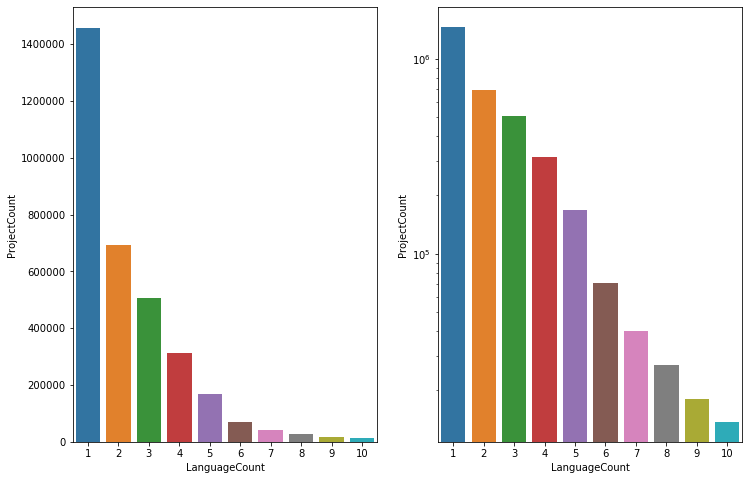

In [154]:
#Plot2 =sns.barplot(x='Year', y='ProjectCount', hue='LanguageCount',data=LangCount_DF[LangCount_DF.LanguageCount<7],col_wrap=2,col='Year').set_yscale("log")
#Plot2
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12,8))

#sns.lineplot(ax=axes[0,0],data=YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>1000000],x='Year',y= 'PercentageUsers',hue='Name', ci=None, marker='o',legend = False)
#sns.lineplot(ax=axes[0,1],data=YearlyUsers_DF[YearlyUsers_DF.AllTimeUsers>1000000],x='Year',y= 'LogPercentageUsers',hue='Name', ci=No#ne, marker='o',legend = False)



#g = sns.FacetGrid(LangCount_DF[LangCount_DF.LanguageCount<7], col="Year", col_wrap=4, height=2)
sns.barplot(ax=axes[0],data = LangCount_DF[LangCount_DF.LanguageCount<11],x="LanguageCount",y="ProjectCount",ci=None)
sns.barplot(ax=axes[1],data = LangCount_DF[LangCount_DF.LanguageCount<11],x="LanguageCount",y="ProjectCount",ci=None).set_yscale('log')
plt.savefig('GH_Bar.png')


## Step 3.3 - Create a dictionary of pairs (one weighted by total number of projects, another not weighted) for overlap between languages for each given year.

In [69]:
##Descriptive analyses - non network.
##Languages by Year? Projects with Language? Total Bytes? Total Percentage of Projects?
##Replacement -> Shift in Users; Less Overlap in Projects
##Piggybacking -> Addition in Users; More OVerlap in Projects
##Network of co-use in Projects.
time_Start = time.time()
YearPairDicts = {}
YearWeightedPairDicts = {}
for theyear in range(2007,2020):
    PairDict={}
    WeightedDict = {}
    for a,b in ProjectDict.items():
        if int(a[1])== theyear:
            total_langs = len(b)
            #print(b)
            for c in b:
                for d in b:
                    if c!=d:
                        #change back to c[1] d[1] if trying to order by bytes?
                        if c[0]<d[0]:
                            try:
                                PairDict[(c[0],d[0])]=PairDict[(c[0],d[0])]+1.0
                            except:
                                PairDict[(c[0],d[0])]=1.0
                            try:
                                WeightedDict[(c[0],d[0])]=WeightedDict[(c[0],d[0])]+(2/((total_langs)*(total_langs-1)))
                            except:
                                WeightedDict[(c[0],d[0])]=(2/((total_langs)*(total_langs-1)))
    YearPairDicts[theyear]=PairDict
    YearWeightedPairDicts[theyear]=WeightedDict
    print(time.time()-time_Start,theyear)

13.06287693977356 2007
25.838364124298096 2008
38.60723400115967 2009
51.40585255622864 2010
65.31135940551758 2011
81.85143852233887 2012
106.27394008636475 2013
137.27534580230713 2014
218.56866335868835 2015
266.786687374115 2016
367.06490683555603 2017
397.43043327331543 2018
429.75053548812866 2019


Using the NumDict and NumLangDict, we can now count expected overlaps.

Coming up with the expected probability for a pair, even when holding the number of languages constant, is really tricky! It is doable when considering double langauge pairs, but when we're considering the overlap of a pair within 3 or more, we need to start accounting for lots of different possibilities. 


Gave up on developing a formal combinatoric solution to expected number of overlaps, building simulator that might take a while, but should only need to be done once.

In [70]:
import random

What is this code doing? 
Essentially, it is creating a set of expected overlaps between langauges, while adjusting for the number of languages that appear on any given project.

In [78]:
time_Start = time.time()
#NumberOfDraws = 1000000
NumberOfDrawsFactor =2
YearExpectedPairDicts = {}
YearExpectedWeightedPairDicts = {}
for theyear in range(2007,2020):
    random.seed(123)
    ExpectedPairDict = {}
    ExpectedWeightedPairDict = {}
    #Get dictionary of counts of languages.
    NumDictTotal = YearNumDictTotals[theyear]
    for p,q in NumDictTotal.items():
        #print(p,q)
        LanguagesPerProject = p
        ProjectCount = q
        Probabilities = {}
        ProjectDist = {}
        if LanguagesPerProject > 1:
            for x,y in YearNumDicts[theyear].items():
                try:
                    ProjectDist[x] = y[LanguagesPerProject]
                except:
                    pass
            #print(ProjectDist)
            NumberOfDraws = ProjectCount*NumberOfDrawsFactor
            for z in range(0,NumberOfDraws):
                RandomDict = ProjectDist.copy()
                pickedlist = []
                #this creates the proportional without replacement selection.
                for y in range(0,LanguagesPerProject):
                    #print(RandomDict)
                    picked = random.choices(*zip(*RandomDict.items()))[0]
                    RandomDict[picked]= 0
                    pickedlist.append(picked)
                del(RandomDict)
                for a in pickedlist:
                    for b in pickedlist:
                        if a<b:
                            try:
                                Probabilities[(a,b)]+=1/NumberOfDraws
                            except:
                                Probabilities[(a,b)]=1/NumberOfDraws
                #print(P)
            for c,d in Probabilities.items():
                #print(c,d)
                try:
                    ExpectedPairDict[c] += d*ProjectCount
                except:
                    ExpectedPairDict[c] = d*ProjectCount
                try:
                    ExpectedWeightedPairDict[c] += d*ProjectCount*(2/(LanguagesPerProject*(LanguagesPerProject-1)))
                except:
                    ExpectedWeightedPairDict[c] = d*ProjectCount*(2/(LanguagesPerProject*(LanguagesPerProject-1)))
    YearExpectedPairDicts[theyear]= ExpectedPairDict
    YearExpectedWeightedPairDicts[theyear] = ExpectedWeightedPairDict
    print(time.time()-time_Start,theyear)    

0.0009641647338867188 2007
0.42154955863952637 2008
2.0464494228363037 2009
6.775164842605591 2010
23.916394472122192 2011
81.26835179328918 2012
227.95317912101746 2013
519.3618142604828 2014
1543.5899748802185 2015
2131.7988770008087 2016
3467.390166282654 2017
3958.1578969955444 2018
4491.382239580154 2019


In [79]:
sum(YearNumDictTotals[2009].values()) - YearNumDictTotals[2009][1]

17441

In [80]:
sum(YearExpectedWeightedPairDicts[2009].values())

17440.999999999305

In [81]:
sum(YearWeightedPairDicts[2009].values())

17440.999999998585

In [82]:
print(len(YearExpectedPairDicts[2011]))
print(len(YearPairDicts[2011]))
print(len(YearWeightedPairDicts[2011]))
print(len(YearExpectedWeightedPairDicts[2011]))

20271
14758
14758
20271


In [324]:
print(len(set(YearExpectedPairDicts[2009].keys()) - set(YearPairDicts[2009].keys())))
print(len(set(YearPairDicts[2009].keys()) - set(YearExpectedPairDicts[2009].keys())))
len(set(YearPairDicts[2009].keys()).union(set(YearExpectedPairDicts[2009].keys())))

2244
15


5100

Create dictionary for actual overlaps and weighted overlaps (which discount projects with many languages) for each year.


Get Observed and Expected values of co-occurrences into the same dataframe.

In [96]:
import math

In [97]:
import pandas as pd

In [83]:
df = pd.DataFrame(columns = ['Year', 'Lang1', 'Lang2','CoExp','CoExpWeighted','CoObs','CoObsWeighted'])
print(df)

Empty DataFrame
Columns: [Year, Lang1, Lang2, CoExp, CoExpWeighted, CoObs, CoObsWeighted]
Index: []


 10/15: this still need a little bit of cleaning below - a small number of observed network pairs are not caught in the expected, making total observed weights 0-1% lower than total expected weights.

This problem will improve as number of simulations increased.

In [86]:
time_Start = time.time()
count = 0
for a,b in YearExpectedPairDicts.items():
    for c,d in b.items():
        count +=1
        ExpWeighted = YearExpectedWeightedPairDicts[a][(c[0],c[1])]
        try:
            ObsActual = YearPairDicts[a][(c[0],c[1])]
        except:
            try:
                ObsActual = YearPairDicts[a][(c[1],c[0])]
            except:
                ObsActual = 0
        try:
            ObsWeighted = YearWeightedPairDicts[a][(c[0],c[1])]
        except:
            try:
                ObsWeighted = YearWeightedPairDicts[a][(c[1],c[0])]
            except:
                ObsWeighted = 0
        #print(a,c[0],c[1],d,ExpWeighted,ObsActual,ObsWeighted)
        df = df.append({'Year' : a, 'Lang1' : c[0], 'Lang2':c[1], 'CoExp': d, 'CoExpWeighted': ExpWeighted, 'CoObs' : ObsActual,'CoObsWeighted':ObsWeighted},
               ignore_index = True)
        if count%5000 ==0:
            print(count,time.time()-time_Start)        

5000 111.33769512176514
10000 216.75758385658264
15000 330.173868894577
20000 454.1736226081848
25000 575.1267940998077
30000 698.5454044342041
35000 836.3204417228699
40000 956.2819828987122
45000 1082.4440581798553
50000 1218.9815278053284
55000 1364.940420627594
60000 1502.9968745708466
65000 1634.1854903697968
70000 1774.6540546417236
75000 1923.0633780956268
80000 2079.286652803421
85000 2228.9227392673492
90000 2368.8428478240967
95000 2520.396796941757
100000 2676.068881034851
105000 2837.61035323143
110000 3004.645153284073
115000 3160.920716524124
120000 3312.5191423892975
125000 3468.8299746513367
130000 3629.650186777115
135000 3795.264135837555
140000 3964.225686788559
145000 4136.446712255478
150000 4299.2549459934235
155000 4462.945449113846
160000 4628.080249071121
165000 4799.871555328369
170000 4977.305105686188
175000 5158.774306774139
180000 5347.173550128937
185000 5542.414000511169
190000 5729.25261259079
195000 5905.983810901642
200000 6082.096496582031
205000 626

In [85]:
count = 0
for a,b in YearExpectedPairDicts.items():
    for c,d in b.items():
        count = count+1
print(count)

338844


In [87]:
df.to_csv("languageoverlap.csv",sep=',')

In [3]:
import pandas 

In [4]:
df = pandas.read_csv("languageoverlap.csv",sep=',')

In [6]:
yearly_df = pandas.read_csv("YearOverYear.csv",sep=',',index_col=None,header=0)

In [7]:
df

Unnamed: 0  Year          Lang1         Lang2  CoExp  CoExpWeighted  \
0                0  2008     javascript           php  258.5     100.566304   
1                1  2008     javascript         shell  712.5     277.200411   
2                2  2008            php         shell  232.0      38.460332   
3                3  2008          groff    javascript   40.5       3.301206   
4                4  2008          groff           php   24.5       0.543811   
...            ...   ...            ...           ...    ...            ...   
626220      626220  2019  1c enterprise  csound score    1.0       0.000673   
626221      626221  2019  1c enterprise         clips    1.0       0.000673   
626222      626222  2019  1c enterprise         jolie    1.0       0.000673   
626223      626223  2019  1c enterprise            ec    1.0       0.000673   
626224      626224  2019  1c enterprise        csound    1.0       0.000673   

        CoObs  CoObsWeighted  
0       422.0     173.314400  
1       636.0     129.784779  
2       237.0      33.721250  
3        32.0       0.590885  
4        12.0       0.092751  
...       ...            ...  
626220    1.0       0.000673  
626221    1.0       0.000673  
626222    1.0       0.000673  
626223    1.0       0.000673  
626224    1.0       0.000673  

[626225 rows x 8 columns]

In [8]:
yearly_df

Unnamed: 0 Language  Year  ThisYearTotal  NextYearTotal  LastYearTotal
0              0     ruby  2007              3           5118              0
1              1     ruby  2008           5118          13109              3
2              2     ruby  2009          13109          23746           5118
3              3     ruby  2010          23746          43910          13109
4              4     ruby  2011          43910          96229          23746
...          ...      ...   ...            ...            ...            ...
4883        4883     ebnf  2015              0              0              0
4884        4884     ebnf  2016              0              0              0
4885        4885     ebnf  2017              0              0              0
4886        4886     ebnf  2018              0              1              0
4887        4887     ebnf  2019              1              0              0

[4888 rows x 6 columns]

In [9]:
yearly_df['Lang1'] = yearly_df['Language']
yearly_df['Lang2'] = yearly_df['Language']
yearly_df['Users1'] = yearly_df['ThisYearTotal']
yearly_df['Users2'] = yearly_df['ThisYearTotal']
year_frame_1 = yearly_df[['Lang1','Year','Users1']]
year_frame_2 = yearly_df[['Lang2','Year','Users2']]

In [10]:
df = df.merge(year_frame_1,how='inner', on=['Year','Lang1'])
df = df.merge(year_frame_2,how='inner', on=['Year','Lang2'])

In [ ]:
# eventually should be reconciled

In [11]:
print(sum(df['CoObs']))
print(sum(df['CoExp']))
print(sum(df['CoObsWeighted']))
print(sum(df['CoExpWeighted']))

356380398.0
358421043.9999575
37138996.074185744
37975139.12015062


In [124]:
df_big = df[(df['Users1']>1000) & (df['Users2']>1000)]

In [128]:
print(sum(df_big['CoObs']))
print(sum(df_big['CoExp']))
print(sum(df_big['CoObsWeighted']))
print(sum(df_big['CoExpWeighted']))

292617951.0
283800560.49995744
35490280.29476711
36026601.227288544


Add different observed/expected ratios to the network.

In [12]:
df['ObsExpWeighted']=(df['CoObsWeighted']+0.1)/(df['CoExpWeighted']+0.1)

In [13]:
df['CoObsExp']=(df['CoObs']+1)/(df['CoExp']+1)

In [15]:
import numpy as np

In [16]:
df['LogCoObsExp'] = np.log(df['CoObsExp'])

In [17]:
df['LogCoObsExpWeighted'] = np.log(df['ObsExpWeighted'])

In [129]:
df_big

Unnamed: 0  Year       Lang1       Lang2   CoExp  CoExpWeighted  \
612              9  2008  javascript      python   439.0     166.757129   
613         287390  2008  javascript      python   439.0     166.757129   
924             10  2008  javascript        ruby  1472.5    1058.666808   
925         287391  2008  javascript        ruby  1472.5    1058.666808   
932             11  2008      python        ruby   461.0     151.783327   
...            ...   ...         ...         ...     ...            ...   
618617      601566  2019         asp    assembly   746.0      28.040219   
618619      599227  2019        apex    assembly    12.0       1.328421   
618832      600507  2019    assembly  autohotkey    26.0       1.108702   
618834      604894  2019         asp  autohotkey     5.0       0.234776   
618836      604367  2019        apex  autohotkey     1.5       0.166761   

         CoObs  CoObsWeighted  Users1  Users2  ObsExpWeighted  CoObsExp  \
612      465.0     148.295691    2220    1133        0.889358  1.059091   
613      465.0     148.295691    2220    1133        0.889358  1.059091   
924     2543.0    1902.220007    2220    5118        1.796732  1.726502   
925     2543.0    1902.220007    2220    5118        1.796732  1.726502   
932      333.0      41.675452    1133    5118        0.275050  0.722944   
...        ...            ...     ...     ...             ...       ...   
618617   127.0       0.744412    3412    7948        0.030007  0.171352   
618619     2.0       0.000509    2444    7948        0.070363  0.230769   
618832    24.0       0.069356    7948    1309        0.140114  0.925926   
618834     2.0       0.012915    3412    1309        0.337285  0.500000   
618836     1.0       0.000094    2444    1309        0.375221  0.800000   

        LogCoObsExp  LogCoObsExpWeighted  
612        0.057411            -0.117256  
613        0.057411            -0.117256  
924        0.546097             0.585969  
925        0.546097             0.585969  
932       -0.324424            -1.290804  
...             ...                  ...  
618617    -1.764035            -3.506315  
618619    -1.466337            -2.654082  
618832    -0.076961            -1.965298  
618834    -0.693147            -1.086828  
618836    -0.223144            -0.980239  

[39290 rows x 14 columns]

In [130]:
df_big['ObsExpWeighted']=(df_big['CoObsWeighted']+0.1)/(df_big['CoExpWeighted']+0.1)
df_big['CoObsExp']=(df_big['CoObs']+1)/(df_big['CoExp']+1)
df_big['LogCoObsExp'] = np.log(df_big['CoObsExp'])
df_big['LogCoObsExpWeighted'] = np.log(df_big['ObsExpWeighted'])

<ipython-input-130-fb929672dd52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big['ObsExpWeighted']=(df_big['CoObsWeighted']+0.1)/(df_big['CoExpWeighted']+0.1)
<ipython-input-130-fb929672dd52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big['CoObsExp']=(df_big['CoObs']+1)/(df_big['CoExp']+1)
<ipython-input-130-fb929672dd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [93]:
import seaborn as sns

Now that we have a measure of how well each pair of networks overlaps, we can look at how equivalent they are in their connection to other networks.

A *high* level of equivalence may be evidence that one network is capable of replacing another, they are substitutable, especially with a low level of overlap otherwise.

Let's now create a dataframe for overlap and equivalence for each pair of languages in any given year.

In [18]:
df

Unnamed: 0  Year          Lang1         Lang2  CoExp  CoExpWeighted  \
0                0  2008     javascript           php  258.5     100.566304   
1           287381  2008     javascript           php  258.5     100.566304   
2                4  2008          groff           php   24.5       0.543811   
3           287385  2008          groff           php   24.5       0.543811   
4              111  2008           java           php   80.5       6.230699   
...            ...   ...            ...           ...    ...            ...   
618883      622971  2019           abap          agda    3.0       0.000835   
618884      623785  2019            ada          agda    3.0       0.000835   
618885      614380  2019  1c enterprise  actionscript    0.5       0.006410   
618886      615415  2019           abap  actionscript   22.5       0.016996   
618887      614634  2019            ada         alloy    1.0       0.008222   

        CoObs  CoObsWeighted  Users1  Users2  ObsExpWeighted  CoObsExp  \
0       422.0     173.314400    2220     661        1.722666  1.630058   
1       422.0     173.314400    2220     661        1.722666  1.630058   
2        12.0       0.092751       2     661        0.299390  0.509804   
3        12.0       0.092751       2     661        0.299390  0.509804   
4       104.0       8.323803     493     661        1.330628  1.288344   
...       ...            ...     ...     ...             ...       ...   
618883    3.0       0.000835     286     184        1.000000  1.000000   
618884    3.0       0.000835     265     184        1.000000  1.000000   
618885    0.0       0.000000     236     802        0.939759  0.666667   
618886   20.0       0.006321     286     802        0.908761  0.893617   
618887    0.0       0.000000     265      23        0.924028  0.500000   

        LogCoObsExp  LogCoObsExpWeighted  
0          0.488615             0.543873  
1          0.488615             0.543873  
2         -0.673729            -1.206007  
3         -0.673729            -1.206007  
4          0.253357             0.285651  
...             ...                  ...  
618883     0.000000             0.000000  
618884     0.000000             0.000000  
618885    -0.405465            -0.062132  
618886    -0.112478            -0.095673  
618887    -0.693147            -0.079013  

[618888 rows x 14 columns]

In [131]:
import numpy.linalg

In [108]:
time_Start = time.time()
df_equiv = pd.DataFrame(columns = ['Year','Lang1', 'Lang2','Cosine','ObsExp'])
#df['weight'] = df['LogCoObsExp']
for a_year in range(2009,2021):
    df_year = df[df['Year']==a_year]
    df_year['weight'] = df_year['LogCoObsExp']
    G = nx.from_pandas_edgelist(df_year,source='Lang1',target='Lang2',edge_attr='weight')
    sample_matrix = nx.to_numpy_matrix(G)
    sample_array = np.array(sample_matrix)
    for x in range(0,len(sample_array)):
        for y in range(0,len(sample_array)):
            x_vec = sample_array[x]
            y_vec = sample_array[y]
            overlap = sample_array[x][y]
            cosine = np.dot(x_vec,y_vec/(numpy.linalg.norm(x_vec)*numpy.linalg.norm(y_vec)))
            df_equiv = df_equiv.append({'Year': a_year,'Lang1':str(np.array(G.nodes())[x]), 'Lang2':str(np.array(G.nodes())[y]), 'Cosine': cosine, 'ObsExp': overlap},
                   ignore_index = True)
    print(a_year, time.time()-time_Start)

<ipython-input-108-8eae639841d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['weight'] = df_year['LogCoObsExp']
<ipython-input-108-8eae639841d9>:15: RuntimeWarning: invalid value encountered in true_divide
  cosine = np.dot(x_vec,y_vec/(numpy.linalg.norm(x_vec)*numpy.linalg.norm(y_vec)))
<ipython-input-108-8eae639841d9>:15: RuntimeWarning: divide by zero encountered in true_divide
  cosine = np.dot(x_vec,y_vec/(numpy.linalg.norm(x_vec)*numpy.linalg.norm(y_vec)))


2009 252.2519989013672
2010 1313.0268800258636
2011 4101.169083118439
2012 10170.606305599213
2013 15216.464014530182
2014 21534.230113983154
2015 29545.076910734177
2016 39980.63808441162
2017 53380.42370343208
2018 76710.55136084557
2019 326932.93328881264
2020 326933.00724601746


In [132]:
time_Start = time.time()
#df_equiv_big = pd.DataFrame(columns = ['Year','Lang1', 'Lang2','Cosine','ObsExp'])
#df['weight'] = df['LogCoObsExp']
for a_year in range(2009,2020):
    YearVec = []
    Lang1Vec = []
    Lang2Vec = []
    CosineVec = []
    ObsExp = []
    df_year_big = df_big[df_big['Year']==a_year]
    df_year_big['weight'] = df_year_big['LogCoObsExp']
    G = nx.from_pandas_edgelist(df_year_big,source='Lang1',target='Lang2',edge_attr='weight')
    sample_matrix = nx.to_numpy_matrix(G)
    sample_array = np.array(sample_matrix)
    for x in range(0,len(sample_array)):
        for y in range(0,len(sample_array)):
            x_vec = sample_array[x]
            y_vec = sample_array[y]
            overlap = sample_array[x][y]
            cosine = np.dot(x_vec,y_vec/(numpy.linalg.norm(x_vec)*numpy.linalg.norm(y_vec)))
            YearVec.append(a_year)
            Lang1Vec.append(str(np.array(G.nodes())[x]))
            Lang2Vec.append(str(np.array(G.nodes())[y]))
            CosineVec.append(cosine)
            ObsExp.append(overlap)
    column_dict = {'Year':YearVec,'Lang1':Lang1Vec,'Lang2':Lang2Vec,'Cosine':CosineVec,'ObsExp':ObsExp}
    df_equiv_big = pd.DataFrame(column_dict)
    df_equiv_big.to_csv('df_equiv_big_'+str(a_year)+'.csv',sep=',')
    print(a_year, time.time()-time_Start)

<ipython-input-132-b7025b16e1b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_big['weight'] = df_year_big['LogCoObsExp']


2009 0.015957117080688477
2010 0.029920578002929688
2011 0.05887651443481445
2012 0.11070394515991211
2013 0.24235153198242188
2014 0.40021681785583496
2015 0.9158251285552979
2016 1.3187525272369385
2017 1.7705514430999756
2018 2.3401296138763428
2019 2.6243932247161865


In [109]:
df_equiv.to_csv("df_equiv_2009_2019.csv",sep=',')

In [133]:
pd.read_csv('df_equiv_big_2018.csv')

Unnamed: 0  Year Lang1        Lang2    Cosine    ObsExp
0              0  2018  html         html  1.000000  0.000000
1              1  2018  html   javascript  0.841341  0.515229
2              2  2018  html          css  0.860465  0.557460
3              3  2018  html         java  0.432600 -0.158866
4              4  2018  html   dockerfile  0.538825 -0.420142
...          ...   ...   ...          ...       ...       ...
9599        9599  2018  yacc   sourcepawn  0.652999  0.124873
9600        9600  2018  yacc          sqf  0.435969 -0.916291
9601        9601  2018  yacc         vala  0.482833 -0.037740
9602        9602  2018  yacc  webassembly  0.668370 -1.192138
9603        9603  2018  yacc         yacc  1.000000  0.000000

[9604 rows x 6 columns]

Join maindata frame into equivalence dataframe

In [112]:
joined_df=df_equiv.merge(user_overlap_df,how='inner', on=['Year','Lang1','Lang2'])
subset_df=joined_df[joined_df['LangAYear1']>0]
subset_df['PiggybackRate'] = subset_df['Piggybacking']/subset_df['LangAYear1']
subset_df['CannibalRate'] = subset_df['Cannibalism']/subset_df['LangAYear1']
subset_df['LogPBRate'] =np.log(pd.to_numeric(subset_df['PiggybackRate']+.001))
subset_df['LogCBRate'] =np.log(pd.to_numeric(subset_df['CannibalRate']+.001))

In [113]:
subset_df

Year       Lang1    Lang2    Cosine    ObsExp  Unnamed: 0  TotalYear1  \
0       2009  javascript     ruby  0.461111  0.626850        1881       50189   
1       2009  javascript       c#  0.274243  0.001918        1903       50189   
2       2009  javascript     java  0.272719  0.130482        1887       50189   
3       2009  javascript      php  0.551083  0.753030        1889       50189   
4       2009  javascript   python  0.319471  0.249389        1885       50189   
...      ...         ...      ...       ...       ...         ...         ...   
805223  2018       fancy      pan       NaN  0.000000       64154     8281994   
805224  2018       fancy    grace       NaN  0.000000       64211     8281994   
805225  2018       fancy      ooc       NaN  0.000000       64117     8281994   
805226  2018       fancy  omgrofl       NaN  0.000000       64182     8281994   
805227  2018       fancy     golo       NaN  0.000000       64210     8281994   

        TotalYear2  LangAYear1  LangAYear2  LangBYear1  LangBYear2  \
0           121970        8666       22425       13109       23746   
1           121970        8666       22425        1334        3662   
2           121970        8666       22425        3430       12304   
3           121970        8666       22425        3945       11884   
4           121970        8666       22425        5873       14483   
...            ...         ...         ...         ...         ...   
805223     4573772           3           3          14           1   
805224     4573772           3           3           6           3   
805225     4573772           3           3           7           4   
805226     4573772           3           3           0           0   
805227     4573772           3           3           0           1   

        IntersectYear1  IntersectYear2  Cannibalism  Piggybacking  \
0                 2752            5893          309           363   
1                  166             722           52            63   
2                  487            2013          182           245   
3                  706            2627          157           251   
4                  966            3038          211           283   
...                ...             ...          ...           ...   
805223               0               0            0             0   
805224               0               0            0             0   
805225               0               0            0             0   
805226               0               0            0             0   
805227               0               0            0             0   

        PiggybackRate  CannibalRate  LogPBRate  LogCBRate  
0            0.041888      0.035657  -3.149167  -3.306162  
1            0.007270      0.006000  -4.795146  -4.961779  
2            0.028271      0.021002  -3.531144  -3.816639  
3            0.028964      0.018117  -3.507766  -3.957189  
4            0.032656      0.024348  -3.391553  -3.675054  
...               ...           ...        ...        ...  
805223       0.000000      0.000000  -6.907755  -6.907755  
805224       0.000000      0.000000  -6.907755  -6.907755  
805225       0.000000      0.000000  -6.907755  -6.907755  
805226       0.000000      0.000000  -6.907755  -6.907755  
805227       0.000000      0.000000  -6.907755  -6.907755  

[805228 rows x 20 columns]

C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

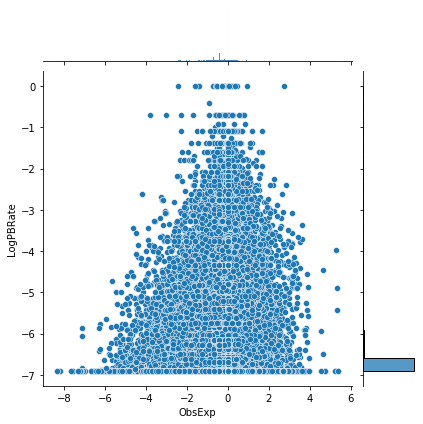

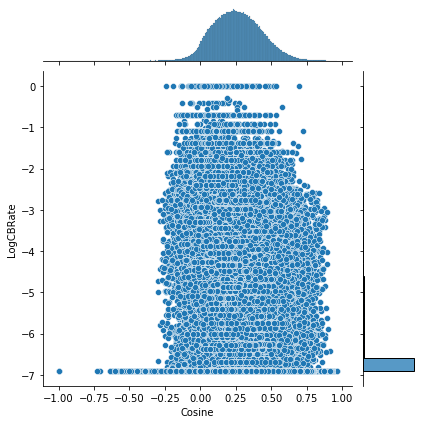

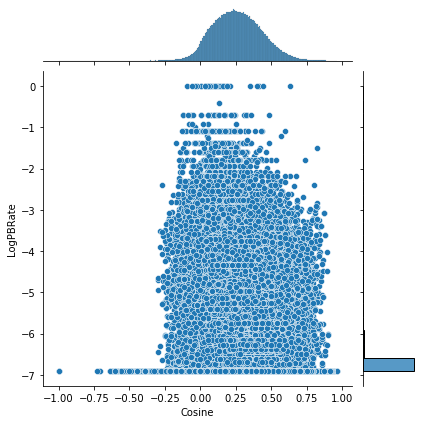

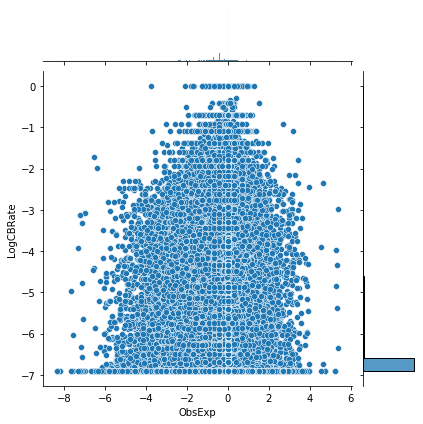

In [114]:

sns.jointplot("ObsExp", "LogPBRate", data=subset_df)
sns.jointplot("Cosine", "LogCBRate", data=subset_df)
sns.jointplot("Cosine", "LogPBRate", data=subset_df)
sns.jointplot("ObsExp", "LogCBRate", data=subset_df)

C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


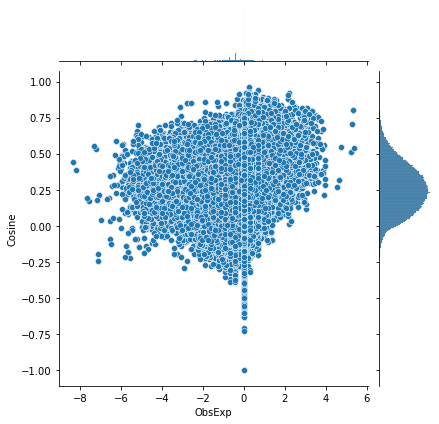

In [115]:
sns.jointplot("ObsExp", "Cosine", data=subset_df)

C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


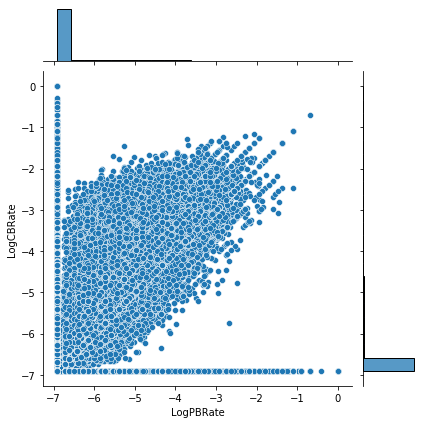

In [116]:
sns.jointplot("LogPBRate", "LogCBRate", data=subset_df)

In [663]:
for x in df_equiv['Year']:
    for y in user_overlap_df['Year']:
        if x==y:
            print(x,y)

KeyboardInterrupt: 

In [430]:
sample_array = np.array(sample_matrix)
print(len(sample_array))
print(len(sample_matrix))

243
243


In [434]:
equiv_matrix = []
obsexp_vector = []
equiv_vector = []
for x in sample_array:
    x_array = []
    for y in sample_array:
        cosine = dot(x, y)/(norm(x)*norm(y))
        x_array.append(cosine)
        #quiv_vector.append(cosine)
    equiv_matrix.append(x_array)
equiv_matrix = np.array(equiv_matrix)

In [602]:
df_equiv = pd.DataFrame(columns = ['Lang1', 'Lang2','Cosine','ObsExp'])
for x in range(0,len(sample_array)):
    for y in range(0,len(sample_array)):
        x_vec = sample_array[x]
        y_vec = sample_array[y]
        overlap = sample_array[x][y]
        cosine = dot(x_vec,y_vec/(norm(x_vec)*norm(y_vec)))
        df_equiv = df_equiv.append({'Lang1' : str(np.array(G.nodes())[x]), 'Lang2':str(np.array(G.nodes())[y]), 'Cosine': cosine, 'ObsExp': overlap},
               ignore_index = True)


KeyboardInterrupt: 

In [457]:
df_equiv

Lang1         Lang2    Cosine    ObsExp
0      javascript    javascript  1.000000  0.000000
1      javascript          ruby  0.270474  0.292426
2      javascript        python  0.145427  0.203732
3      javascript  visual basic  0.226585 -0.064449
4      javascript          html  0.431037  0.492431
...           ...           ...       ...       ...
59044           j    dockerfile  0.004795  0.000000
59045           j           ooc  0.198942  0.000000
59046           j      lilypond -0.002800  0.000000
59047           j           arc  0.165560  0.000000
59048           j             j  1.000000  0.000000

[59049 rows x 4 columns]

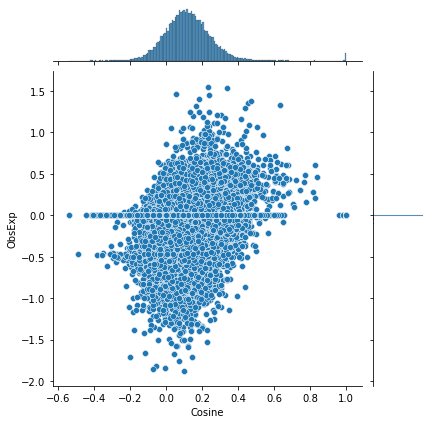

In [458]:
sns.jointplot("Cosine", "ObsExp", data=df_equiv)

Part II - Making Networks


For the most part, we now have a data frame that has expected and observed weights for each pair of lanauges.
We can now use these pairs and weights to create networks - determine how co-dependent and structurally equivalent langauges are in any given year.

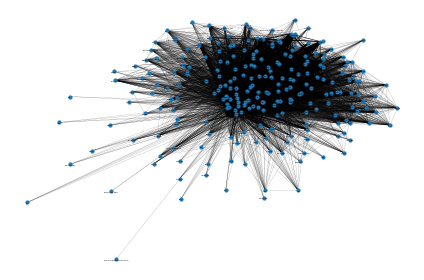

In [362]:

pos = nx.spring_layout(G, seed=1)
nx.draw_networkx_nodes(G,pos,node_size=10)
TheWeight = [G[u][v]['CoObs']*0.1 for u,v in G.edges()]
nx.draw_networkx_edges(G, pos, width=TheWeight)
nx.draw_networkx_labels(G, pos, font_size=2, font_family="sans-serif")

#weights = [G[u][v]['weight'] for u,v in edges]

#nx.draw(SampleNets[2009], pos, edges=edges, edge_color=colors, width=TheWeight)

plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
#Turn Pandas Data Frame Into Network
def PandaToNetwork(year,the_df):
    is_year = the_df['Year']==year
    year_df = the_df[is_year]
    YearNet = nx.Graph
    
    

In [63]:
###Create Function That Turns {(L1,L2,Year):Weight} Dict Into Series of Networks
def TempNetworks(PairYearDict,MinYear,MaxYear):
    YearNetsDict = {}
    for year in range(MinYear,MaxYear):
        YearNet = nx.Graph()
        for x,y in PairYearDict.items():
            if int(x[2]) == year:
                YearNet.add_edge(x[0],x[1],weight =y)             
        YearNetsDict[year]=YearNet
    return YearNetsDict

In [98]:
SampleNets = TempNetworks(PairDict,2009,2011)

In [99]:
SampleNets

{2009: <networkx.classes.graph.Graph at 0x23e7d87c1c0>,
 2010: <networkx.classes.graph.Graph at 0x23e7aca2040>}

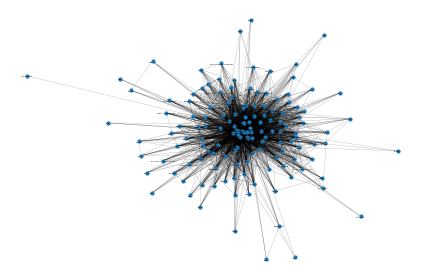

In [104]:
PlotNet = SampleNets[2009]
pos = nx.spring_layout(PlotNet, seed=1)
nx.draw_networkx_nodes(PlotNet,pos,node_size=10)
TheWeight = [SampleNets[2009][u][v]['weight']*0.1 for u,v in SampleNets[2009].edges()]
nx.draw_networkx_edges(PlotNet, pos, width=TheWeight)
nx.draw_networkx_labels(PlotNet, pos, font_size=2, font_family="sans-serif")

#weights = [G[u][v]['weight'] for u,v in edges]

#nx.draw(SampleNets[2009], pos, edges=edges, edge_color=colors, width=TheWeight)

plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
def Structural_Equivalence(OneNetwork):
    #Takes network from a certain time.
    #Calculates similarity between pairs of nodes in terms of equivalence.
    



In [366]:
sample_matrix = nx.to_numpy_matrix(G)

In [369]:
sample_matrix[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [138]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [144]:
for x,y in SampleNets[2009].edges():
    x_weights = []
    y_weights = []
    for j in SampleNets[2009].nodes():
        if j != x and j != y:   
            try:
                x_weights.append(SampleNets[2009][x][j]['weight'])
            except:
                x_weights.append(0)
            try:
                y_weights.append(SampleNets[2009][y][j]['weight'])
            except:
                y_weights.append(0)
    print(dot(x_weights, y_weights)/(norm(x_weights)*norm(y_weights)))


0.9504945799837106
0.8080934037086747
0.9607741817759338
0.9455210368538403
0.9631301795879953
0.942270119477623
0.912939484439095
0.9209217805971596
0.9181634670735864
0.6376261630193358
0.7949433386003661
0.7982192343652692
0.7887579860838911
0.7699491446817153
0.8805139663621439
0.7991784604887181
0.9016852183755005
0.9498016795831341
0.6922800996780136
0.8661748973779393
0.6630791599077759
0.701460690226693
0.8904651695364185
0.6616610272201526
0.7921608620235039
0.7430484744082648
0.7024220685658552
0.7124023515974508
0.8544558120284271
0.8373230090924008
0.7968589570471284
0.9054773829345409
0.7227453617865826
0.6221286077495572
0.7173886426801478
0.7241682585845668
0.7986813041252414
0.591872931408527
0.7395995331925895
0.7166564763626568
0.7363003575538059
0.6696574919227453
0.7242336538765772
0.7126096788387614
0.6465448261546196
0.8846741105732683
0.6081654007374667
0.666289441976376
0.5685684802111893
0.7204481536567134
0.6202932513423165
0.6875557172966938
0.775996058835276

<ipython-input-144-6ea16e7795bb>:14: RuntimeWarning: invalid value encountered in double_scalars
  print(dot(x_weights, y_weights)/(norm(x_weights)*norm(y_weights)))



0.653846268398237
0.6932809427485199
0.5867792842267731
0.5867792842267731
0.8897807134327619
0.6525095603275537
0.7317211863344054
0.5654121754488091
0.6555026370320981
0.6930804243309998
0.6442583033967375
0.6786300814455238
0.8094478673399303
0.7338397125532765
0.7219711781142342
0.6608453534915106
0.6996068317191808
0.7111678497980933
0.6624080048299292
0.7247129900757192
0.7742918002375848
0.6231164590426096
0.5971307516576031
0.6242853287933223
0.5504415715873848
0.6505552896301678
0.5981638842602045
0.676435776794509
0.6967790853018069
0.6352391575539376
0.6591618458869848
0.6863227945532508
0.7042232613764727
0.7790986414466898
0.6284516248195912
0.6435183069338956
0.7070738627093085
0.8151633765693835
0.5846067834891395
0.5846067834891395
0.6974570191508354
0.7867639553551252
0.6470938050736645
0.5924019311657606
0.7009319366699643
0.7756765758869159
0.727720418515127
0.7452969885285663
0.7556387377128216
0.6020981843392218
0.5323031845257559
0.6859690419263004
0.617574872266

0.3272135538709788
0.7678934111165266
0.3272135538709788
0.7149288585856268
0.7211861629989702
0.6359189879455778
0.604179518838936
0.604179518838936
0.8139263189972937
0.6159080185394283
0.6159080185394283
0.6159080185394283
0.6159080185394283
0.6366023543089456
0.7406800845095003
0.6931627101613875
0.5482262174504995
0.6937013105156481
0.2882229079447714
0.6994042141259867
0.5962472244699946
0.7331466886422703
0.802932425066923
0.765465544619743
0.798278329639327
0.6573448659016611
0.5590169943749475
0.677371392624533
0.7149046857290973
0.7060056539451293
0.8200728986088474
0.7053058877882965
0.7235728659282992
0.6851601597031489
0.6227523687795276
0.7369276842728008
0.729986202819304
0.6410970556652157
0.18749999999999997
0.5718696387472675
0.6502621848846116
0.6482809899997638
0.6687338550904234
0.6123724356957945
0.7453783886776517
0.7353216481879886
0.7385718420037862
0.6213742872874293
0.7071514203571476
0.6297669769942689
0.7509214330300997
0.7747852079668058
0.7041089646935474

0.5678236577711739
0.6727858097964233
0.6284073399772465
0.7020544715701815
0.5153253011206647
0.5781842565915672
0.5153253011206647
0.5402706372420929
0.6017137973262848
0.6223797895111907
0.6361313622651386
0.7094721329069636
0.6204347280531042
0.6937459350943205
1.0
0.6008049444229326
0.6204347280531042
0.713427896983352
0.7470867100159427
0.5975920963651149
0.8961366181477017
0.7528003213773146
0.6395294793910793
0.8965366658978549
0.8322248692869075
0.7558755414550202
0.7435082766222474
0.7745412583736405
0.5997646014136558
0.7163110831374132
0.8566856228572162
0.7449184719351353
0.7499797121286268
0.7182282688718172
0.5555912352210002
0.7052223095978524
0.5949621274588559
0.6657692132704052
0.8505042101240587
0.6331341845971685
0.6331341845971685
0.8077097118457849
0.6331341845971685
0.5691812366580605
0.7408824800386588
0.904209933807191
0.683550171437868
0.683550171437868
0.683550171437868
0.683550171437868
0.7477595282720085
0.551594175974806
0.551594175974806
0.85026464689365

#Thought exercise disproving 'naive' way of checking for overlap by multiplyng probabilities, included in the final cell.

In [ ]:
a = 80/100
b = 70/100
c = 50/100

a/b = 50
a/c = 30
b/c = 20

exp(a,b)= 4/5 * 7/10 = 28/50= 56/100
exp(b,c)= 7/10 * 1/2 = 7/20 = 35/100
exp(a,c) = 4/5 * 1/2 = 4/10  = 40/100

exp(a,b) = 80/(2*P) * 70/(2*P-a) + 70/(2*P) * 80/(2*P-b) = 80/200 * 70/120 + 70/200 * 80/130 = ~.449
exp(a,c) = 80/(2*P) * 50/(2*P-a) + 50/(2*P) * 80/(2*P-c) = 80/200 * 50/120 + 50/200 * 80/150 = .300
exp(b,c) = 70/(2*P) * 50/(2*P-b) + 50/(2*P) * 70/(2*P-c) = 70/200 * 50/130 + 50/200 * 70/150 = .251




In [304]:
YearExpPairDicts = {}
YearExpWeightedPairDicts = {}
for theyear in range(2007,2020):
    NumDict = YearNumDicts[theyear]
    NumDictTotal = YearNumDictTotals[theyear]
    ExpPairDict = {}
    ExpWeightedPairDict = {}
    for a,b in NumDictTotal.items():
        Languages = a
        ProjectCount = b
        for c,d in NumDict.items():
            for e,f in NumDict.items():
                if c > e and Languages >1:
                    try:
                        Lang1Count = d[a]  
                        Lang2Count = f[a] 
                        #print(c,e,Lang1Count,Lang2Count,ProjectCount)
                        ExpProbability = ProjectCount*(Lang1Count/ProjectCount)*(Lang2Count/ProjectCount)
                        #print(c,e,Lang1Count,Lang2Count,ProjectCount,ExpProbability,Languages)
                        ExpWeightedProbability = ExpProbability * (2/(Languages*(Languages-1)))
                    except:
                        pass
                    try:
                        ExpPairDict[(c,e)] += ExpProbability
                    except:
                        ExpPairDict[(c,e)] = ExpProbability
                    try:
                        ExpWeightedPairDict[(c,e)] += ExpWeightedProbability
                    except:
                        ExpWeightedPairDict[(c,e)] = ExpWeightedProbability
    YearExpPairDicts[theyear] = ExpPairDict
    YearExpWeightedPairDicts[theyear] = ExpWeightedPairDict

In [200]:
for a,b in YearExpPairDicts.items():
    for c,d in b.items():
        ExpWeighted = YearExpWeightedPairDicts[a][(c[0],c[1])]
        try:
            ObsActual = YearPairDicts[a][(c[0],c[1])]
        except:
            try:
                ObsActual = YearPairDicts[a][(c[1],c[0])]
            except:
                ObsActual = 0
        try:
            ObsWeighted = YearWeightedPairDicts[a][(c[0],c[1])]
        except:
            try:
                ObsWeighted = YearWeightedPairDicts[a][(c[1],c[0])]
            except:
                ObsWeighted = 0
        print(a,c[0],c[1],d,ExpWeighted,ObsActual,ObsWeighted)

2009 ruby javascript 146.05915957551952 46.94129774788847 69.0 21.712278244631182
2009 ruby objective-c 49.509215211608606 12.0223497630868 11.0 1.0578643578643578
2009 ruby python 97.92930138763603 24.46958695471924 28.0 2.7400857312622016
2009 ruby java 56.572848482960154 9.09233309964922 20.0 1.1016293776742692
2009 ruby css 102.18381129588688 17.35320970512897 41.0 6.890897419573888
2009 ruby html 106.99449115615668 22.14566729381865 50.0 13.01043205160852
2009 ruby perl 54.40149256447058 6.426651159401799 25.0 2.4038267125031827
2009 ruby coffeescript 32.82858454072658 4.241175778383367 3.0 0.8333333333333333
2009 ruby nginx 26.879754131369864 3.9862471056915356 2.0 0.04292929292929293
2009 ruby r 23.60136141835245 1.0106818050977484 4.0 0.18926237161531279
2009 ruby c++ 61.33101496648468 6.3118062932237455 20.0 1.0414005112534523
2009 ruby cucumber 46.48574522016808 4.486549777196777 4.0 0.5944444444444444
2009 ruby makefile 64.97466420619239 11.36870864540753 22.0 2.310885970754

2009 java common lisp 20.796935488555594 0.37426147336404153 3.0 0.3556776556776557
2009 java emacs lisp 22.700100534171376 0.7407175768826001 2.0 0.032539682539682535
2009 java haskell 19.46915293199841 0.464617532373877 2.0 0.04225023342670401
2009 java freemarker 18.477924861822967 0.4444724727551331 3.0 0.0722943722943723
2009 java antlr 18.477924861822967 0.4444724727551331 4.0 0.024462671831092884
2009 java d 17.957738230705083 0.3862391203778081 1.0 0.0015873015873015873
2009 java gosu 17.957738230705083 0.3862391203778081 1.0 0.007352941176470588
2009 java f# 17.614843319931786 0.3217535508691058 0 0
2009 java actionscript 18.574342553076317 0.6108257614570767 1.0 0.002849002849002849
2009 java erlang 19.086672855402423 0.7083234625892689 4.0 0.11761904761904762
2009 java autohotkey 18.00333952206909 0.35415679592260235 0 0
2009 java ampl 18.00333952206909 0.35415679592260235 1.0 0.027777777777777776
2009 java arduino 18.268064608447194 0.32147343882428786 2.0 0.014705882352941

2009 nginx liquid 17.547640063084874 0.3471337189817945 0 0
2009 nginx inno setup 17.49208450752932 0.34514959199766754 0 0
2009 nginx gcc machine description 17.49208450752932 0.34514959199766754 0 0
2009 nginx mako 17.49208450752932 0.34514959199766754 1.0 0.03571428571428571
2009 nginx groovy 17.450417840862652 0.3450443731424487 0 0
2009 nginx kotlin 17.450417840862652 0.3450443731424487 0 0
2009 nginx assembly 17.306411992909435 0.33835229572668707 0 0
2009 nginx gap 17.306411992909435 0.33835229572668707 0 0
2009 nginx brainfuck 17.306411992909435 0.33835229572668707 0 0
2009 nginx cmake 17.5198622853071 0.3478552197032952 0 0
2009 nginx m4 17.473078659576103 0.3429819253563166 0 0
2009 nginx dtrace 17.306411992909435 0.33835229572668707 0 0
2009 nginx groff 17.484043571856805 0.34327859506088104 0 0
2009 nginx common lisp 17.275710238523473 0.3395959351282212 0 0
2009 nginx emacs lisp 17.525710238523473 0.3444360024682885 0 0
2009 nginx haskell 17.386821349634584 0.3401370606693

2009 powershell groff 17.842028818513544 0.17032883342357372 0 0
2009 powershell common lisp 17.404383760490333 0.1535112730660974 0 0
2009 powershell emacs lisp 17.58390853173953 0.189274092493953 1.0 0.01098901098901099
2009 powershell haskell 17.03133435473171 0.15281929188520574 1.0 0.01098901098901099
2009 powershell freemarker 17.00501856525803 0.15156615905312554 0 0
2009 powershell antlr 17.00501856525803 0.15156615905312554 1.0 0.005847953216374269
2009 powershell d 16.95712292633211 0.14508167990629633 0 0
2009 powershell lex 17.242837212046396 0.1471825202424308 1.0 0.027777777777777776
2009 powershell postscript 17.242837212046396 0.1471825202424308 0 0
2009 powershell gosu 16.95712292633211 0.14508167990629633 0 0
2009 powershell logos 16.952160941538192 0.14796283236728072 0 0
2009 powershell f# 16.940924986482013 0.14683923686166275 1.0 0.027777777777777776
2009 powershell actionscript 17.056254960947918 0.16893503926966708 0 0
2009 powershell erlang 17.252954818410977 0

2009 tcl game maker language 17.14753734894112 0.9297256271650876 0 0
2009 tcl nesc 17.14753734894112 0.9297256271650876 0 0
2009 tcl raml 17.14753734894112 0.9297256271650876 0 0
2009 tcl clarion 17.14753734894112 0.9297256271650876 0 0
2009 tcl stata 17.14753734894112 0.9297256271650876 0 0
2009 smarty ruby 21.637876929614304 1.400373544531402 2.0 0.06277056277056277
2009 smarty javascript 24.721509011647235 1.6052186510320683 6.0 0.35471195471195466
2009 smarty objective-c 19.028519892121935 1.0265941629281239 1.0 0.0020161290322580645
2009 smarty python 22.745347458712054 1.3149092665158308 3.0 0.0722943722943723
2009 smarty java 19.34993532418831 1.074760876427786 1.0 0.03571428571428571
2009 smarty css 23.87546229382243 1.420591808918476 7.0 0.4567280837442127
2009 smarty html 23.95968437694649 1.396058968993654 5.0 0.288045288045288
2009 smarty perl 20.011942431521284 1.0492033953054205 1.0 0.16666666666666666
2009 smarty shell 28.23110961668259 1.7611771672204213 5.0 0.17614052

2009 processing julia 14.104611136602838 0.14720650954117104 0 0
2009 processing module management system 14.104611136602838 0.14720650954117104 0 0
2009 processing etag 14.104611136602838 0.14720650954117104 0 0
2009 processing gdb 14.104611136602838 0.14720650954117104 0 0
2009 processing e 14.104611136602838 0.14720650954117104 0 0
2009 processing factor 14.104611136602838 0.14720650954117104 0 0
2009 processing game maker language 14.104611136602838 0.14720650954117104 0 0
2009 processing nesc 14.104611136602838 0.14720650954117104 0 0
2009 processing clarion 14.104611136602838 0.14720650954117104 0 0
2009 inno setup css 15.325272809511702 0.22681235937173994 3.0 0.04025372775372775
2009 inno setup html 15.379814008013573 0.23157203477748273 3.0 0.04025372775372775
2009 inno setup coffeescript 14.581124869436795 0.16559200980869374 0 0
2009 inno setup c++ 14.662663571059767 0.1867419117170226 1.0 0.001893939393939394
2009 inno setup cucumber 14.273774682170878 0.16769429266940356 0

2009 tex gap 13.883081917495387 0.10853519417699192 1.0 0.03571428571428571
2009 tex brainfuck 13.883081917495387 0.10853519417699192 0 0
2009 tex perl6 14.133081917495387 0.11232307296487071 1.0 0.015151515151515152
2009 tex cmake 14.908457857345011 0.12345875530798338 1.0 0.03571428571428571
2009 tex plpgsql 14.829510488923958 0.11969935681174278 0 0
2009 tex m4 15.079510488923958 0.12856179067417664 1.0 0.027777777777777776
2009 tex dtrace 14.174748584162053 0.11510085074264848 0 0
2009 tex groff 14.966937389508754 0.12533961486428152 3.0 0.03797972180325122
2009 tex common lisp 13.812175484746849 0.11124736180144025 2.0 0.009369070208728653
2009 tex emacs lisp 14.367731040302406 0.1209836132043583 1.0 0.015151515151515152
2009 tex haskell 13.951064373635738 0.10484604706679217 1.0 0.007352941176470588
2009 tex freemarker 13.424748584162053 0.0960171566589544 1.0 0.03571428571428571
2009 tex antlr 13.424748584162053 0.0960171566589544 0 0
2009 tex d 13.424748584162053 0.096017156658

2009 groovy clojure 13.625124409635157 0.18558079008791034 0 0
2009 groovy dart 13.625124409635157 0.18558079008791034 0 0
2009 groovy asp 13.625124409635157 0.18558079008791034 0 0
2009 groovy augeas 13.625124409635157 0.18558079008791034 0 0
2009 groovy bison 13.562624409635157 0.18141412342124366 0 0
2009 groovy ags script 13.729291076301823 0.1839393759464962 0 0
2009 groovy eagle 13.729291076301823 0.1839393759464962 0 0
2009 groovy fortran 13.729291076301823 0.1839393759464962 0 0
2009 groovy boo 13.729291076301823 0.1839393759464962 0 0
2009 groovy awk 13.729291076301823 0.1839393759464962 0 0
2009 groovy clean 13.562624409635157 0.18141412342124366 0 0
2009 groovy digital command language 13.562624409635157 0.18141412342124366 0 0
2009 groovy 1c enterprise 13.562624409635157 0.18141412342124366 0 0
2009 groovy component pascal 13.562624409635157 0.18141412342124366 0 0
2009 groovy forth 13.562624409635157 0.18141412342124366 0 0
2009 groovy etag 13.562624409635157 0.18141412342

2009 plpgsql ampl 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql arduino 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql glsl 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql dot 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql gnuplot 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql clojure 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql piglatin 14.037935937755176 0.1165035248833785 1.0 0.004329004329004329
2009 plpgsql haxe 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql dart 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql ocaml 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql asp 14.06425172722886 0.1177566577154587 0 0
2009 plpgsql metal 14.06425172722886 0.1177566577154587 0 0
2009 plpgsql nsis 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql llvm 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql augeas 14.037935937755176 0.1165035248833785 0 0
2009 plpgsql bison 14.037935937755176 0.1165035248833785 0 0
2009 

2009 d applescript 13.87786843967107 0.14667095119715706 0 0
2009 d apacheconf 14.01318602328923 0.1583272582187579 0 0
2009 d assembly 13.90034034978343 0.148918142208393 0 0
2009 d brainfuck 13.90034034978343 0.148918142208393 0 0
2009 d cmake 13.94281847425095 0.14959558806069279 1.0 0.0015873015873015873
2009 d common lisp 13.776151807584284 0.14707033553544024 0 0
2009 d antlr 13.776151807584284 0.14707033553544024 0 0
2009 d actionscript 13.754466715020461 0.14822369026104687 1.0 0.0015873015873015873
2009 d autohotkey 13.754466715020461 0.14822369026104687 0 0
2009 d ampl 13.754466715020461 0.14822369026104687 0 0
2009 d arduino 13.715045652365728 0.14315164049274878 0 0
2009 d clojure 13.688729862892044 0.14189850766066858 0 0
2009 d asp 13.715045652365728 0.14315164049274878 1.0 0.0015873015873015873
2009 d augeas 13.715045652365728 0.14315164049274878 0 0
2009 d bison 13.715045652365728 0.14315164049274878 0 0
2009 d ags script 13.798378985699062 0.14441426675537503 0 0
2009 

2009 postscript ocaml 13.878610815272996 0.14445306095051602 0 0
2009 postscript asp 13.90492660474668 0.14570619378259622 0 0
2009 postscript metal 13.90492660474668 0.14570619378259622 0 0
2009 postscript nsis 13.878610815272996 0.14445306095051602 0 0
2009 postscript llvm 13.878610815272996 0.14445306095051602 0 0
2009 postscript augeas 13.878610815272996 0.14445306095051602 0 0
2009 postscript bison 13.857777481939664 0.1430641720616271 0 0
2009 postscript ags script 13.857777481939664 0.1430641720616271 0 0
2009 postscript eagle 13.857777481939664 0.1430641720616271 0 0
2009 postscript nemerle 13.857777481939664 0.1430641720616271 0 0
2009 postscript parrot 13.857777481939664 0.1430641720616271 0 0
2009 postscript fortran 13.857777481939664 0.1430641720616271 0 0
2009 postscript boo 13.857777481939664 0.1430641720616271 0 0
2009 postscript mathematica 13.857777481939664 0.1430641720616271 0 0
2009 postscript awk 13.884093271413347 0.1443173048937073 1.0 0.001893939393939394
2009 p

2009 logos 1c enterprise 13.59523246393246 0.1758973053149284 0 0
2009 logos component pascal 13.59523246393246 0.1758973053149284 0 0
2009 logos forth 13.59523246393246 0.1758973053149284 0 0
2009 logos julia 13.59523246393246 0.1758973053149284 0 0
2009 logos etag 13.59523246393246 0.1758973053149284 0 0
2009 logos gdb 13.59523246393246 0.1758973053149284 0 0
2009 logos e 13.59523246393246 0.1758973053149284 1.0 0.0026455026455026454
2009 logos factor 13.59523246393246 0.1758973053149284 0 0
2009 logos game maker language 13.59523246393246 0.1758973053149284 0 0
2009 logos clarion 13.59523246393246 0.1758973053149284 0 0
2009 f# css 15.493998712004725 0.3376888071840906 0 0
2009 f# coffeescript 14.163086066047464 0.19546355566026005 0 0
2009 f# c++ 14.619134571592003 0.23959820702392662 2.0 0.16666666666666669
2009 f# cucumber 13.9925005846639 0.20495962937064305 1.0 0.027777777777777776
2009 f# c 15.038327492205942 0.30286709447903354 2.0 0.16666666666666669
2009 f# batchfile 14.040

2009 sourcepawn r 15.451490798887487 0.3001911065960647 0 0
2009 sourcepawn c++ 16.08708401922647 0.3275518814144666 5.0 0.20341880341880342
2009 sourcepawn cucumber 15.951490798887487 0.30495301135796943 0 0
2009 sourcepawn makefile 15.520417352559804 0.3208363746989599 3.0 0.02393162393162393
2009 sourcepawn go 14.720417352559803 0.3105799644425496 1.0 0.0015873015873015873
2009 sourcepawn c 15.354880629395963 0.328594906186305 4.0 0.1905982905982906
2009 sourcepawn batchfile 15.235106618096527 0.29947506181222333 3.0 0.02393162393162393
2009 sourcepawn powershell 15.22663204182534 0.2980626324336923 0 0
2009 sourcepawn scala 15.209682889282966 0.2952377736766301 0 0
2009 sourcepawn php 15.486519047475058 0.3151866571848357 3.0 0.02393162393162393
2009 sourcepawn smarty 14.893298708492008 0.29488802925908913 0 0
2009 sourcepawn c# 14.276914527701047 0.28904377934704256 2.0 0.014407814407814407
2009 sourcepawn applescript 14.243016222616301 0.2833940618329182 0 0
2009 sourcepawn apach

2009 dot awk 13.73507366357021 0.12533971385729276 0 0
2009 dot clean 13.73507366357021 0.12533971385729276 0 0
2009 dot digital command language 13.73507366357021 0.12533971385729276 0 0
2009 dot 1c enterprise 13.73507366357021 0.12533971385729276 0 0
2009 dot component pascal 13.73507366357021 0.12533971385729276 0 0
2009 dot clarion 13.73507366357021 0.12533971385729276 0 0
2009 gnuplot css 14.651740330236876 0.13641474993232885 0 0
2009 gnuplot coffeescript 14.23507366357021 0.13010161861919753 0 0
2009 gnuplot c++ 14.735073663570212 0.13673942525700417 1.0 0.015151515151515152
2009 gnuplot cucumber 14.735073663570212 0.13673942525700417 0 0
2009 gnuplot c 14.901740330236876 0.1392646777822567 2.0 0.024675324675324677
2009 gnuplot batchfile 14.151740330236876 0.1297769432945222 1.0 0.009523809523809525
2009 gnuplot c# 13.98507366357021 0.1281896417072206 1.0 0.009523809523809525
2009 gnuplot applescript 13.98507366357021 0.1281896417072206 1.0 0.009523809523809525
2009 gnuplot apac

2009 racket bison 13.721756612917897 0.12775323495270116 0 0
2009 racket ags script 13.721756612917897 0.12775323495270116 0 0
2009 racket eagle 13.721756612917897 0.12775323495270116 0 0
2009 racket nemerle 13.721756612917897 0.12775323495270116 0 0
2009 racket parrot 13.721756612917897 0.12775323495270116 0 0
2009 racket fortran 13.721756612917897 0.12775323495270116 0 0
2009 racket boo 13.721756612917897 0.12775323495270116 0 0
2009 racket mathematica 13.777312168473452 0.12973736193682814 0 0
2009 racket prolog 13.777312168473452 0.12973736193682814 0 0
2009 racket awk 13.803627957947137 0.13099049476890834 0 0
2009 racket matlab 13.777312168473452 0.12973736193682814 0 0
2009 racket clean 13.777312168473452 0.12973736193682814 0 0
2009 racket objective-j 13.721756612917897 0.12775323495270116 1.0 0.03571428571428571
2009 racket digital command language 13.721756612917897 0.12775323495270116 0 0
2009 racket jupyter notebook 13.721756612917897 0.12775323495270116 0 0
2009 racket idr

2009 smalltalk augeas 13.603129161937506 0.11472590280772196 0 0
2009 smalltalk scheme 13.603129161937506 0.11472590280772196 1.0 0.001893939393939394
2009 smalltalk bison 13.603129161937506 0.11472590280772196 0 0
2009 smalltalk ags script 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk eagle 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk nemerle 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk parrot 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk fortran 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk boo 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk mathematica 13.686462495270838 0.11598852907034822 0 0
2009 smalltalk prolog 13.603129161937506 0.11472590280772196 1.0 0.001893939393939394
2009 smalltalk self 13.603129161937506 0.11472590280772196 0 0
2009 smalltalk awk 13.603129161937506 0.11472590280772196 1.0 0.001893939393939394
2009 smalltalk matlab 13.603129161937506 0.11472590280772196 0 0
2009 smalltalk clean 13.60

2009 standard ml d 13.438909934920856 0.10948862062893285 0 0
2009 standard ml lex 13.438909934920856 0.10948862062893285 1.0 0.0020161290322580645
2009 standard ml scilab 13.438909934920856 0.10948862062893285 1.0 0.0020161290322580645
2009 standard ml postscript 13.438909934920856 0.10948862062893285 0 0
2009 standard ml protocol buffer 13.438909934920856 0.10948862062893285 0 0
2009 standard ml gosu 13.438909934920856 0.10948862062893285 0 0
2009 standard ml logos 13.438909934920856 0.10948862062893285 0 0
2009 standard ml f# 13.427673979864675 0.10836502512331486 0 0
2009 standard ml actionscript 13.438909934920856 0.10948862062893285 0 0
2009 standard ml ragel in ruby host 13.450145889977035 0.11061221613455081 0 0
2009 standard ml erlang 13.438909934920856 0.10948862062893285 0 0
2009 standard ml lua 13.535117800089395 0.11702607381245343 0 0
2009 standard ml pascal 13.535117800089395 0.11702607381245343 0 0
2009 standard ml sourcepawn 13.535117800089395 0.11702607381245343 0 0
2

2009 fortran cmake 13.506621348285728 0.11212442361955546 0 0
2009 fortran dtrace 13.506621348285728 0.11212442361955546 0 0
2009 fortran common lisp 13.506621348285728 0.11212442361955546 0 0
2009 fortran emacs lisp 13.506621348285728 0.11212442361955546 0 0
2009 fortran antlr 13.506621348285728 0.11212442361955546 0 0
2009 fortran d 13.427673979864675 0.10836502512331486 0 0
2009 fortran f# 13.427673979864675 0.10836502512331486 0 0
2009 fortran actionscript 13.45398976933836 0.10961815795539506 0 0
2009 fortran erlang 13.427673979864675 0.10836502512331486 0 0
2009 fortran autohotkey 13.427673979864675 0.10836502512331486 0 0
2009 fortran ampl 13.427673979864675 0.10836502512331486 0 0
2009 fortran arduino 13.427673979864675 0.10836502512331486 0 0
2009 fortran dot 13.427673979864675 0.10836502512331486 0 0
2009 fortran clojure 13.427673979864675 0.10836502512331486 0 0
2009 fortran dart 13.427673979864675 0.10836502512331486 0 0
2009 fortran asp 13.45398976933836 0.1096181579553950

2009 self qml 13.735735801084392 0.11391533137021555 0 0
2009 self arduino 13.735735801084392 0.11391533137021555 0 0
2009 self glsl 13.735735801084392 0.11391533137021555 0 0
2009 self dot 13.735735801084392 0.11391533137021555 0 0
2009 self gnuplot 13.65240246775106 0.11265270510758928 1.0 0.015151515151515152
2009 self clojure 13.65240246775106 0.11265270510758928 0 0
2009 self piglatin 13.735735801084392 0.11391533137021555 0 0
2009 self racket 13.735735801084392 0.11391533137021555 0 0
2009 self haxe 13.735735801084392 0.11391533137021555 0 0
2009 self dart 13.735735801084392 0.11391533137021555 0 0
2009 self ocaml 13.65240246775106 0.11265270510758928 0 0
2009 self asp 13.65240246775106 0.11265270510758928 0 0
2009 self metal 13.65240246775106 0.11265270510758928 0 0
2009 self nsis 13.65240246775106 0.11265270510758928 0 0
2009 self qmake 13.65240246775106 0.11265270510758928 0 0
2009 self llvm 13.65240246775106 0.11265270510758928 0 0
2009 self augeas 13.65240246775106 0.1126527

2009 jupyter notebook cmake 14.186133813396662 0.12156384492600725 0 0
2009 jupyter notebook dtrace 14.186133813396662 0.12156384492600725 0 0
2009 jupyter notebook groff 14.177659237125475 0.12015141554747619 0 0
2009 jupyter notebook common lisp 14.177659237125475 0.12015141554747619 0 0
2009 jupyter notebook emacs lisp 14.194608389667849 0.12297627430453832 0 0
2009 jupyter notebook haskell 14.186133813396662 0.12156384492600725 0 0
2009 jupyter notebook freemarker 14.186133813396662 0.12156384492600725 0 0
2009 jupyter notebook antlr 14.186133813396662 0.12156384492600725 1.0 0.005847953216374269
2009 jupyter notebook d 14.177659237125475 0.12015141554747619 0 0
2009 jupyter notebook gosu 14.177659237125475 0.12015141554747619 0 0
2009 jupyter notebook f# 14.177659237125475 0.12015141554747619 0 0
2009 jupyter notebook actionscript 14.194608389667849 0.12297627430453832 0 0
2009 jupyter notebook erlang 14.186133813396662 0.12156384492600725 0 0
2009 jupyter notebook autohotkey 14.1

2009 pure data glsl 14.077319101071053 0.10188198656376149 0 0
2009 pure data dot 14.077319101071053 0.10188198656376149 0 0
2009 pure data gnuplot 14.077319101071053 0.10188198656376149 0 0
2009 pure data clojure 14.094325903792143 0.11888878928484992 0 0
2009 pure data piglatin 14.094325903792143 0.11888878928484992 0 0
2009 pure data haxe 14.094325903792143 0.11888878928484992 0 0
2009 pure data dart 14.094325903792143 0.11888878928484992 0 0
2009 pure data ocaml 14.094325903792143 0.11888878928484992 0 0
2009 pure data asp 14.094325903792143 0.11888878928484992 0 0
2009 pure data metal 14.094325903792143 0.11888878928484992 0 0
2009 pure data nsis 14.094325903792143 0.11888878928484992 0 0
2009 pure data llvm 14.094325903792143 0.11888878928484992 0 0
2009 pure data augeas 14.094325903792143 0.11888878928484992 0 0
2009 pure data bison 14.094325903792143 0.11888878928484992 0 0
2009 pure data ags script 14.094325903792143 0.11888878928484992 0 0
2009 pure data eagle 14.094325903792

2009 rexx perl6 14.594325903792143 0.12215676314105907 0 0
2009 rexx cmake 14.594325903792143 0.12215676314105907 0 0
2009 rexx plpgsql 14.594325903792143 0.12215676314105907 0 0
2009 rexx m4 14.594325903792143 0.12215676314105907 0 0
2009 rexx dtrace 14.594325903792143 0.12215676314105907 0 0
2009 rexx groff 14.594325903792143 0.12215676314105907 1.0 0.002849002849002849
2009 rexx common lisp 14.594325903792143 0.12215676314105907 0 0
2009 rexx emacs lisp 14.594325903792143 0.12215676314105907 0 0
2009 rexx haskell 14.594325903792143 0.12215676314105907 0 0
2009 rexx freemarker 14.594325903792143 0.12215676314105907 0 0
2009 rexx antlr 14.594325903792143 0.12215676314105907 0 0
2009 rexx d 14.594325903792143 0.12215676314105907 0 0
2009 rexx lex 14.594325903792143 0.12215676314105907 1.0 0.002849002849002849
2009 rexx postscript 14.594325903792143 0.12215676314105907 0 0
2009 rexx protocol buffer 14.594325903792143 0.12215676314105907 0 0
2009 rexx gosu 14.594325903792143 0.1221567631

2009 julia inno setup 14.760992570458807 0.1246820156663116 0 0
2009 julia gcc machine description 14.760992570458807 0.1246820156663116 0 0
2009 julia groovy 14.677659237125475 0.12341938940368534 0 0
2009 julia assembly 14.677659237125475 0.12341938940368534 0 0
2009 julia gap 14.677659237125475 0.12341938940368534 0 0
2009 julia brainfuck 14.677659237125475 0.12341938940368534 0 0
2009 julia cmake 14.677659237125475 0.12341938940368534 0 0
2009 julia dtrace 14.677659237125475 0.12341938940368534 0 0
2009 julia groff 14.760992570458807 0.1246820156663116 0 0
2009 julia common lisp 14.594325903792143 0.12215676314105907 0 0
2009 julia emacs lisp 14.760992570458807 0.1246820156663116 0 0
2009 julia haskell 14.760992570458807 0.1246820156663116 0 0
2009 julia freemarker 14.594325903792143 0.12215676314105907 0 0
2009 julia antlr 14.594325903792143 0.12215676314105907 0 0
2009 julia d 14.594325903792143 0.12215676314105907 0 0
2009 julia gosu 14.594325903792143 0.12215676314105907 0 0
20

2009 xquery forth 14.594325903792143 0.12215676314105907 0 0
2009 xquery julia 14.594325903792143 0.12215676314105907 0 0
2009 xquery module management system 14.594325903792143 0.12215676314105907 0 0
2009 xquery xproc 14.594325903792143 0.12215676314105907 1.0 0.015151515151515152
2009 xquery etag 14.594325903792143 0.12215676314105907 0 0
2009 xquery gdb 14.594325903792143 0.12215676314105907 0 0
2009 xquery rebol 14.594325903792143 0.12215676314105907 0 0
2009 xquery terra 14.594325903792143 0.12215676314105907 0 0
2009 xquery e 14.594325903792143 0.12215676314105907 0 0
2009 xquery xbase 14.594325903792143 0.12215676314105907 0 0
2009 xquery sas 14.594325903792143 0.12215676314105907 0 0
2009 xquery verilog 14.594325903792143 0.12215676314105907 0 0
2009 xquery factor 14.594325903792143 0.12215676314105907 0 0
2009 xquery game maker language 14.594325903792143 0.12215676314105907 0 0
2009 xquery nesc 14.594325903792143 0.12215676314105907 0 0
2009 xquery raml 14.594325903792143 0.

2009 xbase gnuplot 14.165754475220712 0.11900550263685739 0 0
2009 xbase clojure 14.165754475220712 0.11900550263685739 0 0
2009 xbase piglatin 14.165754475220712 0.11900550263685739 0 0
2009 xbase sqlpl 14.165754475220712 0.11900550263685739 0 0
2009 xbase racket 14.165754475220712 0.11900550263685739 0 0
2009 xbase haxe 14.165754475220712 0.11900550263685739 0 0
2009 xbase dart 14.165754475220712 0.11900550263685739 0 0
2009 xbase ocaml 14.165754475220712 0.11900550263685739 0 0
2009 xbase swift 14.165754475220712 0.11900550263685739 0 0
2009 xbase smalltalk 14.165754475220712 0.11900550263685739 1.0 0.0026455026455026454
2009 xbase asp 14.165754475220712 0.11900550263685739 0 0
2009 xbase metal 14.165754475220712 0.11900550263685739 0 0
2009 xbase nsis 14.165754475220712 0.11900550263685739 0 0
2009 xbase qmake 14.165754475220712 0.11900550263685739 0 0
2009 xbase llvm 14.165754475220712 0.11900550263685739 0 0
2009 xbase standard ml 14.165754475220712 0.11900550263685739 0 0
2009 x

2009 nesc gosu 13.676990430276893 0.11686112428626622 0 0
2009 nesc logos 13.676990430276893 0.11686112428626622 0 0
2009 nesc f# 13.665754475220712 0.11573752878064823 0 0
2009 nesc actionscript 13.676990430276893 0.11686112428626622 0 0
2009 nesc erlang 13.676990430276893 0.11686112428626622 0 0
2009 nesc lua 13.710698295445432 0.12023191080312015 0 0
2009 nesc autohotkey 13.710698295445432 0.12023191080312015 0 0
2009 nesc ampl 13.710698295445432 0.12023191080312015 0 0
2009 nesc arduino 13.665754475220712 0.11573752878064823 0 0
2009 nesc glsl 13.665754475220712 0.11573752878064823 0 0
2009 nesc dot 13.665754475220712 0.11573752878064823 0 0
2009 nesc gnuplot 13.665754475220712 0.11573752878064823 0 0
2009 nesc clojure 13.665754475220712 0.11573752878064823 0 0
2009 nesc haxe 13.665754475220712 0.11573752878064823 0 0
2009 nesc dart 13.665754475220712 0.11573752878064823 0 0
2009 nesc asp 13.665754475220712 0.11573752878064823 0 0
2009 nesc metal 13.665754475220712 0.11573752878064

2010 lua coldfusion 19.374611119092513 0.1317713240117703 2.0 0.0047430830039525695
2010 lua gdb 19.374611119092513 0.1317713240117703 1.0 0.000546448087431694
2010 lua idl 19.24568254766394 0.12450941924986554 1.0 0.0011614401858304297
2010 lua lex 18.899393420124813 0.10628389477434105 2.0 0.00285102916681864
2010 lua gap 19.26513906371777 0.10196920654225608 0 0
2010 lua f# 19.284678753227084 0.10688281108738977 0 0
2010 lua boo 19.162229773635246 0.10348145054317208 0 0
2010 lua haskell 18.708183742031267 0.15759620763472745 2.0 0.33483483483483484
2010 lua d 18.56279902884929 0.11432200351690727 7.0 0.19328358310982652
2010 lua freemarker 18.446257675465834 0.10972718313261323 1.0 0.00041407867494824016
2010 lua inno setup 18.388757675465833 0.10405257995801007 0 0
2010 lua common lisp 18.396345499875466 0.1131284996057382 2.0 0.00217154119593144
2010 lua antlr 18.324916928446896 0.11154119801843662 1.0 0.0015015015015015015
2010 lua frege 18.324916928446896 0.11154119801843662 0 

2010 java factor 20.438196901786604 0.2614684079779374 0 0
2010 java handlebars 20.438196901786604 0.2614684079779374 1.0 0.047619047619047616
2010 cmake c++ 42.335333369162846 0.8556460697965251 26.0 1.0009121545808848
2010 cmake c 45.568152648248464 1.1699734555498147 23.0 0.9185585547350252
2010 cmake batchfile 30.82688056236014 0.4224090078698099 6.0 0.14353527735880678
2010 cmake awk 23.563923692564522 0.2098795683934136 1.0 0.007352941176470588
2010 cmake c# 24.286368718792346 0.29032832851103624 3.0 0.023986313438646097
2010 cmake applescript 22.61599827573886 0.21917161486380532 1.0 0.006535947712418301
2010 cmake clojure 20.25544600896022 0.16553443933792597 0 0
2010 cmake actionscript 20.328949436153927 0.15157842855805423 1.0 0.015151515151515152
2010 cmake apacheconf 21.99490731769847 0.22875065270900266 1.0 0.06666666666666667
2010 cmake asp 20.305574122405375 0.1351982981519975 1.0 0.0022988505747126436
2010 cmake assembly 23.041337077097815 0.16788051697071132 5.0 0.0619

2010 shell boo 36.07033145075776 0.9818639605245393 0 0
2010 shell haskell 44.798808229611076 3.2915099321254546 17.0 1.6296572829181522
2010 shell d 40.9066582593919 1.844527818332415 9.0 0.20353712785829725
2010 shell piglatin 40.05249159272523 1.8038532151578117 1.0 0.047619047619047616
2010 shell freemarker 37.575047983702675 1.6799601491594827 4.0 0.057547191370720785
2010 shell inno setup 35.1311194122741 1.131190307889641 4.0 0.1355921855921856
2010 shell nix 35.1311194122741 1.131190307889641 5.0 0.07837859781593796
2010 shell common lisp 35.427892120948414 1.6883796832306122 7.0 2.106914624199884
2010 shell antlr 34.49932069237698 1.6677447625956914 3.0 0.028986881618460567
2010 shell frege 34.49932069237698 1.6677447625956914 1.0 0.007352941176470588
2010 shell mathematica 34.49932069237698 1.6677447625956914 2.0 0.010686274509803922
2010 shell bluespec 34.49932069237698 1.6677447625956914 1.0 0.01098901098901099
2010 shell mercury 34.49932069237698 1.6677447625956914 1.0 0.0

2010 php coldfusion 25.679349334172706 1.0534416351999814 3.0 0.014266892527762094
2010 php perl6 25.242031106737784 1.0460836464382324 5.0 0.3871764847174683
2010 php gdb 24.122800337507012 1.0343703597249458 2.0 0.015697963238946847
2010 php idl 23.016550337507013 0.8066392672879715 1.0 0.0011614401858304297
2010 php nginx 22.748383785164048 0.4489320863315303 1.0 0.03571428571428571
2010 php lex 22.150991594021853 0.36648606013550417 4.0 0.030556656872446346
2010 php maxscript 22.43670587973614 0.3728352664847106 0 0
2010 php gap 22.825199738818235 0.3768555925638602 0 0
2010 php m 22.425199738818236 0.36256987827814585 3.0 0.003521068861248579
2010 php f# 22.792873891086323 0.4043000314757093 1.0 0.01098901098901099
2010 php boo 22.50715960537204 0.3963635235392013 0 0
2010 php haskell 25.113912758246133 1.3499762439985976 5.0 0.02053029879116836
2010 php d 23.449186450001434 0.6356978873607942 5.0 0.03506291201566033
2010 php freemarker 22.77249472067813 0.6032835181043196 1.0 0.0

2010 xslt perl 50.43599471054506 1.1353013054931536 21.0 0.4515406449100593
2010 xslt go 28.929516932120002 0.23394552517894168 2.0 0.03111111111111111
2010 xslt m4 28.564153872704583 0.31370961660915553 8.0 0.06919498034942634
2010 xslt groovy 25.89745154035208 0.2847772298556072 3.0 0.14206349206349206
2010 xslt clojure 23.486555004485076 0.2409802585733568 1.0 0.000546448087431694
2010 xslt smarty 23.147497994243857 0.2374026161005905 6.0 0.06191134573487514
2010 xslt actionscript 24.18372495405511 0.2570094928591998 4.0 0.039171122994652405
2010 xslt groff 27.78763583347047 0.2838235598722933 8.0 0.058058440738743236
2010 xslt apacheconf 27.380921055442013 0.4113397817160448 11.0 0.2315953654188948
2010 xslt prolog 23.250838022001023 0.2585458168224 2.0 0.036260733801717404
2010 xslt plpgsql 22.57848701461242 0.17255262316003334 3.0 0.05316465144051351
2010 xslt asp 24.379026374938938 0.2236951535183003 10.0 0.10826706536645683
2010 xslt sqlpl 20.9210547247404 0.1483374035807184 4.

2010 protocol buffer haxe 17.871265925359367 0.07533013791571415 1.0 0.00041407867494824016
2010 protocol buffer liquid 17.871265925359367 0.07533013791571415 1.0 0.00041407867494824016
2010 protocol buffer dot 17.891467945561384 0.07735033993591617 0 0
2010 protocol buffer ada 17.891467945561384 0.07735033993591617 2.0 0.0009605267623799341
2010 protocol buffer eiffel 17.891467945561384 0.07735033993591617 2.0 0.0009605267623799341
2010 protocol buffer cobol 17.891467945561384 0.07735033993591617 2.0 0.0009605267623799341
2010 protocol buffer blitzbasic 17.891467945561384 0.07735033993591617 1.0 0.000546448087431694
2010 protocol buffer llvm 17.891467945561384 0.07735033993591617 0 0
2010 protocol buffer io 17.891467945561384 0.07735033993591617 1.0 0.00041407867494824016
2010 protocol buffer flux 17.891467945561384 0.07735033993591617 0 0
2010 protocol buffer bison 17.891467945561384 0.07735033993591617 0 0
2010 protocol buffer augeas 17.891467945561384 0.07735033993591617 0 0
2010 p

2010 viml hack 17.12990445193892 0.1549593281517778 0 0
2010 viml supercollider 17.12990445193892 0.1549593281517778 1.0 0.0009250693802035153
2010 viml jupyter notebook 17.12990445193892 0.1549593281517778 0 0
2010 viml delphi 17.12990445193892 0.1549593281517778 0 0
2010 viml krl 17.12990445193892 0.1549593281517778 1.0 0.0009250693802035153
2010 viml terra 17.12990445193892 0.1549593281517778 1.0 0.0009250693802035153
2010 viml chuck 17.092261244082945 0.11731612029580395 1.0 0.0009250693802035153
2010 viml turing 17.092261244082945 0.11731612029580395 0 0
2010 viml game maker language 17.092261244082945 0.11731612029580395 0 0
2010 viml myghty 17.092261244082945 0.11731612029580395 0 0
2010 viml ampl 17.092261244082945 0.11731612029580395 0 0
2010 viml opa 17.092261244082945 0.11731612029580395 0 0
2010 viml limbo 17.092261244082945 0.11731612029580395 0 0
2010 viml mirah 17.092261244082945 0.11731612029580395 0 0
2010 viml factor 17.092261244082945 0.11731612029580395 0 0
2010 vim

2010 perl llvm 24.378406114903328 0.3395886213415577 2.0 0.019683319683319683
2010 perl io 24.378406114903328 0.3395886213415577 2.0 0.16816816816816815
2010 perl flux 24.378406114903328 0.3395886213415577 0 0
2010 perl bison 24.378406114903328 0.3395886213415577 1.0 0.005847953216374269
2010 perl augeas 24.378406114903328 0.3395886213415577 0 0
2010 perl arduino 23.389688166185376 0.3211270828800192 2.0 0.044047619047619044
2010 perl livescript 23.389688166185376 0.3211270828800192 1.0 0.00041407867494824016
2010 perl lsl 23.389688166185376 0.3211270828800192 1.0 0.00041407867494824016
2010 perl abap 23.389688166185376 0.3211270828800192 1.0 0.00041407867494824016
2010 perl autohotkey 23.28362756012477 0.3105210222739586 1.0 0.00041407867494824016
2010 perl mask 23.52203815615126 0.3502561216117069 2.0 0.3333333333333333
2010 perl cirru 23.52203815615126 0.3502561216117069 1.0 0.00041407867494824016
2010 perl dart 23.52203815615126 0.3502561216117069 1.0 0.00041407867494824016
2010 pe

2010 smarty harbour 17.77954256474237 0.07960379921037426 0 0
2010 smarty openscad 17.77954256474237 0.07960379921037426 0 0
2010 smarty elm 17.77954256474237 0.07960379921037426 0 0
2010 smarty clean 17.77954256474237 0.07960379921037426 0 0
2010 smarty ec 17.712875898075705 0.07722284682942189 0 0
2010 smarty ragel in ruby host 17.715108040932847 0.0779668944484695 0 0
2010 smarty elixir 17.734134401477064 0.07864008038951259 0 0
2010 smarty mako 17.800801068143734 0.08102103277046498 1.0 0.0033333333333333335
2010 smarty haxe 17.759134401477063 0.07903690578633799 0 0
2010 smarty liquid 17.759134401477063 0.07903690578633799 0 0
2010 smarty dot 17.92308156542423 0.0813290580784903 0 0
2010 smarty ada 17.92308156542423 0.0813290580784903 0 0
2010 smarty eiffel 17.92308156542423 0.0813290580784903 0 0
2010 smarty rust 17.92308156542423 0.0813290580784903 0 0
2010 smarty cobol 17.92308156542423 0.0813290580784903 0 0
2010 smarty blitzbasic 17.92308156542423 0.0813290580784903 0 0
2010 

2010 plpgsql nemerle 16.547919811592134 0.06373756123672068 0 0
2010 plpgsql max 16.547919811592134 0.06373756123672068 0 0
2010 plpgsql oxygene 16.547919811592134 0.06373756123672068 0 0
2010 plpgsql gosu 16.547919811592134 0.06373756123672068 0 0
2010 plpgsql openedge abl 16.542869306541633 0.06323251073167017 0 0
2010 plpgsql clips 16.542869306541633 0.06323251073167017 0 0
2010 plpgsql objective-j 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql gettext catalog 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql diff 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql nu 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql pike 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql parrot 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql hcl 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql cap'n proto 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql 1c enterprise 16.557906900526593 0.06423501699733433 0 0
2010 plpgsql mtml 16.557906900526593 0

2010 plsql opa 15.68455549902366 0.06729126571175414 0 0
2010 plsql limbo 15.68455549902366 0.06729126571175414 0 0
2010 plsql mirah 15.68455549902366 0.06729126571175414 0 0
2010 plsql factor 15.68455549902366 0.06729126571175414 0 0
2010 plsql handlebars 15.68455549902366 0.06729126571175414 0 0
2010 nsis c++ 23.634985431762306 0.1859994112413331 7.0 0.13152518978605932
2010 nsis javascript 23.935092795281875 0.23313023655957069 3.0 0.02446538968278099
2010 nsis lua 18.287672104517533 0.10104732119492153 1.0 0.00041407867494824016
2010 nsis c 24.031744374573883 0.1956824612494605 6.0 0.08193277310924368
2010 nsis java 19.705193419263527 0.13280477968977983 2.0 0.006251419744673118
2010 nsis cmake 18.032665556443757 0.08611653992325609 3.0 0.01835860781094047
2010 nsis glsl 16.834217995601236 0.07821993139639544 1.0 0.00041407867494824016
2010 nsis makefile 22.680424899415396 0.1858921468690263 4.0 0.05930296756383713
2010 nsis html 24.33205205745565 0.22742766108698192 3.0 0.03402919

2010 visual basic eiffel 17.466035953225695 0.07243045745391169 1.0 0.000546448087431694
2010 visual basic rust 17.466035953225695 0.07243045745391169 1.0 0.000546448087431694
2010 visual basic cobol 17.466035953225695 0.07243045745391169 1.0 0.000546448087431694
2010 visual basic blitzbasic 17.466035953225695 0.07243045745391169 3.0 0.002717989283363134
2010 visual basic purebasic 17.466035953225695 0.07243045745391169 1.0 0.000546448087431694
2010 visual basic llvm 17.466035953225695 0.07243045745391169 0 0
2010 visual basic pure data 17.466035953225695 0.07243045745391169 0 0
2010 visual basic io 17.466035953225695 0.07243045745391169 1.0 0.00041407867494824016
2010 visual basic flux 17.466035953225695 0.07243045745391169 0 0
2010 visual basic bison 17.466035953225695 0.07243045745391169 0 0
2010 visual basic augeas 17.466035953225695 0.07243045745391169 0 0
2010 visual basic arduino 17.285523132712875 0.07019602521947946 0 0
2010 visual basic livescript 17.285523132712875 0.0701960

2010 puppet prolog 16.96316541263429 0.1032865484180854 0 0
2010 puppet plpgsql 16.5008192875814 0.06928983224091806 0 0
2010 puppet asp 16.7370827140046 0.09330527760034839 2.0 0.08333333333333333
2010 puppet plsql 16.634079670682006 0.08736433397143484 0 0
2010 puppet nsis 16.644820809242695 0.08649310828817908 0 0
2010 puppet assembly 16.84213664347112 0.08705490464414836 0 0
2010 puppet logos 16.625995641615837 0.08320346507842309 0 0
2010 puppet dtrace 16.625995641615837 0.08320346507842309 0 0
2010 puppet gcc machine description 16.524965367065825 0.0700106819843242 0 0
2010 puppet pascal 16.68689921955419 0.07518457902852199 1.0 0.1
2010 puppet e 16.65564921955419 0.07369648379042675 0 0
2010 puppet erlang 17.013794725364168 0.20579603506760957 1.0 0.1
2010 puppet cucumber 16.94350888495145 0.11678323204634798 0 0
2010 puppet coldfusion 16.84975888495145 0.11231894633206227 0 0
2010 puppet perl6 16.615658007758466 0.12038946986311211 0 0
2010 puppet gdb 16.615658007758466 0.1203

2010 vue python 16.792020168166896 0.08750132108135927 0 0
2010 vue shell 17.19803520576088 0.11456899025429161 0 0
2010 vue html 16.964952498993966 0.09903014313649713 1.0 0.06666666666666667
2010 vue csound document 16.964952498993966 0.09903014313649713 0 0
2010 vue css 16.995027686963887 0.10103515566782545 1.0 0.06666666666666667
2010 vue batchfile 16.543899867415014 0.0709599676979006 0 0
2010 vue postscript 16.438636709520278 0.06394242383825148 0 0
2010 vue php 16.619087837339826 0.0759724990262214 1.0 0.06666666666666667
2010 vue coffeescript 16.491268288467648 0.06745119576807604 0 0
2010 vue awk 16.438636709520278 0.06394242383825148 0 0
2010 vue powershell 16.431117912527796 0.06344117070541941 0 0
2010 vue emacs lisp 16.476230694482684 0.06644868950241188 0 0
2010 vue fortran 16.431117912527796 0.06344117070541941 0 0
2010 vue cuda 16.431117912527796 0.06344117070541941 0 0
2010 vue sourcepawn 16.431117912527796 0.06344117070541941 0 0
2010 vue protocol buffer 16.446155506

2010 e c# 16.511553376186946 0.0674146460604737 1.0 0.000546448087431694
2010 e applescript 16.511553376186946 0.0674146460604737 0 0
2010 e clojure 16.511553376186946 0.0674146460604737 1.0 0.000546448087431694
2010 e actionscript 16.449053376186946 0.06443845558428322 1.0 0.000546448087431694
2010 e apacheconf 16.511553376186946 0.0674146460604737 0 0
2010 e asp 16.490720042853614 0.0664225825684102 1.0 0.000546448087431694
2010 e assembly 16.438636709520278 0.06394242383825148 1.0 0.000546448087431694
2010 e dtrace 16.438636709520278 0.06394242383825148 0 0
2010 e cucumber 16.469886709520278 0.06543051907634671 0 0
2010 e coldfusion 16.438636709520278 0.06394242383825148 0 0
2010 e boo 16.438636709520278 0.06394242383825148 0 0
2010 e d 16.438636709520278 0.06394242383825148 1.0 0.000546448087431694
2010 e common lisp 16.438636709520278 0.06394242383825148 1.0 0.000546448087431694
2010 e antlr 16.438636709520278 0.06394242383825148 0 0
2010 e bluespec 16.438636709520278 0.0639424238

2010 thrift nginx 15.912544513399006 0.08565707583900002 0 0
2010 thrift lex 15.902127846732338 0.08516104409296828 0 0
2010 thrift maxscript 15.92593737054186 0.08569014462206881 0 0
2010 thrift gap 15.902127846732338 0.08516104409296828 0 0
2010 thrift m 15.87546118006567 0.08420866314058732 0 0
2010 thrift racket 15.888794513399004 0.08468485361677781 0 0
2010 thrift f# 15.87546118006567 0.08420866314058732 0 0
2010 thrift boo 15.855053016800365 0.08364176971655106 0 0
2010 thrift haskell 15.878803016800365 0.08461399193877327 0 0
2010 thrift d 15.923020703875196 0.08570998589191009 0 0
2010 thrift piglatin 15.912604037208528 0.08521395414587833 1.0 0.0033333333333333335
2010 thrift freemarker 15.888794513399004 0.08468485361677781 0 0
2010 thrift tex 16.01856492156227 0.08913780146258278 0 0
2010 thrift inno setup 15.930945873943223 0.0866510289758103 0 0
2010 thrift nix 15.878862540609887 0.08417087024565158 0 0
2010 thrift common lisp 15.878862540609887 0.08417087024565158 0 0
20

2010 coldfusion bluespec 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion cartocss 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion clean 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion ada 16.11416291794542 0.06647845765397593 1.0 0.00041407867494824016
2010 coldfusion cobol 16.11416291794542 0.06647845765397593 1.0 0.00041407867494824016
2010 coldfusion blitzbasic 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion bison 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion augeas 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion arduino 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion abap 16.11416291794542 0.06647845765397593 1.0 0.00041407867494824016
2010 coldfusion autohotkey 16.11416291794542 0.06647845765397593 1.0 0.00041407867494824016
2010 coldfusion cirru 16.11416291794542 0.06647845765397593 1.0 0.00041407867494824016
2010 coldfusion clips 16.11416291794542 0.06647845765397593 0 0
2010 coldfusion cap'n proto 16.114162

2010 swift autohotkey 15.930475826553792 0.05605893702161274 1.0 0.00041407867494824016
2010 swift mask 15.930475826553792 0.05605893702161274 1.0 0.00041407867494824016
2010 swift cirru 15.930475826553792 0.05605893702161274 1.0 0.00041407867494824016
2010 swift dart 15.930475826553792 0.05605893702161274 1.0 0.00041407867494824016
2010 swift julia 15.930475826553792 0.05605893702161274 2.0 0.0019155801764497416
2010 swift jsoniq 15.930475826553792 0.05605893702161274 1.0 0.00041407867494824016
2010 swift monkey 15.930475826553792 0.05605893702161274 0 0
2010 swift newlisp 15.930475826553792 0.05605893702161274 0 0
2010 swift raml 15.930475826553792 0.05605893702161274 0 0
2010 swift module management system 15.930475826553792 0.05605893702161274 0 0
2010 swift kicad 15.930475826553792 0.05605893702161274 0 0
2010 swift eagle 15.930475826553792 0.05605893702161274 0 0
2010 swift gnuplot 15.945627341705308 0.05757408853676426 0 0
2010 swift lasso 15.945627341705308 0.05757408853676426 

2010 gap awk 16.076625686519805 0.08117259145686997 1.0 0.0009250693802035153
2010 gap emacs lisp 16.61718428930437 0.08003003516590797 1.0 0.0009250693802035153
2010 gap fortran 16.600460762647067 0.07791618139642505 1.0 0.0009250693802035153
2010 gap cuda 15.77553079065827 0.06622090499526628 1.0 0.003076923076923077
2010 gap c# 16.07394973272946 0.08266192800244404 0 0
2010 gap applescript 15.96278606196314 0.07445210985885103 0 0
2010 gap clojure 15.934298150144244 0.06593208886877226 0 0
2010 gap actionscript 15.851789493519762 0.06491334287327553 0 0
2010 gap apacheconf 16.021862035228207 0.06571513203282149 0 0
2010 gap asp 16.33080546162391 0.05983611190565179 0 0
2010 gap assembly 16.006471245002977 0.05602101819963482 1.0 0.003076923076923077
2010 gap dtrace 15.680463918995653 0.05198153916015579 0 0
2010 gap e 15.680463918995653 0.05198153916015579 0 0
2010 gap erlang 15.792303623761946 0.0866475836402062 0 0
2010 gap cucumber 15.817936375617045 0.05941551574306854 0 0
2010 

2010 vala coldfusion 15.651577018736466 0.05073387798937051 1.0 0.00041407867494824016
2010 vala perl6 15.651577018736466 0.05073387798937051 0 0
2010 vala gdb 15.651577018736466 0.05073387798937051 0 0
2010 vala swift 15.651577018736466 0.05073387798937051 1.0 0.00041407867494824016
2010 vala idl 15.6249103520698 0.049781497036989565 0 0
2010 vala nginx 15.678243685403132 0.05168625894175146 0 0
2010 vala lex 15.678243685403132 0.05168625894175146 0 0
2010 vala maxscript 15.678243685403132 0.05168625894175146 0 0
2010 vala gap 15.678243685403132 0.05168625894175146 0 0
2010 vala m 15.6249103520698 0.049781497036989565 0 0
2010 vala racket 15.651577018736466 0.05073387798937051 0 0
2010 vala f# 15.63242914906228 0.050282750169821644 0 0
2010 vala boo 15.63242914906228 0.050282750169821644 0 0
2010 vala haskell 15.666614612721428 0.05173638425503468 1.0 0.00041407867494824016
2010 vala d 15.666614612721428 0.05173638425503468 1.0 0.00041407867494824016
2010 vala piglatin 15.666614612721

2010 freemarker d 15.331540801298933 0.05253735150530533 1.0 0.00041407867494824016
2010 freemarker common lisp 15.324022004306453 0.05203609837247324 1.0 0.00041407867494824016
2010 freemarker antlr 15.300212480496928 0.05150699784337272 1.0 0.022222222222222223
2010 freemarker bluespec 15.300212480496928 0.05150699784337272 0 0
2010 freemarker coq 15.300212480496928 0.05150699784337272 0 0
2010 freemarker cartocss 15.300212480496928 0.05150699784337272 0 0
2010 freemarker digital command language 15.300212480496928 0.05150699784337272 0 0
2010 freemarker forth 15.300212480496928 0.05150699784337272 1.0 0.00041407867494824016
2010 freemarker elm 15.300212480496928 0.05150699784337272 1.0 0.00041407867494824016
2010 freemarker clean 15.300212480496928 0.05150699784337272 0 0
2010 freemarker ec 15.300212480496928 0.05150699784337272 0 0
2010 freemarker elixir 15.300212480496928 0.05150699784337272 1.0 0.00041407867494824016
2010 freemarker dot 15.300212480496928 0.05150699784337272 0 0


2010 nix frege 15.33531495021566 0.05645314240577868 0 0
2010 nix mathematica 15.33531495021566 0.05645314240577868 1.0 0.06666666666666667
2010 nix bluespec 15.33531495021566 0.05645314240577868 0 0
2010 nix mercury 15.33531495021566 0.05645314240577868 0 0
2010 nix matlab 15.363667080541475 0.057946459030674254 1.0 0.00041407867494824016
2010 nix coq 15.363667080541475 0.057946459030674254 0 0
2010 nix hlsl 15.358757096908086 0.05303647539728636 0 0
2010 nix cartocss 15.358757096908086 0.05303647539728636 0 0
2010 nix kotlin 15.358757096908086 0.05303647539728636 1.0 0.00041407867494824016
2010 nix digital command language 15.358757096908086 0.05303647539728636 0 0
2010 nix forth 15.358757096908086 0.05303647539728636 1.0 0.00041407867494824016
2010 nix igor pro 15.358757096908086 0.05303647539728636 0 0
2010 nix harbour 15.358757096908086 0.05303647539728636 0 0
2010 nix elm 15.358757096908086 0.05303647539728636 1.0 0.00041407867494824016
2010 nix clean 15.358757096908086 0.0530364

2010 systemverilog forth 15.316172634198344 0.052711860539496815 1.0 0.000546448087431694
2010 systemverilog igor pro 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog harbour 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog openscad 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog elm 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog clean 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog ec 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog ragel in ruby host 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog elixir 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog mako 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog sql 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog haxe 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog liquid 15.316172634198344 0.052711860539496815 0 0
2010 systemverilog dot 15.316172634198344 0.052711860539496815 0 0
2

2010 tcl pov-ray sdl 16.000134882488815 0.05817992524145011 0 0
2010 tcl standard ml 16.000134882488815 0.05817992524145011 4.0 0.011051322616696467
2010 tcl kotlin 16.000134882488815 0.05817992524145011 1.0 0.00041407867494824016
2010 tcl digital command language 16.000134882488815 0.05817992524145011 2.0 0.005735100364256374
2010 tcl pawn 16.000134882488815 0.05817992524145011 0 0
2010 tcl forth 16.000134882488815 0.05817992524145011 3.0 0.002743057956675834
2010 tcl igor pro 16.000134882488815 0.05817992524145011 1.0 0.0017825311942959
2010 tcl harbour 16.000134882488815 0.05817992524145011 1.0 0.0017825311942959
2010 tcl openscad 16.000134882488815 0.05817992524145011 1.0 0.00041407867494824016
2010 tcl elm 16.000134882488815 0.05817992524145011 2.0 0.004366647844908715
2010 tcl clean 16.000134882488815 0.05817992524145011 1.0 0.003952569169960474
2010 tcl ec 15.986801549155484 0.05770373476525963 1.0 0.003952569169960474
2010 tcl ragel in ruby host 15.986801549155484 0.05770373476

2010 stata cartocss 15.94598522262487 0.05656994791718707 0 0
2010 stata ocaml 15.938466425632392 0.05606869478435499 0 0
2010 stata scilab 15.938466425632392 0.05606869478435499 0 0
2010 stata pov-ray sdl 15.938466425632392 0.05606869478435499 0 0
2010 stata standard ml 15.938466425632392 0.05606869478435499 0 0
2010 stata kotlin 15.938466425632392 0.05606869478435499 0 0
2010 stata digital command language 15.938466425632392 0.05606869478435499 0 0
2010 stata pawn 15.938466425632392 0.05606869478435499 0 0
2010 stata forth 15.938466425632392 0.05606869478435499 0 0
2010 stata igor pro 15.938466425632392 0.05606869478435499 0 0
2010 stata harbour 15.938466425632392 0.05606869478435499 0 0
2010 stata openscad 15.938466425632392 0.05606869478435499 0 0
2010 stata elm 15.938466425632392 0.05606869478435499 0 0
2010 stata clean 15.938466425632392 0.05606869478435499 0 0
2010 stata ec 15.938466425632392 0.05606869478435499 0 0
2010 stata ragel in ruby host 15.938466425632392 0.056068694784

2010 processing m4 16.755638425988444 0.06154572271953661 1.0 0.008333333333333333
2010 processing groovy 16.495537415887433 0.05869738641531795 0 0
2010 processing clojure 16.465234385584406 0.055667083385014915 0 0
2010 processing actionscript 16.62199429234431 0.06228387345768734 1.0 0.1
2010 processing groff 16.7593291796792 0.06328069869986862 0 0
2010 processing apacheconf 16.206493126843146 0.06842318693059214 0 0
2010 processing plpgsql 16.054977975327994 0.053271671779077 0 0
2010 processing asp 16.285747206097223 0.05519474870215392 0 0
2010 processing plsql 16.285747206097223 0.05519474870215392 0 0
2010 processing nsis 16.285747206097223 0.05519474870215392 0 0
2010 processing assembly 17.215234385584402 0.061181789267367864 2.0 0.014705882352941176
2010 processing logos 16.994566164916183 0.06026881335439195 0 0
2010 processing dtrace 16.66123283158285 0.05851442738947967 0 0
2010 processing gcc machine description 16.65113182148184 0.05750432637937866 0 0
2010 processing 

2010 scilab newlisp 16.088730125955145 0.055192809216518784 0 0
2010 scilab raml 16.088730125955145 0.055192809216518784 0 0
2010 scilab module management system 16.088730125955145 0.055192809216518784 0 0
2010 scilab kicad 16.088730125955145 0.055192809216518784 0 0
2010 scilab eagle 16.088730125955145 0.055192809216518784 0 0
2010 scilab gnuplot 16.088730125955145 0.055192809216518784 0 0
2010 scilab lasso 16.088730125955145 0.055192809216518784 0 0
2010 scilab nemerle 16.088730125955145 0.055192809216518784 2.0 0.00217154119593144
2010 scilab max 16.088730125955145 0.055192809216518784 2.0 0.00217154119593144
2010 scilab oxygene 16.088730125955145 0.055192809216518784 1.0 0.00101010101010101
2010 scilab gosu 16.088730125955145 0.055192809216518784 2.0 0.00217154119593144
2010 scilab openedge abl 16.088730125955145 0.055192809216518784 1.0 0.001349527665317139
2010 scilab clips 16.088730125955145 0.055192809216518784 2.0 0.00217154119593144
2010 scilab objective-j 16.088730125955145 

2010 standard ml 1c enterprise 15.588730125955145 0.053028307052016624 1.0 0.015151515151515152
2010 standard ml mtml 15.588730125955145 0.053028307052016624 0 0
2010 standard ml rebol 15.588730125955145 0.053028307052016624 0 0
2010 standard ml genshi 15.588730125955145 0.053028307052016624 0 0
2010 standard ml nesc 15.588730125955145 0.053028307052016624 0 0
2010 standard ml hack 15.588730125955145 0.053028307052016624 1.0 0.004329004329004329
2010 standard ml jupyter notebook 15.588730125955145 0.053028307052016624 0 0
2010 standard ml delphi 15.588730125955145 0.053028307052016624 0 0
2010 standard ml krl 15.588730125955145 0.053028307052016624 0 0
2010 standard ml chuck 15.588730125955145 0.053028307052016624 0 0
2010 standard ml game maker language 15.588730125955145 0.053028307052016624 0 0
2010 standard ml myghty 15.588730125955145 0.053028307052016624 0 0
2010 standard ml ampl 15.588730125955145 0.053028307052016624 0 0
2010 standard ml opa 15.588730125955145 0.053028307052016

2010 xs swift 15.27634345771169 0.05144039765586803 0 0
2010 xs idl 15.27634345771169 0.05144039765586803 1.0 0.0033333333333333335
2010 xs nginx 15.249853391486523 0.04702538661834045 0 0
2010 xs lex 15.249853391486523 0.04702538661834045 2.0 0.007045689089032742
2010 xs maxscript 15.249853391486523 0.04702538661834045 0 0
2010 xs gap 15.426323979721818 0.04928783005725447 0 0
2010 xs m 15.426323979721818 0.04928783005725447 0 0
2010 xs racket 15.249853391486523 0.04702538661834045 0 0
2010 xs f# 15.256475908042816 0.04812913937772234 0 0
2010 xs vala 15.256475908042816 0.04812913937772234 0 0
2010 xs boo 15.256475908042816 0.04812913937772234 0 0
2010 xs haskell 15.289588490824272 0.05364790317463183 0 0
2010 xs d 15.256475908042816 0.04812913937772234 1.0 0.0017825311942959
2010 xs piglatin 15.256475908042816 0.04812913937772234 0 0
2010 xs freemarker 15.256475908042816 0.04812913937772234 0 0
2010 xs tex 15.374122966866345 0.04963743500366503 1.0 0.0017825311942959
2010 xs inno set

2010 openscad nesc 15.249853391486523 0.04702538661834045 0 0
2010 openscad hack 15.249853391486523 0.04702538661834045 0 0
2010 openscad jupyter notebook 15.249853391486523 0.04702538661834045 0 0
2010 openscad delphi 15.249853391486523 0.04702538661834045 0 0
2010 openscad krl 15.249853391486523 0.04702538661834045 0 0
2010 openscad chuck 15.249853391486523 0.04702538661834045 0 0
2010 openscad game maker language 15.249853391486523 0.04702538661834045 0 0
2010 openscad myghty 15.249853391486523 0.04702538661834045 0 0
2010 openscad ampl 15.249853391486523 0.04702538661834045 0 0
2010 openscad opa 15.249853391486523 0.04702538661834045 0 0
2010 openscad limbo 15.249853391486523 0.04702538661834045 0 0
2010 openscad mirah 15.249853391486523 0.04702538661834045 0 0
2010 openscad factor 15.249853391486523 0.04702538661834045 0 0
2010 openscad handlebars 15.249853391486523 0.04702538661834045 0 0
2010 elm c++ 15.749853391486523 0.04900167120332068 2.0 0.004366647844908715
2010 elm c 15.7

2010 mako gettext catalog 15.229031839617257 0.04590139542781288 0 0
2010 mako diff 15.229031839617257 0.04590139542781288 0 0
2010 mako hcl 15.229031839617257 0.04590139542781288 0 0
2010 mako cap'n proto 15.229031839617257 0.04590139542781288 0 0
2010 mako 1c enterprise 15.229031839617257 0.04590139542781288 0 0
2010 mako genshi 15.229031839617257 0.04590139542781288 1.0 0.0033333333333333335
2010 mako hack 15.229031839617257 0.04590139542781288 0 0
2010 mako jupyter notebook 15.229031839617257 0.04590139542781288 0 0
2010 mako delphi 15.229031839617257 0.04590139542781288 0 0
2010 mako krl 15.229031839617257 0.04590139542781288 0 0
2010 mako chuck 15.229031839617257 0.04590139542781288 0 0
2010 mako game maker language 15.229031839617257 0.04590139542781288 0 0
2010 mako ampl 15.229031839617257 0.04590139542781288 0 0
2010 mako limbo 15.229031839617257 0.04590139542781288 0 0
2010 mako factor 15.229031839617257 0.04590139542781288 0 0
2010 mako handlebars 15.229031839617257 0.045901

2010 eiffel awk 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 eiffel cuda 15.313795852180867 0.051480391389188716 0 0
2010 eiffel c# 15.313795852180867 0.051480391389188716 2.0 0.0009605267623799341
2010 eiffel applescript 15.313795852180867 0.051480391389188716 0 0
2010 eiffel clojure 15.313795852180867 0.051480391389188716 2.0 0.0009605267623799341
2010 eiffel actionscript 15.313795852180867 0.051480391389188716 2.0 0.0009605267623799341
2010 eiffel apacheconf 15.313795852180867 0.051480391389188716 0 0
2010 eiffel asp 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 eiffel assembly 15.313795852180867 0.051480391389188716 1.0 0.00041407867494824016
2010 eiffel dtrace 15.313795852180867 0.051480391389188716 0 0
2010 eiffel e 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 eiffel cucumber 15.313795852180867 0.051480391389188716 1.0 0.00041407867494824016
2010 eiffel coldfusion 15.313795852180867 0.051480391389188716 1.0

2010 blitzbasic autohotkey 15.313795852180867 0.051480391389188716 0 0
2010 blitzbasic 1c enterprise 15.313795852180867 0.051480391389188716 0 0
2010 blitzbasic ampl 15.313795852180867 0.051480391389188716 0 0
2010 purebasic c++ 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 purebasic javascript 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 purebasic lua 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 purebasic c 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 purebasic objective-c++ 15.313795852180867 0.051480391389188716 0 0
2010 purebasic objective-c 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 purebasic java 15.313795852180867 0.051480391389188716 1.0 0.000546448087431694
2010 purebasic cmake 15.313795852180867 0.051480391389188716 0 0
2010 purebasic glsl 15.313795852180867 0.051480391389188716 0 0
2010 purebasic makefile 15.313795852180867 0.051480391389188716 1.0 0.

2010 io forth 15.321835476861466 0.04810060108641206 1.0 0.00041407867494824016
2010 io igor pro 15.321835476861466 0.04810060108641206 0 0
2010 io harbour 15.321835476861466 0.04810060108641206 0 0
2010 io elm 15.321835476861466 0.04810060108641206 1.0 0.00041407867494824016
2010 io clean 15.321835476861466 0.04810060108641206 0 0
2010 io ec 15.321835476861466 0.04810060108641206 0 0
2010 io elixir 15.31852421858332 0.047548724706721106 1.0 0.00041407867494824016
2010 io haxe 15.308107551916653 0.04705269296068936 1.0 0.00041407867494824016
2010 io dot 15.308107551916653 0.04705269296068936 0 0
2010 io ada 15.308107551916653 0.04705269296068936 1.0 0.00041407867494824016
2010 io eiffel 15.308107551916653 0.04705269296068936 1.0 0.00041407867494824016
2010 io cobol 15.308107551916653 0.04705269296068936 1.0 0.00041407867494824016
2010 io blitzbasic 15.308107551916653 0.04705269296068936 0 0
2010 io flux 15.308107551916653 0.04705269296068936 0 0
2010 io bison 15.308107551916653 0.04705

2010 xml rust 15.310339694773797 0.04779674057973698 0 0
2010 xml cobol 15.310339694773797 0.04779674057973698 0 0
2010 xml blitzbasic 15.310339694773797 0.04779674057973698 0 0
2010 xml purebasic 15.310339694773797 0.04779674057973698 0 0
2010 xml llvm 15.310339694773797 0.04779674057973698 0 0
2010 xml pure data 15.310339694773797 0.04779674057973698 0 0
2010 xml io 15.310339694773797 0.04779674057973698 0 0
2010 xml flux 15.310339694773797 0.04779674057973698 0 0
2010 xml web ontology language 15.310339694773797 0.04779674057973698 0 0
2010 xml bison 15.310339694773797 0.04779674057973698 0 0
2010 xml augeas 15.310339694773797 0.04779674057973698 0 0
2010 xml arduino 15.310339694773797 0.04779674057973698 0 0
2010 xml livescript 15.310339694773797 0.04779674057973698 0 0
2010 xml lsl 15.310339694773797 0.04779674057973698 0 0
2010 xml abap 15.310339694773797 0.04779674057973698 0 0
2010 xml autohotkey 15.305289189723291 0.04729169007468648 0 0
2010 xml mask 15.305289189723291 0.0472

2010 dart awk 15.93520767566108 0.06411173312272705 0 0
2010 dart cuda 15.93520767566108 0.06411173312272705 0 0
2010 dart c# 15.753389493842896 0.062113731124725076 1.0 0.00041407867494824016
2010 dart applescript 15.753389493842896 0.062113731124725076 0 0
2010 dart clojure 15.753389493842896 0.062113731124725076 1.0 0.00041407867494824016
2010 dart actionscript 15.753389493842896 0.062113731124725076 1.0 0.00041407867494824016
2010 dart apacheconf 15.753389493842896 0.062113731124725076 0 0
2010 dart asp 15.571571312024716 0.06011572912672308 0 0
2010 dart assembly 15.662480402933806 0.06111473012572408 1.0 0.00041407867494824016
2010 dart cucumber 15.662480402933806 0.06111473012572408 1.0 0.00041407867494824016
2010 dart coldfusion 15.662480402933806 0.06111473012572408 1.0 0.00041407867494824016
2010 dart boo 15.662480402933806 0.06111473012572408 0 0
2010 dart d 15.571571312024716 0.06011572912672308 1.0 0.00041407867494824016
2010 dart common lisp 15.571571312024716 0.060115729

2010 monkey awk 15.464904645358047 0.05630620531719927 0 0
2010 monkey emacs lisp 15.504904645358048 0.057734776745770704 0 0
2010 monkey fortran 15.504904645358048 0.057734776745770704 0 0
2010 monkey cuda 15.504904645358048 0.057734776745770704 0 0
2010 monkey c# 15.531571312024713 0.05868715769815165 0 0
2010 monkey applescript 15.478237978691382 0.05678239579338974 0 0
2010 monkey go 15.464904645358047 0.05630620531719927 0 0
2010 monkey m4 15.518237978691381 0.058210967221961174 0 0
2010 monkey groovy 15.478237978691382 0.05678239579338974 0 0
2010 monkey clojure 15.464904645358047 0.05630620531719927 1.0 0.03571428571428571
2010 monkey actionscript 15.478237978691382 0.05678239579338974 1.0 0.03571428571428571
2010 monkey groff 15.504904645358048 0.057734776745770704 0 0
2010 monkey apacheconf 15.571571312024716 0.06011572912672308 0 0
2010 monkey asp 15.478237978691382 0.05678239579338974 0 0
2010 monkey assembly 15.544904645358049 0.059163348174342135 0 0
2010 monkey logos 15.5

2010 module management system hack 15.458282128801756 0.055202452557817375 0 0
2010 module management system jupyter notebook 15.458282128801756 0.055202452557817375 0 0
2010 module management system delphi 15.458282128801756 0.055202452557817375 0 0
2010 module management system krl 15.458282128801756 0.055202452557817375 0 0
2010 module management system chuck 15.458282128801756 0.055202452557817375 0 0
2010 module management system game maker language 15.458282128801756 0.055202452557817375 0 0
2010 module management system ampl 15.458282128801756 0.055202452557817375 0 0
2010 module management system limbo 15.458282128801756 0.055202452557817375 0 0
2010 module management system mirah 15.458282128801756 0.055202452557817375 0 0
2010 module management system factor 15.458282128801756 0.055202452557817375 0 0
2010 module management system handlebars 15.458282128801756 0.055202452557817375 0 0
2010 kicad c++ 17.34518689070652 0.0839355171032389 3.0 0.031108568522756164
2010 kicad java

2010 nemerle 1c enterprise 15.309486480006107 0.0544254517808166 0 0
2010 nemerle mtml 15.309486480006107 0.0544254517808166 0 0
2010 nemerle genshi 15.309486480006107 0.0544254517808166 0 0
2010 nemerle hack 15.309486480006107 0.0544254517808166 0 0
2010 nemerle jupyter notebook 15.309486480006107 0.0544254517808166 0 0
2010 nemerle delphi 15.309486480006107 0.0544254517808166 0 0
2010 nemerle krl 15.309486480006107 0.0544254517808166 0 0
2010 nemerle chuck 15.309486480006107 0.0544254517808166 0 0
2010 nemerle game maker language 15.309486480006107 0.0544254517808166 0 0
2010 nemerle myghty 15.309486480006107 0.0544254517808166 0 0
2010 nemerle ampl 15.309486480006107 0.0544254517808166 0 0
2010 nemerle limbo 15.309486480006107 0.0544254517808166 0 0
2010 nemerle mirah 15.309486480006107 0.0544254517808166 0 0
2010 nemerle factor 15.309486480006107 0.0544254517808166 0 0
2010 nemerle handlebars 15.309486480006107 0.0544254517808166 0 0
2010 max c++ 15.432003036297498 0.07484487782938

2010 unrealscript gosu 15.316108996562399 0.055529204540198496 2.0 0.00217154119593144
2010 unrealscript openedge abl 15.316108996562399 0.055529204540198496 2.0 0.00217154119593144
2010 unrealscript clips 15.316108996562399 0.055529204540198496 2.0 0.00217154119593144
2010 unrealscript self 15.316108996562399 0.055529204540198496 2.0 0.00217154119593144
2010 unrealscript objective-j 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript gettext catalog 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript diff 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript nu 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript pike 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript parrot 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript hcl 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript slash 15.316108996562399 0.055529204540198496 0 0
2010 unrealscript cap'n proto 15.316108996562399 0.055529204540198496 0 0
2010 unrealscri

2010 objective-j mako 15.21942315316603 0.04653417909780464 0 0
2010 objective-j haxe 15.21942315316603 0.04653417909780464 0 0
2010 objective-j liquid 15.21942315316603 0.04653417909780464 0 0
2010 objective-j dot 15.21942315316603 0.04653417909780464 1.0 0.06666666666666667
2010 objective-j ada 15.21942315316603 0.04653417909780464 0 0
2010 objective-j eiffel 15.21942315316603 0.04653417909780464 0 0
2010 objective-j cobol 15.21942315316603 0.04653417909780464 0 0
2010 objective-j blitzbasic 15.21942315316603 0.04653417909780464 0 0
2010 objective-j llvm 15.21942315316603 0.04653417909780464 0 0
2010 objective-j io 15.21942315316603 0.04653417909780464 0 0
2010 objective-j flux 15.21942315316603 0.04653417909780464 0 0
2010 objective-j bison 15.21942315316603 0.04653417909780464 0 0
2010 objective-j augeas 15.21942315316603 0.04653417909780464 0 0
2010 objective-j arduino 15.21942315316603 0.04653417909780464 0 0
2010 objective-j livescript 15.21942315316603 0.04653417909780464 0 0
2

2010 pike gettext catalog 15.714437297820869 0.04873375421621871 0 0
2010 pike diff 15.714437297820869 0.04873375421621871 0 0
2010 pike nu 15.714437297820869 0.04873375421621871 0 0
2010 pike parrot 15.714437297820869 0.04873375421621871 0 0
2010 pike hcl 15.714437297820869 0.04873375421621871 0 0
2010 pike cap'n proto 15.714437297820869 0.04873375421621871 0 0
2010 pike 1c enterprise 15.714437297820869 0.04873375421621871 0 0
2010 pike mtml 15.714437297820869 0.04873375421621871 0 0
2010 pike genshi 15.714437297820869 0.04873375421621871 0 0
2010 pike nesc 15.714437297820869 0.04873375421621871 0 0
2010 pike hack 15.714437297820869 0.04873375421621871 0 0
2010 pike jupyter notebook 15.714437297820869 0.04873375421621871 0 0
2010 pike delphi 15.714437297820869 0.04873375421621871 0 0
2010 pike krl 15.714437297820869 0.04873375421621871 0 0
2010 pike chuck 15.714437297820869 0.04873375421621871 0 0
2010 pike game maker language 15.714437297820869 0.04873375421621871 0 0
2010 pike myght

2010 slash rebol 15.714437297820869 0.04873375421621871 0 0
2010 slash genshi 15.714437297820869 0.04873375421621871 0 0
2010 slash nesc 15.714437297820869 0.04873375421621871 0 0
2010 slash hack 15.714437297820869 0.04873375421621871 0 0
2010 slash jupyter notebook 15.714437297820869 0.04873375421621871 0 0
2010 slash delphi 15.714437297820869 0.04873375421621871 0 0
2010 slash krl 15.714437297820869 0.04873375421621871 0 0
2010 slash chuck 15.714437297820869 0.04873375421621871 0 0
2010 slash game maker language 15.714437297820869 0.04873375421621871 0 0
2010 slash myghty 15.714437297820869 0.04873375421621871 0 0
2010 slash ampl 15.714437297820869 0.04873375421621871 0 0
2010 slash opa 15.714437297820869 0.04873375421621871 0 0
2010 slash limbo 15.714437297820869 0.04873375421621871 0 0
2010 slash mirah 15.714437297820869 0.04873375421621871 0 0
2010 slash factor 15.714437297820869 0.04873375421621871 0 0
2010 slash handlebars 15.714437297820869 0.04873375421621871 0 0
2010 cap'n pr

2010 nesc bluespec 15.224853964487535 0.04756311929558378 0 0
2010 nesc mercury 15.224853964487535 0.04756311929558378 0 0
2010 nesc matlab 15.245687297820869 0.048555182787647276 0 0
2010 nesc coq 15.245687297820869 0.048555182787647276 0 0
2010 nesc hlsl 15.245687297820869 0.048555182787647276 0 0
2010 nesc cartocss 15.245687297820869 0.048555182787647276 0 0
2010 nesc kotlin 15.245687297820869 0.048555182787647276 0 0
2010 nesc digital command language 15.245687297820869 0.048555182787647276 0 0
2010 nesc forth 15.245687297820869 0.048555182787647276 0 0
2010 nesc igor pro 15.245687297820869 0.048555182787647276 0 0
2010 nesc harbour 15.245687297820869 0.048555182787647276 0 0
2010 nesc elm 15.245687297820869 0.048555182787647276 0 0
2010 nesc clean 15.245687297820869 0.048555182787647276 0 0
2010 nesc ec 15.245687297820869 0.048555182787647276 0 0
2010 nesc elixir 15.224853964487535 0.04756311929558378 0 0
2010 nesc mako 15.224853964487535 0.04756311929558378 0 0
2010 nesc haxe 15.

2010 delphi abap 15.219487802871374 0.04757213805460254 0 0
2010 delphi autohotkey 15.214437297820869 0.047067087549552036 0 0
2010 delphi cirru 15.214437297820869 0.047067087549552036 0 0
2010 delphi dart 15.214437297820869 0.047067087549552036 0 0
2010 delphi clips 15.214437297820869 0.047067087549552036 0 0
2010 delphi cap'n proto 15.214437297820869 0.047067087549552036 0 0
2010 delphi 1c enterprise 15.214437297820869 0.047067087549552036 0 0
2010 delphi chuck 15.214437297820869 0.047067087549552036 0 0
2010 delphi ampl 15.214437297820869 0.047067087549552036 0 0
2010 krl c++ 15.214437297820869 0.047067087549552036 1.0 0.0009250693802035153
2010 krl javascript 15.214437297820869 0.047067087549552036 0 0
2010 krl c 15.214437297820869 0.047067087549552036 1.0 0.0009250693802035153
2010 krl java 15.214437297820869 0.047067087549552036 0 0
2010 krl cmake 15.214437297820869 0.047067087549552036 0 0
2010 krl glsl 15.214437297820869 0.047067087549552036 0 0
2010 krl html 15.214437297820869

2010 turing lsl 15.212800636609739 0.04543042633842274 0 0
2010 turing abap 15.212800636609739 0.04543042633842274 0 0
2010 turing autohotkey 15.212800636609739 0.04543042633842274 0 0
2010 turing mask 15.21942315316603 0.04653417909780464 0 0
2010 turing cirru 15.21942315316603 0.04653417909780464 0 0
2010 turing dart 15.21942315316603 0.04653417909780464 0 0
2010 turing julia 15.21942315316603 0.04653417909780464 0 0
2010 turing jsoniq 15.21942315316603 0.04653417909780464 0 0
2010 turing monkey 15.21942315316603 0.04653417909780464 0 0
2010 turing newlisp 15.212800636609739 0.04543042633842274 0 0
2010 turing raml 15.212800636609739 0.04543042633842274 0 0
2010 turing module management system 15.212800636609739 0.04543042633842274 0 0
2010 turing kicad 15.212800636609739 0.04543042633842274 0 0
2010 turing eagle 15.212800636609739 0.04543042633842274 0 0
2010 turing gnuplot 15.212800636609739 0.04543042633842274 0 0
2010 turing lasso 15.212800636609739 0.04543042633842274 0 0
2010 t

2010 limbo ec 15.233633969943071 0.04642248983048623 0 0
2010 limbo elixir 15.233633969943071 0.04642248983048623 0 0
2010 limbo haxe 15.233633969943071 0.04642248983048623 0 0
2010 limbo dot 15.233633969943071 0.04642248983048623 0 0
2010 limbo ada 15.233633969943071 0.04642248983048623 0 0
2010 limbo eiffel 15.233633969943071 0.04642248983048623 0 0
2010 limbo cobol 15.233633969943071 0.04642248983048623 0 0
2010 limbo blitzbasic 15.233633969943071 0.04642248983048623 0 0
2010 limbo io 15.233633969943071 0.04642248983048623 0 0
2010 limbo flux 15.233633969943071 0.04642248983048623 0 0
2010 limbo bison 15.233633969943071 0.04642248983048623 0 0
2010 limbo augeas 15.233633969943071 0.04642248983048623 0 0
2010 limbo arduino 15.233633969943071 0.04642248983048623 0 0
2010 limbo abap 15.233633969943071 0.04642248983048623 0 0
2010 limbo autohotkey 15.233633969943071 0.04642248983048623 0 0
2010 limbo cirru 15.233633969943071 0.04642248983048623 0 0
2010 limbo dart 15.233633969943071 0.0

2011 python emacs lisp 100.87002591625372 5.457610868120403 47.0 1.2043302976208676
2011 python javascript 868.2732169458822 180.27554062435252 348.0 60.434377601117504
2011 python css 705.255106569556 82.67375980045165 233.0 18.991893434962204
2011 python groff 135.60262384859993 5.516291464004585 54.0 1.8484918170726
2011 python java 378.4400588705298 46.126007382076 142.0 13.285194526400474
2011 python html 614.8496170034749 72.04656576887939 219.0 19.606145454081513
2011 python puppet 129.97477765541893 5.330444749546934 9.0 0.23643578643578644
2011 python d 70.27719268119526 2.1544359784903615 29.0 0.7476289395392173
2011 python lua 82.04930723369907 4.4638718911365824 27.0 1.6797082134952532
2011 python plpgsql 62.45889200385914 3.531404529363809 16.0 0.36145717028069974
2011 python groovy 107.97441797447603 7.231541442702818 43.0 1.2726965729589412
2011 python objective-c++ 65.04208471688457 1.0781845318205256 21.0 0.17319927312558547
2011 python perl6 65.46421132803727 2.291018

2011 ruby groovy 67.79419395262298 6.920849194150256 46.0 0.9231641383815297
2011 ruby objective-c++ 35.511482869582274 0.72810827813149 14.0 0.1921754278011676
2011 ruby perl6 37.97044972690155 2.0581404890174464 9.0 0.07553344144675414
2011 ruby matlab 34.94874428979029 1.5815656283812858 5.0 0.039134094568877176
2011 ruby cuda 33.533790543140114 1.5644521784500678 3.0 0.05248736770475901
2011 ruby bison 30.65068050561808 1.32565650971706 5.0 0.2737451054692434
2011 ruby fortran 29.60728882183952 0.8211663372598722 5.0 0.034870655199444295
2011 ruby c# 88.29681249903298 9.620481058542794 41.0 1.9987167950268956
2011 ruby ada 70.48936070075041 8.492670394171492 9.0 0.0274174433351742
2011 ruby mathematica 48.4761025805737 3.6140517107392647 6.0 1.0627946142820284
2011 ruby m 30.54948670635543 0.8129136857849356 10.0 0.07054367412576368
2011 ruby applescript 36.54628668174845 0.8702652363083743 4.0 0.159952636968766
2011 ruby mercury 36.62125276044587 0.8056435395971253 0 0
2011 ruby l

2011 m4 c 82.58543832833938 1.5541129985375162 65.0 2.1960318377238943
2011 m4 cmake 33.47445408336965 0.30376647784003225 31.0 0.5385847584190385
2011 m4 batchfile 47.77643548477876 0.5994020699862921 25.0 0.20882231087035433
2011 m4 llvm 36.93401054860382 0.481020178717572 7.0 0.03793251836730097
2011 m4 assembly 37.91611562328782 0.31687759444456387 21.0 0.15330435012024685
2011 m4 go 28.776419040195353 0.1732477171237184 2.0 0.0017808203854715481
2011 m4 emacs lisp 28.904927481618838 0.22580537387772665 10.0 0.043538840063452156
2011 m4 javascript 80.65422473713447 2.35430675111267 22.0 0.14930419328438824
2011 m4 css 79.54265045180783 2.1453398284325105 22.0 0.22269798257327825
2011 m4 groff 30.246791893578727 0.2787431781741413 24.0 0.42241739246233023
2011 m4 java 57.45792781466691 0.9560900164744227 21.0 0.18383598150798758
2011 m4 html 76.62061306394794 1.8301286367335974 36.0 0.31843173846105566
2011 m4 d 29.2025127681739 0.18691171355553596 3.0 0.003342234940740362
2011 m4 l

2011 objective-c lua 52.97366170766004 1.9419810211788209 27.0 0.8509758394978862
2011 objective-c groovy 64.96775482772765 3.146834877820139 6.0 0.01536893058632189
2011 objective-c matlab 42.817382562662004 0.7886121965018443 12.0 1.476487441704833
2011 objective-c cuda 40.591690050808786 0.7718435029923568 6.0 0.0777195906895155
2011 objective-c bison 38.79257209037918 0.6788695402694637 3.0 0.01109804664571399
2011 objective-c fortran 36.81718541920674 0.5043441603812755 11.0 0.1014252098920291
2011 objective-c c# 82.80669197559827 4.295927386683932 37.0 0.5303963878126265
2011 objective-c ada 69.97368879902955 3.8096700118937488 20.0 0.11018343021446159
2011 objective-c mathematica 47.59850395152982 1.4526337616480272 10.0 0.13012181902342085
2011 objective-c m 37.18431386593437 0.4879158908157693 12.0 0.1688021206600723
2011 objective-c applescript 43.66802077079343 0.5287570187799685 9.0 0.1375758709858619
2011 objective-c mercury 44.33465916970795 0.5120087794571023 1.0 0.00476

2011 viml makefile 63.53528785905884 4.935624427373944 30.0 1.5619293235560567
2011 viml python 99.81333526276745 11.311685647013608 58.0 5.370789375684371
2011 viml shell 140.5697017527153 18.01247739812814 97.0 21.86112767178225
2011 viml ruby 68.98113507556735 11.312941207806837 40.0 5.789107674265827
2011 viml c 90.95043134065207 7.797220083071057 43.0 0.9077352348512616
2011 viml php 52.865064912460404 7.0458619986668385 13.0 0.267536143051871
2011 viml cmake 28.95365330468977 0.6582074832932883 9.0 0.13133282788484224
2011 viml m4 25.504523797712785 0.5485342304905766 4.0 0.023531556501481313
2011 viml batchfile 43.44407402568651 1.270908112719036 7.0 0.07219577353039659
2011 viml llvm 36.469814257676745 1.1749740279774068 7.0 0.0441417597939337
2011 viml assembly 35.012669585746316 0.4304763287195745 23.0 0.2668907978413084
2011 viml ocaml 28.530288843868934 0.253002926573014 3.0 0.014648499431108129
2011 viml objective-c 58.03256653499446 4.9520443498606745 23.0 0.2409559919065

2011 standard ml inno setup 16.900014696227846 0.05949817147863715 0 0
2011 standard ml eagle 16.900014696227846 0.05949817147863715 0 0
2011 standard ml nginx 16.903745338076966 0.06027652279969221 0 0
2011 standard ml haskell 16.90979514161768 0.06304852786835688 0 0
2011 standard ml common lisp 16.90934479688258 0.06071402757459764 0 0
2011 standard ml sql 16.88624854254455 0.059871907381885074 0 0
2011 standard ml prolog 17.055449208132377 0.06510930906696465 0 0
2011 standard ml aspectj 16.893490773151058 0.06045369437521989 0 0
2011 standard ml logos 16.910134716893886 0.05988307200422438 0 0
2011 standard ml hlsl 16.869568679158036 0.059616525133903926 0 0
2011 standard ml max 16.85418406377342 0.05918917470655349 0 0
2011 standard ml pure data 16.836248975066013 0.05908083276844529 0 0
2011 standard ml arduino 16.90440087581993 0.06035952579790621 0 0
2011 standard ml f# 16.83961194240287 0.05864222363632327 0 0
2011 standard ml flux 16.828973644530528 0.05813563802335468 0 0
2

2011 groff c++ 109.35286899576754 2.835052257824092 46.0 0.7554422166847893
2011 groff c 118.52456255802898 4.078483670293074 61.0 2.0880969506179956
2011 groff cmake 44.2404473710051 0.5028880738824129 16.0 0.2068464109411681
2011 groff batchfile 63.98512747046276 1.003801195000883 24.0 0.28507188793397586
2011 groff assembly 56.18198523649601 0.48402585132679343 19.0 0.13940597542326102
2011 groff go 36.78422431082056 0.2821169948197706 4.0 0.2197210197210197
2011 groff emacs lisp 38.98213910785507 0.4594954221939884 16.0 1.4627108175627423
2011 groff css 121.29063485648904 5.369687071876933 36.0 1.07023368606017
2011 groff d 34.65237128387698 0.26881764283154475 4.0 0.17162518853695324
2011 groff cuda 28.88860552171162 0.21863043965688533 5.0 0.04013795310787792
2011 groff bison 27.13999029210531 0.17718797220953225 2.0 0.0037451054692434005
2011 groff fortran 27.477248415174735 0.1555734940861584 6.0 0.026408738471222267
2011 groff c# 41.21908834282283 0.7281416836688147 12.0 0.131

2011 puppet factor 21.525171694344213 0.10008510079203356 0 0
2011 puppet pike 21.525171694344213 0.10008510079203356 0 0
2011 puppet boo 21.525171694344213 0.10008510079203356 0 0
2011 puppet piglatin 21.525171694344213 0.10008510079203356 0 0
2011 puppet brainfuck 21.525171694344213 0.10008510079203356 0 0
2011 puppet mirah 21.51506430331452 0.0899777097623431 0 0
2011 puppet moonscript 21.51506430331452 0.0899777097623431 0 0
2011 puppet ooc 21.51506430331452 0.0899777097623431 0 0
2011 puppet io 21.51506430331452 0.0899777097623431 0 0
2011 puppet lilypond 21.51506430331452 0.0899777097623431 0 0
2011 puppet hyphy 21.54631430331452 0.09054589158052492 0 0
2011 puppet apl 21.54631430331452 0.09054589158052492 0 0
2011 puppet dm 21.54631430331452 0.09054589158052492 0 0
2011 puppet kotlin 21.510600017600236 0.09008801612264947 0 0
2011 puppet autoit 21.510600017600236 0.09008801612264947 0 0
2011 puppet dylan 21.510600017600236 0.09008801612264947 0 0
2011 puppet grammatical framewor

2011 xslt aspectj 23.718947524887525 0.20009678722451418 4.0 0.053954603954603955
2011 xslt logos 24.874738455307664 0.15329592120387373 3.0 0.004349871261635967
2011 xslt hlsl 24.12562312862959 0.13248268174023986 3.0 0.046031746031746035
2011 xslt max 23.350897853904318 0.12360492550954245 7.0 0.055271510590226065
2011 xslt pure data 23.128735883101147 0.1272206288330793 2.0 0.007905138339920948
2011 xslt arduino 24.096497166145486 0.15447828154655935 3.0 0.016238471673254283
2011 xslt f# 23.54110416281603 0.14363928099502873 2.0 0.0051246899072986025
2011 xslt flux 20.59547768527466 0.12404006564602868 4.0 0.010932626150017454
2011 xslt web ontology language 20.681975486357203 0.11757568400827084 2.0 0.05389610389610389
2011 xslt rebol 20.87772869148541 0.12598494451850392 3.0 0.007244342550570033
2011 xslt nix 20.58889814821314 0.1132907648825997 0 0
2011 xslt ecl 21.615034511849505 0.11702786111969593 9.0 0.23236763236763236
2011 xslt clarion 21.615034511849505 0.11702786111969593

2011 smalltalk awk 16.876119319275833 0.05367701203707611 4.0 0.014034199724249435
2011 smalltalk pascal 18.006140225515363 0.05426397629421299 4.0 0.0072389562151578424
2011 smalltalk actionscript 17.36073395288884 0.059360974024722374 1.0 0.006535947712418301
2011 smalltalk glsl 17.26247620779853 0.052760984411529196 2.0 0.005375044276646107
2011 smalltalk clojure 16.612632138178277 0.05229068213999797 2.0 0.1015015015015015
2011 smalltalk coffeescript 16.60362939265329 0.0986232201127349 2.0 0.008037449213919802
2011 smalltalk idl 16.19589097967887 0.055794404596152994 1.0 0.0020161290322580645
2011 smalltalk augeas 16.099730213181637 0.04589970585929692 0 0
2011 smalltalk protocol buffer 15.233061272975288 0.04200842336341198 2.0 0.003886152162014231
2011 smalltalk qmake 15.974673441722945 0.04649473767521669 4.0 0.010829114948108082
2011 smalltalk handlebars 15.949486743117902 0.04491694155747411 0 0
2011 smalltalk mako 15.92935581022101 0.04456882631574185 0 0
2011 smalltalk scil

2011 perl6 clojure 22.790751345825 0.17147645465970485 4.0 0.017497483472042632
2011 perl6 coffeescript 19.499530158935773 0.4563525305677601 1.0 0.0020161290322580645
2011 perl6 idl 17.89010685939443 0.09667467447742714 3.0 0.008876681985925684
2011 perl6 augeas 17.606943708838898 0.06724387107334316 0 0
2011 perl6 handlebars 17.569110821703486 0.06512694708802408 0 0
2011 perl6 mako 17.676900160751757 0.0671472092366433 0 0
2011 perl6 freemarker 19.774578582767344 0.0835751143462217 0 0
2011 perl6 gap 19.558947172611987 0.08416289194544783 1.0 0.0004522840343735866
2011 perl6 lex 19.31939790743039 0.07774115752997401 5.0 0.020808630349799188
2011 perl6 cucumber 19.377589286196418 0.13690865837709165 1.0 0.0036231884057971015
2011 perl6 asp 18.69662672738484 0.1286476087034457 3.0 0.021907710452602095
2011 perl6 jupyter notebook 17.981791289855856 0.08272887069014671 1.0 0.0015873015873015873
2011 perl6 nsis 23.512643595173195 0.1115089906401383 3.0 0.0064925412751499715
2011 perl6 gd

2011 fortran dylan 14.784691773592243 0.041611444407965034 0 0
2011 fortran clean 14.784691773592243 0.041611444407965034 0 0
2011 fortran dockerfile 14.784691773592243 0.041611444407965034 0 0
2011 fortran dart 14.784691773592243 0.041611444407965034 0 0
2011 c# c 128.5178260756018 7.408674568077142 52.0 0.8864077832543064
2011 c# batchfile 64.45585813184394 1.5031260140889493 41.0 2.7509158457385006
2011 c# assembly 54.24167439016892 0.5564230155315391 14.0 0.06716421778499797
2011 c# bison 49.50230986633055 0.44340024457467797 1.0 0.0015015015015015015
2011 c# ada 39.60173989777708 0.34532551663359196 22.0 0.11448446044716883
2011 c# applescript 36.310462017600955 0.2769689835000303 6.0 0.014913641929770962
2011 c# apacheconf 40.64790240221758 0.7753073354892612 4.0 0.00842287022160795
2011 c# antlr 42.049954641023554 0.6957716348714711 0 0
2011 c# awk 37.81104336657967 0.2964479198396192 7.0 0.02154055369158344
2011 c# actionscript 32.238693125950775 0.5603293283181762 8.0 0.079890

2011 livescript d 15.327393437167188 0.04413264351104952 0 0
2011 livescript groovy 14.825013470279773 0.04398080405871338 0 0
2011 livescript cuda 14.887513470279773 0.045117167695077016 1.0 0.0015015015015015015
2011 livescript bison 14.854400887498315 0.04290966217631322 1.0 0.0015015015015015015
2011 livescript fortran 14.791900887498315 0.04177329853994959 1.0 0.0015015015015015015
2011 livescript c# 15.36619724511421 0.045961988283275086 1.0 0.0015015015015015015
2011 livescript ada 14.83494724511421 0.04464305571434252 1.0 0.0015015015015015015
2011 livescript applescript 14.823150887498315 0.04234148035813141 1.0 0.0015015015015015015
2011 livescript dtrace 14.791900887498315 0.04177329853994959 1.0 0.0015015015015015015
2011 livescript apacheconf 15.43480237756454 0.049778088022388076 1.0 0.0015015015015015015
2011 livescript digital command language 14.90355237756454 0.0484591554534555 0 0
2011 livescript cobol 14.90355237756454 0.0484591554534555 0 0
2011 livescript antlr 14

2011 digital command language css 26.52112347491731 0.2945439881200259 13.0 0.09747662531133425
2011 digital command language d 18.193299542897662 0.07242957507778065 3.0 0.00412875462260888
2011 digital command language cuda 16.976477515344502 0.06344457555237917 2.0 0.0022728152427400547
2011 digital command language bison 16.331506207582496 0.060644277355364144 0 0
2011 digital command language c# 18.458918955883565 0.08284199924320688 8.0 0.015075721672713548
2011 digital command language ada 18.012142226323817 0.07766237445034627 6.0 0.01312193613683846
2011 digital command language applescript 17.34091334976914 0.07005429641856477 1.0 0.0033333333333333335
2011 digital command language apacheconf 17.765853485676338 0.06853269873582762 1.0 0.0015015015015015015
2011 digital command language cobol 17.008173254542836 0.058917982092099294 1.0 0.0015015015015015015
2011 digital command language antlr 16.999777732154776 0.05611947462941273 0 0
2011 digital command language awk 16.03162

2011 pascal assembly 33.0959933697019 0.16153447801972343 11.0 0.04135933213052486
2011 pascal ocaml 30.645382594463904 0.11685415779158581 1.0 0.0015015015015015015
2011 pascal objective-c 41.22103968561845 0.7451112413196904 22.0 0.1272492055653758
2011 pascal go 26.687092450501893 0.15064860922701304 1.0 0.0011074197120708748
2011 pascal emacs lisp 27.210607978713245 0.16247269293560443 9.0 0.045660338820133754
2011 pascal javascript 53.174651942393176 2.8449604090890364 25.0 0.2497019717302736
2011 pascal css 48.941093800548174 1.484974999182739 14.0 0.22592730215454568
2011 pascal groff 28.39610618279605 0.17099846888711845 9.0 0.022068654919859917
2011 pascal java 39.73618750032845 0.854250903432426 13.0 0.2780036566757558
2011 pascal html 43.92206410042559 1.305783671853226 16.0 0.7167875461947839
2011 pascal d 23.80642859610684 0.09917216305449836 10.0 0.022234622697225485
2011 pascal lua 19.966910797259732 0.125718335786819 6.0 0.009843960540553472
2011 pascal groovy 21.295972

2011 glsl c# 26.27333814832549 0.21017835747911703 7.0 0.011160781859319307
2011 glsl ada 25.179204162231756 0.17543275351521373 5.0 0.009601078112874846
2011 glsl applescript 23.60709901337963 0.12899688937445392 5.0 0.024275810189122882
2011 glsl dtrace 23.021178693438728 0.08183890845034766 1.0 0.0004522840343735866
2011 glsl apacheconf 23.69933036763547 0.15859219975650807 1.0 0.001282051282051282
2011 glsl digital command language 22.640488189956308 0.1289092578493861 1.0 0.003076923076923077
2011 glsl cobol 22.097717890347102 0.10597850500113434 1.0 0.0011074197120708748
2011 glsl antlr 22.035217890347102 0.10529169181432114 0 0
2011 glsl awk 22.96206371582526 0.09061453374112476 3.0 0.01657083657083657
2011 glsl actionscript 17.860344060360838 0.09492419760293407 2.0 0.0019554519554519554
2011 glsl clojure 17.10216670420207 0.08455782472439823 1.0 0.0006734006734006734
2011 glsl coffeescript 16.898238814230908 0.23151082645826523 2.0 0.030854700854700854
2011 glsl augeas 16.4060

2011 protocol buffer e 13.663444095340957 0.03437292290133817 1.0 0.0022988505747126436
2011 protocol buffer lasso 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer gosu 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer oz 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer opa 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer factor 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer pike 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer boo 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer piglatin 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer brainfuck 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer mirah 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer moonscript 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer ooc 13.663444095340957 0.03437292290133817 0 0
2011 protocol buffer io 13.663444095340957 0.03437292290133817 0 0
201

2011 qmake mirah 13.507368789584905 0.03505150778102521 0 0
2011 qmake moonscript 13.507368789584905 0.03505150778102521 0 0
2011 qmake ooc 13.507368789584905 0.03505150778102521 0 0
2011 qmake io 13.507368789584905 0.03505150778102521 0 0
2011 qmake lilypond 13.507368789584905 0.03505150778102521 0 0
2011 qmake hyphy 13.569868789584905 0.03618787141738885 0 0
2011 qmake apl 13.569868789584905 0.03618787141738885 0 0
2011 qmake dm 13.569868789584905 0.03618787141738885 0 0
2011 qmake kotlin 13.498440218156336 0.03527212050163793 0 0
2011 qmake autoit 13.498440218156336 0.03527212050163793 0 0
2011 qmake dylan 13.498440218156336 0.03527212050163793 0 0
2011 qmake grammatical framework 13.498440218156336 0.03527212050163793 0 0
2011 qmake clean 13.498440218156336 0.03527212050163793 0 0
2011 qmake dockerfile 13.498440218156336 0.03527212050163793 0 0
2011 qmake myghty 13.529209448925567 0.03612682135633879 0 0
2011 qmake dart 13.529209448925567 0.03612682135633879 0 0
2011 qmake propelle

2011 scilab dart 13.328781973229738 0.03369962397530238 0 0
2011 scilab propeller spin 13.328781973229738 0.03369962397530238 0 0
2011 scilab j 13.328781973229738 0.03369962397530238 0 0
2011 scilab kicad 13.328781973229738 0.03369962397530238 0 0
2011 verilog c++ 24.65312361203572 0.18308657257005784 9.0 0.09467443690795722
2011 verilog makefile 18.537062716213107 0.14029876842585226 2.0 0.07539682539682539
2011 verilog python 25.186720434419232 0.22956633737841284 4.0 0.027955418172809478
2011 verilog shell 27.591829827110846 0.3355253462727363 5.0 0.08969885693237727
2011 verilog ruby 21.3959279270506 0.1604665584654165 6.0 0.029166244383635687
2011 verilog c 25.231277348430734 0.20762627498747982 6.0 0.04861068882808013
2011 verilog php 15.663823819234247 0.11888075028052135 2.0 0.009440753045404208
2011 verilog cmake 15.06772227470066 0.05933686685830545 1.0 0.0011074197120708748
2011 verilog m4 14.346919420007229 0.049294444750865855 1.0 0.01282051282051282
2011 verilog batchfile

2011 plsql m4 18.43256229751278 0.10368672274772416 2.0 0.009440753045404208
2011 plsql batchfile 25.797479595962063 0.24461952324935182 9.0 0.3041763791763792
2011 plsql llvm 22.19082895493642 0.1898143978192264 1.0 0.0033333333333333335
2011 plsql assembly 27.146101187053258 0.1894868639556631 3.0 0.009703910940141051
2011 plsql ocaml 19.338133089928792 0.09419211815348971 0 0
2011 plsql objective-c 33.598266515859834 0.5021372480035294 4.0 0.01996706883487789
2011 plsql go 19.1072349328597 0.12816994052185252 1.0 0.0011074197120708748
2011 plsql perl 33.53653928380996 0.420358733903573 9.0 0.19082658943124062
2011 plsql emacs lisp 18.305260658503236 0.11876267120202558 1.0 0.0033333333333333335
2011 plsql javascript 46.752450113361206 1.4302668099031013 11.0 0.15570513194136207
2011 plsql css 45.714966714869234 0.8306846399039857 7.0 0.08969641469641469
2011 plsql groff 28.982654501548588 0.2205124716366786 2.0 0.008596491228070175
2011 plsql java 38.77141140564588 0.57701998271266 

2011 postscript bison 14.77677548392932 0.03918200334506409 0 0
2011 postscript fortran 14.914886309274188 0.041092740362184084 1.0 0.015151515151515152
2011 postscript c# 16.407927867438808 0.06844691657284517 1.0 0.0004522840343735866
2011 postscript ada 15.537844421340477 0.05922592370444394 0 0
2011 postscript mathematica 15.33725989947936 0.04963067261983115 1.0 0.0004522840343735866
2011 postscript m 15.240397111811099 0.04669940284748452 1.0 0.0004522840343735866
2011 postscript applescript 14.946577203137831 0.040538169332525194 0 0
2011 postscript mercury 14.946577203137831 0.040538169332525194 0 0
2011 postscript livescript 14.946577203137831 0.040538169332525194 0 0
2011 postscript dtrace 14.936961818522448 0.040727424521780374 1.0 0.0004522840343735866
2011 postscript apacheconf 15.271896802983749 0.06746054531560128 1.0 0.001893939393939394
2011 postscript digital command language 15.484160953927145 0.06820457950054908 1.0 0.003076923076923077
2011 postscript cobol 14.9627

2011 racket objective-c 27.346178929975256 0.4328584205422193 10.0 0.13686232631465897
2011 racket go 19.51921826677903 0.10654742557496996 1.0 0.006535947712418301
2011 racket perl 27.382631626947425 0.4334544864389924 21.0 0.7546793048812163
2011 racket emacs lisp 19.73992772716094 0.11414496024772566 2.0 0.006251419744673118
2011 racket javascript 38.70241339262685 1.8587073126534628 25.0 1.5883228456241483
2011 racket css 36.1841134185462 1.312602784357999 5.0 0.09161277020342845
2011 racket groff 20.002209907777086 0.12596349261335105 1.0 0.0036231884057971015
2011 racket java 26.832255088347097 0.5501931998673761 6.0 0.11245632594957933
2011 racket html 31.37916132943033 1.0877830481778195 2.0 0.010159136118215402
2011 racket puppet 19.65676966312835 0.10597181142299718 2.0 0.08181818181818182
2011 racket d 18.610973113218794 0.07800231790415596 8.0 0.07180242647215043
2011 racket lua 15.372116781243887 0.08692026526565692 3.0 0.051774042950513535
2011 racket plpgsql 15.269012318

2011 r batchfile 32.00584417146514 0.475291664595872 9.0 0.16855161375064073
2011 r llvm 27.8078848391308 0.4179394059920149 1.0 0.003076923076923077
2011 r assembly 25.985944285035114 0.19886120463683002 10.0 0.12141714598087643
2011 r ocaml 22.491641207833435 0.1196145902555853 0 0
2011 r objective-c 37.06928996463258 1.086122263177917 17.0 0.21301938322739677
2011 r go 23.159211671535793 0.1905154021390783 3.0 0.008718327322978486
2011 r perl 39.495316310461924 0.877601704393047 12.0 0.3421312138451087
2011 r emacs lisp 20.660624865795313 0.20757874867140327 3.0 0.0154997449675575
2011 r javascript 59.64151132379271 4.613037657333477 17.0 0.5296355005385702
2011 r css 54.659723493373015 2.6739942447388385 10.0 0.294984451638587
2011 r groff 23.406441201552493 0.23306103534478897 5.0 0.03435786435786436
2011 r java 38.240651189873844 1.3301280942269849 10.0 0.5669843588648721
2011 r html 51.66262645093028 2.290809419740775 15.0 0.25018230337673786
2011 r puppet 27.30252035894895 0.22

2011 nsis etag 16.618549035267566 0.0643090741357142 0 0
2011 nsis inno setup 16.657151594406635 0.06496878940013177 1.0 0.0036231884057971015
2011 nsis eagle 16.657151594406635 0.06496878940013177 0 0
2011 nsis nginx 16.380705906414246 0.06003389985692228 0 0
2011 nsis haskell 16.350342126872498 0.06554841198093121 1.0 0.047619047619047616
2011 nsis common lisp 16.411956733704688 0.062149932645888625 1.0 0.007352941176470588
2011 nsis aspectj 16.370570359187617 0.06047505881513117 1.0 0.0015873015873015873
2011 nsis logos 16.97641785186103 0.05997195964592273 1.0 0.008333333333333333
2011 nsis hlsl 19.92641785186103 0.07248278215674525 9.0 0.07162933684672816
2011 nsis max 19.46762664306982 0.06849091617958514 1.0 0.0008503401360544217
2011 nsis arduino 19.662841849101174 0.0712607215168543 1.0 0.008333333333333333
2011 nsis f# 19.482450707664423 0.06512894395944535 0 0
2011 nsis flux 17.050063000808628 0.052353796024005236 5.0 0.012507607335193542
2011 nsis nix 17.050063000808628 0.0

2011 sourcepawn apacheconf 15.982556045871876 0.057699539274416935 2.0 0.022895622895622896
2011 sourcepawn powershell 15.810260958988644 0.06125334118048554 0 0
2011 sourcepawn digital command language 15.89369256276223 0.05946438032064585 1.0 0.0033333333333333335
2011 sourcepawn robotframework 15.89369256276223 0.05946438032064585 0 0
2011 sourcepawn cobol 15.562059909701004 0.05523313895191789 0 0
2011 sourcepawn rust 15.265575755356267 0.04337268007271231 1.0 0.0006734006734006734
2011 sourcepawn antlr 15.715575755356266 0.0476583943584266 0 0
2011 sourcepawn awk 17.77298693124885 0.06151318167103969 5.0 0.008135488629342887
2011 sourcepawn pascal 15.603361565765788 0.047717524173053694 3.0 0.01893713251922207
2011 sourcepawn smarty 17.186735803192526 0.06527312627114656 0 0
2011 sourcepawn actionscript 15.771205537042606 0.05542126880021218 1.0 0.0006734006734006734
2011 sourcepawn glsl 15.778218702426658 0.04509956992987636 1.0 0.0004522840343735866
2011 sourcepawn clojure 15.79

2011 scheme logos 17.28702448609466 0.0615666601605916 3.0 0.014665481577246283
2011 scheme hlsl 17.19096913337426 0.05718367010701152 0 0
2011 scheme max 17.140969133374256 0.056767003440344854 1.0 0.0008503401360544217
2011 scheme pure data 16.593417275447866 0.05563480551323143 1.0 0.003076923076923077
2011 scheme arduino 16.892145761898988 0.06731418699329979 0 0
2011 scheme f# 16.829404805543447 0.06370869500430594 0 0
2011 scheme flux 16.286378800815314 0.060500132218723156 0 0
2011 scheme rebol 16.20448777517429 0.06270270833148234 2.0 0.0013026241704280084
2011 scheme nix 16.08439222446936 0.04818441190137362 0 0
2011 scheme ecl 17.25030131537845 0.05427665299361472 7.0 0.05471195471195472
2011 scheme clarion 17.25030131537845 0.05427665299361472 4.0 0.01904761904761905
2011 scheme ceylon 17.25842039521607 0.05562983296655112 0 0
2011 scheme ats 17.25842039521607 0.05562983296655112 0 0
2011 scheme maxscript 17.27437784202458 0.05638971138600401 0 0
2011 scheme qml 17.305399145

2011 nesc mathematica 15.504648819284569 0.04466107659494358 0 0
2011 nesc m 14.90464881928457 0.043281766250116 0 0
2011 nesc applescript 14.912341126976877 0.043495441463791217 0 0
2011 nesc mercury 14.912341126976877 0.043495441463791217 0 0
2011 nesc livescript 14.912341126976877 0.043495441463791217 0 0
2011 nesc dtrace 14.927725742361492 0.04392279189114164 0 0
2011 nesc apacheconf 14.917275814930434 0.044347210240088294 0 0
2011 nesc digital command language 15.298407890402132 0.04498087282560514 0 0
2011 nesc cobol 15.298407890402132 0.04498087282560514 0 0
2011 nesc antlr 15.298407890402132 0.04498087282560514 0 0
2011 nesc awk 14.874605277920274 0.04292368617505479 0 0
2011 nesc actionscript 14.980846206802713 0.044921897607228485 0 0
2011 nesc glsl 15.357769283725789 0.0452004121960879 0 0
2011 nesc clojure 15.357769283725789 0.0452004121960879 0 0
2011 nesc coffeescript 15.320759124074119 0.04512527768699113 0 0
2011 nesc idl 15.266912970227967 0.04362955119126463 0 0
2011 

2011 thrift hlsl 13.83210507384553 0.03548514883283953 1.0 0.0015873015873015873
2011 thrift max 13.82441276615322 0.035271473619164315 0 0
2011 thrift pure data 13.827631617767949 0.036118894161917395 0 0
2011 thrift arduino 13.832620932509599 0.036527613637886765 0 0
2011 thrift f# 13.831807682282665 0.035754071444243835 0 0
2011 thrift flux 13.831807682282665 0.035754071444243835 0 0
2011 thrift rebol 13.831807682282665 0.035754071444243835 0 0
2011 thrift nix 13.829101322336793 0.03530301145326503 0 0
2011 thrift ecl 13.829101322336793 0.03530301145326503 0 0
2011 thrift clarion 13.829101322336793 0.03530301145326503 0 0
2011 thrift ceylon 13.830454502309731 0.03552854144875443 0 0
2011 thrift ats 13.830454502309731 0.03552854144875443 0 0
2011 thrift maxscript 13.830454502309731 0.03552854144875443 0 0
2011 thrift qml 13.8463516093632 0.03635225242787914 0 0
2011 thrift ragel in ruby host 13.8409020682477 0.036334828098781566 0 0
2011 thrift supercollider 13.825517452863085 0.0359

2011 openscad maxscript 13.67423579286967 0.03802230812375135 0 0
2011 openscad fancy 13.67423579286967 0.03802230812375135 0 0
2011 openscad gcc machine description 13.609770384064639 0.037896933026123195 0 0
2011 openscad game maker language 13.609770384064639 0.037896933026123195 0 0
2011 openscad ampl 13.609770384064639 0.037896933026123195 0 0
2011 openscad julia 13.609770384064639 0.037896933026123195 0 0
2011 openscad autohotkey 13.609770384064639 0.037896933026123195 0 0
2011 openscad component pascal 13.609770384064639 0.037896933026123195 0 0
2011 openscad dot 13.61920434632879 0.03810657663199322 0 0
2011 openscad elixir 13.61920434632879 0.03810657663199322 0 0
2011 openscad nemerle 13.61920434632879 0.03810657663199322 0 0
2011 openscad hack 13.61920434632879 0.03810657663199322 0 0
2011 openscad kit 13.61920434632879 0.03810657663199322 0 0
2011 openscad apex 13.590902459536338 0.037477645814383155 0 0
2011 openscad newlisp 13.590902459536338 0.037477645814383155 0 0
2011

2011 common lisp c 26.40303095668834 0.7699042093913209 7.0 0.17183032425850484
2011 common lisp cmake 16.960854176061442 0.09634879070957454 1.0 0.0011074197120708748
2011 common lisp batchfile 17.906453038796915 0.15937121489721726 4.0 0.024687085526743972
2011 common lisp assembly 17.991137359706446 0.08789085301339591 7.0 0.04156881017346134
2011 common lisp bison 16.903319765685126 0.06379975378772747 0 0
2011 common lisp c# 17.25724937986986 0.1544756192675519 2.0 0.012096430701081864
2011 common lisp ada 16.1108324876732 0.13978358274002542 1.0 0.0011074197120708748
2011 common lisp applescript 15.117044722836859 0.06595964132758111 2.0 0.009369070208728653
2011 common lisp apacheconf 15.740847623008474 0.10911341321417203 2.0 0.002689529705658738
2011 common lisp cobol 15.272581669692688 0.08339383211685845 2.0 0.008460360888541463
2011 common lisp antlr 15.993290624916568 0.08472905162371976 0 0
2011 common lisp awk 15.833271192066494 0.052805782905836096 1.0 0.018181818181818

2011 swift m4 14.095406381106812 0.10260104557750421 2.0 0.005612244897959184
2011 swift batchfile 15.723753641958748 0.19011712160378014 2.0 0.005612244897959184
2011 swift llvm 14.902774620979724 0.18195861344527198 1.0 0.0008503401360544217
2011 swift assembly 14.642978255425568 0.07014260061641422 2.0 0.005612244897959184
2011 swift ocaml 14.446277761862962 0.04970552613452465 0 0
2011 swift objective-c 17.306327918214848 0.662548753371086 12.0 4.510875402792696
2011 swift go 14.713487007135175 0.0888440600550938 1.0 0.01098901098901099
2011 swift perl 16.722838464431995 0.3919031507459103 2.0 0.005612244897959184
2011 swift emacs lisp 13.97896410583498 0.11991296332689007 2.0 0.005612244897959184
2011 swift standard ml 13.746801796385213 0.08412187238604693 0 0
2011 swift scala 13.851868458541627 0.1541538941578384 1.0 0.01098901098901099
2011 swift javascript 25.887422604868583 3.367805482748552 5.0 0.049642191559484794
2011 swift css 22.945582453401187 1.7130470861699039 3.0 0.0

2011 max groff 15.58281639326389 0.04174302791995121 1.0 0.008333333333333333
2011 max java 17.08714222616115 0.06604920310164138 2.0 0.010429864253393664
2011 max html 18.76735328494364 0.08545758572672371 3.0 0.011862540444629997
2011 max d 15.449334795496577 0.04051053949738199 1.0 0.0020161290322580645
2011 max lua 14.840281943586582 0.041216968589165216 2.0 0.0035292071112966636
2011 max groovy 14.568382414544196 0.039659506776601364 1.0 0.0008503401360544217
2011 max matlab 14.591171530190454 0.039104356144920124 2.0 0.007905138339920948
2011 max cuda 14.305343865791361 0.03732343212464384 1.0 0.0008503401360544217
2011 max bison 14.162486722934219 0.03627301195657661 1.0 0.003076923076923077
2011 max fortran 14.147102107549603 0.035845661529226185 1.0 0.0008503401360544217
2011 max c# 16.019664465826246 0.04731971142313139 6.0 0.014300814619530096
2011 max ada 14.852997799159581 0.04367660079369537 3.0 0.005943392245235563
2011 max mathematica 14.387063733225515 0.03754071054015

2011 web ontology language cuda 13.506828101599032 0.05865012854573476 0 0
2011 web ontology language bison 13.502768561680224 0.05797353855926656 0 0
2011 web ontology language fortran 13.392521672880545 0.0561637476988936 0 0
2011 web ontology language c# 13.76629551324176 0.0711795101020545 0 0
2011 web ontology language ada 13.524435337583679 0.06195271886649313 0 0
2011 web ontology language mathematica 13.449967252477297 0.05840661957571299 0 0
2011 web ontology language m 13.32219912394929 0.053780148926663114 0 0
2011 web ontology language applescript 13.445474377446915 0.056450639241550804 0 0
2011 web ontology language mercury 13.445474377446915 0.056450639241550804 0 0
2011 web ontology language livescript 13.382974377446915 0.05531427560518717 0 0
2011 web ontology language dtrace 13.382974377446915 0.05531427560518717 0 0
2011 web ontology language apacheconf 13.808195399045893 0.0731104373007686 1.0 0.047619047619047616
2011 web ontology language powershell 13.58725016847

2011 nix dtrace 13.15353976622447 0.029748052553933972 0 0
2011 nix apacheconf 13.526773037838472 0.05189486054135659 0 0
2011 nix digital command language 13.42786976088287 0.044561351027614514 0 0
2011 nix cobol 13.281973104347916 0.04049004165280076 0 0
2011 nix antlr 13.219473104347916 0.03980322846598758 0 0
2011 nix awk 13.417323145098033 0.03394184704443236 0 0
2011 nix actionscript 13.327387857297571 0.04247354809183448 0 0
2011 nix glsl 13.231647828214939 0.031331622154498084 2.0 0.023809523809523808
2011 nix clojure 13.173522027417917 0.04344965605092107 0 0
2011 nix coffeescript 13.49910156378696 0.09182905083698382 0 0
2011 nix idl 13.326777678615812 0.040107240419846084 0 0
2011 nix augeas 13.23061691211858 0.030212541682990004 0 0
2011 nix handlebars 13.221986504904264 0.029738498324629326 0 0
2011 nix mako 13.248249802776604 0.030753950071464052 0 0
2011 nix freemarker 13.307638697035255 0.03132704916452255 0 0
2011 nix gap 13.30189100997567 0.03156365737340337 0 0
2011 

2011 qml lex 14.027845067180115 0.038727389080489616 1.0 0.0008503401360544217
2011 qml postscript 13.632506038150575 0.03430830892446893 0 0
2011 qml cucumber 13.821079184747965 0.041996699055948425 0 0
2011 qml asp 14.173986938793556 0.05292414084977973 0 0
2011 qml jupyter notebook 13.948578339616846 0.04250063107585869 1.0 0.01282051282051282
2011 qml nsis 14.273042335471803 0.04562476888071301 2.0 0.035130718954248366
2011 qml gdb 14.402610811727676 0.04604305097484526 0 0
2011 qml erlang 14.258777534942032 0.050276148070690106 0 0
2011 qml nesc 14.212623688788186 0.048994096788638815 0 0
2011 qml ags script 14.223015622435934 0.04836662348674691 0 0
2011 qml etag 14.19876189109265 0.04028204637231905 0 0
2011 qml openscad 14.189327928828499 0.040072402766449036 1.0 0.015151515151515152
2011 qml inno setup 13.691659083352622 0.03474047190961018 0 0
2011 qml eagle 13.691659083352622 0.03474047190961018 1.0 0.015151515151515152
2011 qml nginx 13.660864222686952 0.03514293189335032 0

2011 ragel in ruby host julia 13.822231675666398 0.035410993686752996 0 0
2011 ragel in ruby host pawn 13.822231675666398 0.035410993686752996 0 0
2011 ragel in ruby host autohotkey 13.822231675666398 0.035410993686752996 0 0
2011 ragel in ruby host component pascal 13.822231675666398 0.035410993686752996 0 0
2011 ragel in ruby host dot 13.818933120679516 0.03472029019528165 0 0
2011 ragel in ruby host elixir 13.818340925638505 0.03448064669478912 0 0
2011 ragel in ruby host nemerle 13.818340925638505 0.03448064669478912 0 0
2011 ragel in ruby host hack 13.818340925638505 0.03448064669478912 0 0
2011 ragel in ruby host kit 13.818340925638505 0.03448064669478912 0 0
2011 ragel in ruby host apex 13.818340925638505 0.03448064669478912 0 0
2011 ragel in ruby host newlisp 13.818340925638505 0.03448064669478912 0 0
2011 ragel in ruby host gnuplot 13.832980520357081 0.03434369135818481 0 0
2011 ragel in ruby host clips 13.832980520357081 0.03434369135818481 0 0
2011 ragel in ruby host gettext

2011 gcc machine description apl 12.908059321708539 0.031006150388207362 0 0
2011 gcc machine description dm 12.908059321708539 0.031006150388207362 0 0
2011 gcc machine description autoit 12.908059321708539 0.031006150388207362 0 0
2011 gcc machine description dylan 12.908059321708539 0.031006150388207362 0 0
2011 gcc machine description clean 12.908059321708539 0.031006150388207362 0 0
2011 gcc machine description dockerfile 12.908059321708539 0.031006150388207362 0 0
2011 gcc machine description dart 12.908059321708539 0.031006150388207362 0 0
2011 processing c++ 20.959023771648493 0.5078097806886125 8.0 0.3429116205431995
2011 processing makefile 18.974443760841613 0.4435502138582816 3.0 0.09015151515151515
2011 processing c 22.3441254798551 0.6836371695210763 4.0 0.24692982456140347
2011 processing php 17.68472244767488 0.5326079383491477 2.0 0.016252168883747833
2011 processing cmake 14.338503258788226 0.096056216211396 0 0
2011 processing m4 13.946129312979018 0.0806316545405179

2011 julia c 15.6782025742583 0.057077754519101756 2.0 0.005698005698005698
2011 julia cmake 15.310855635482788 0.04395822099140495 0 0
2011 julia batchfile 13.61289645180932 0.042474330732004496 1.0 0.002849002849002849
2011 julia assembly 15.310855635482788 0.04395822099140495 2.0 0.005698005698005698
2011 julia go 13.649631145686872 0.03721322751171761 1.0 0.002849002849002849
2011 julia emacs lisp 15.090447472217482 0.04265955744784345 1.0 0.002849002849002849
2011 julia javascript 15.834665159292314 0.06266570398460225 2.0 0.005698005698005698
2011 julia css 15.441467880380749 0.06176905716958809 1.0 0.03571428571428571
2011 julia groff 14.863236587863742 0.04111793957969498 0 0
2011 julia java 15.31493726813585 0.05067705015921372 1.0 0.002849002849002849
2011 julia html 13.96663794840796 0.055107955610527344 1.0 0.03571428571428571
2011 julia d 15.056433866775304 0.04144478582490857 1.0 0.002849002849002849
2011 julia groovy 13.904052914394352 0.039726662678214 0 0
2011 julia cu

2011 elixir e 13.470853804606978 0.033621550308068036 0 0
2011 elixir boo 13.470853804606978 0.033621550308068036 0 0
2011 elixir brainfuck 13.470853804606978 0.033621550308068036 0 0
2011 elixir apl 13.470853804606978 0.033621550308068036 0 0
2011 elixir dm 13.470853804606978 0.033621550308068036 0 0
2011 elixir autoit 13.470853804606978 0.033621550308068036 0 0
2011 elixir dylan 13.470853804606978 0.033621550308068036 0 0
2011 elixir clean 13.470853804606978 0.033621550308068036 0 0
2011 elixir dockerfile 13.470853804606978 0.033621550308068036 0 0
2011 elixir dart 13.470853804606978 0.033621550308068036 0 0
2011 systemverilog c++ 17.605896539649713 0.052874862861704106 1.0 0.0022988505747126436
2011 systemverilog makefile 15.878546112299286 0.04491946670994561 4.0 0.018537322247966927
2011 systemverilog python 16.463161496914672 0.04883534615214084 1.0 0.0022988505747126436
2011 systemverilog shell 17.88281961657279 0.054991372083476486 3.0 0.010203988914633592
2011 systemverilog ru

2011 kit d 13.438193642582817 0.03530810824143256 0 0
2011 kit groovy 13.452186179896252 0.03997228734591017 0 0
2011 kit cuda 13.452186179896252 0.03997228734591017 0 0
2011 kit bison 13.452186179896252 0.03997228734591017 0 0
2011 kit fortran 13.432596627657446 0.033442436599641516 0 0
2011 kit c# 13.463380209746997 0.04370363062949225 0 0
2011 kit ada 13.463380209746997 0.04370363062949225 0 0
2011 kit applescript 13.463380209746997 0.04370363062949225 0 0
2011 kit dtrace 13.432596627657446 0.033442436599641516 0 0
2011 kit apacheconf 13.440992150045506 0.036240944062328084 0 0
2011 kit digital command language 13.432596627657446 0.033442436599641516 0 0
2011 kit cobol 13.432596627657446 0.033442436599641516 0 0
2011 kit antlr 13.432596627657446 0.033442436599641516 0 0
2011 kit awk 13.432596627657446 0.033442436599641516 0 0
2011 kit actionscript 13.4419249858664 0.036551889335959924 0 0
2011 kit glsl 13.434462299299236 0.0340643271469052 0 0
2011 kit clojure 13.438193642582817 0.0

2011 newlisp eiffel 13.416049393694031 0.03426614017703982 0 0
2011 newlisp abap 13.416049393694031 0.03426614017703982 0 0
2011 newlisp mask 13.416049393694031 0.03426614017703982 0 0
2011 newlisp arc 13.416049393694031 0.03426614017703982 0 0
2011 newlisp cartocss 13.416049393694031 0.03426614017703982 0 0
2011 newlisp e 13.416049393694031 0.03426614017703982 1.0 0.0022988505747126436
2011 newlisp lasso 13.416049393694031 0.03426614017703982 0 0
2011 newlisp gosu 13.416049393694031 0.03426614017703982 0 0
2011 newlisp factor 13.416049393694031 0.03426614017703982 0 0
2011 newlisp boo 13.416049393694031 0.03426614017703982 0 0
2011 newlisp brainfuck 13.416049393694031 0.03426614017703982 0 0
2011 newlisp mirah 13.416049393694031 0.03426614017703982 0 0
2011 newlisp moonscript 13.416049393694031 0.03426614017703982 0 0
2011 newlisp io 13.416049393694031 0.03426614017703982 0 0
2011 newlisp lilypond 13.416049393694031 0.03426614017703982 0 0
2011 newlisp hyphy 13.431674393694031 0.03455

2011 sas objective-j 13.569946152332843 0.033025862956613666 0 0
2011 sas lsl 13.569946152332843 0.033025862956613666 0 0
2011 sas blitzbasic 13.569946152332843 0.033025862956613666 1.0 0.003952569169960474
2011 sas netlogo 13.569946152332843 0.033025862956613666 0 0
2011 sas coq 13.569946152332843 0.033025862956613666 0 0
2011 sas genshi 13.569946152332843 0.033025862956613666 0 0
2011 sas haxe 13.569946152332843 0.033025862956613666 0 0
2011 sas parrot 13.569946152332843 0.033025862956613666 0 0
2011 sas nu 13.569946152332843 0.033025862956613666 0 0
2011 sas ec 13.519946152332844 0.032609196289947 0 0
2011 sas eiffel 13.519946152332844 0.032609196289947 0 0
2011 sas abap 13.519946152332844 0.032609196289947 0 0
2011 sas mask 13.519946152332844 0.032609196289947 0 0
2011 sas arc 13.519946152332844 0.032609196289947 1.0 0.003076923076923077
2011 sas cartocss 13.519946152332844 0.032609196289947 0 0
2011 sas e 13.519946152332844 0.032609196289947 0 0
2011 sas lasso 13.519946152332844 0

2011 renderscript mako 13.064375105732122 0.032818298457263737 0 0
2011 renderscript freemarker 13.064375105732122 0.032818298457263737 0 0
2011 renderscript gap 13.064375105732122 0.032818298457263737 0 0
2011 renderscript plsql 13.064375105732122 0.032818298457263737 0 0
2011 renderscript lex 13.064375105732122 0.032818298457263737 2.0 0.003676470588235294
2011 renderscript postscript 13.564375105732122 0.03376526815423344 2.0 0.003676470588235294
2011 renderscript cucumber 13.564375105732122 0.03376526815423344 0 0
2011 renderscript racket 13.564375105732122 0.03376526815423344 0 0
2011 renderscript asp 13.564375105732122 0.03376526815423344 0 0
2011 renderscript jupyter notebook 13.564375105732122 0.03376526815423344 0 0
2011 renderscript r 13.064375105732122 0.032818298457263737 0 0
2011 renderscript nsis 13.064375105732122 0.032818298457263737 0 0
2011 renderscript gdb 13.064375105732122 0.032818298457263737 0 0
2011 renderscript erlang 13.064375105732122 0.032818298457263737 0 0

2011 module management system c++ 19.577163365690193 0.06198308392626862 10.0 0.0252476344762053
2011 module management system makefile 17.84403967596273 0.05202262510780087 10.0 0.04456088678635202
2011 module management system c 19.680936950595854 0.06428916359083885 5.0 0.030507237773537855
2011 module management system cmake 15.951482023971115 0.04226860321208604 9.0 0.02217071139928222
2011 module management system m4 14.35431221265036 0.03785168491748395 6.0 0.01321552989912321
2011 module management system batchfile 17.02014030489355 0.049582696064098236 11.0 0.04628687301544384
2011 module management system llvm 16.21458474933799 0.0468240054793207 1.0 0.0008503401360544217
2011 module management system assembly 18.24592646841556 0.049545978433811456 10.0 0.02318900470018422
2011 module management system go 18.132718921245747 0.047030255163371205 1.0 0.001422475106685633
2011 module management system emacs lisp 15.315423323761472 0.039847908542268294 2.0 0.0018747591410592196
2

2011 delphi clips 13.8366367101568 0.03508122747291386 2.0 0.025071225071225074
2011 delphi coldfusion 13.845108372423779 0.03370668053434876 0 0
2011 delphi csound document 13.845108372423779 0.03370668053434876 0 0
2011 delphi 1c enterprise 13.820108372423778 0.03346858529625352 0 0
2011 delphi bitbake 13.820108372423778 0.03346858529625352 0 0
2011 delphi chuck 13.820108372423778 0.03346858529625352 0 0
2011 delphi blitzbasic 13.820108372423778 0.03346858529625352 0 0
2011 delphi coq 13.818543824663529 0.03252592808326602 0 0
2011 delphi abap 13.818543824663529 0.03252592808326602 0 0
2011 delphi arc 13.818543824663529 0.03252592808326602 0 0
2011 delphi cartocss 13.818543824663529 0.03252592808326602 0 0
2011 delphi boo 13.818543824663529 0.03252592808326602 0 0
2011 delphi brainfuck 13.818543824663529 0.03252592808326602 0 0
2011 delphi apl 13.818543824663529 0.03252592808326602 0 0
2011 delphi autoit 13.809109862399376 0.032316284477396005 0 0
2011 delphi clean 13.809109862399376

2011 krl gettext catalog 13.809109862399376 0.032316284477396005 0 0
2011 krl diff 13.809109862399376 0.032316284477396005 0 0
2011 krl coldfusion 13.809109862399376 0.032316284477396005 0 0
2011 krl forth 13.809109862399376 0.032316284477396005 1.0 0.0004522840343735866
2011 krl igor pro 13.809109862399376 0.032316284477396005 1.0 0.0004522840343735866
2011 krl harbour 13.809109862399376 0.032316284477396005 0 0
2011 krl csound document 13.809109862399376 0.032316284477396005 0 0
2011 krl inform 7 13.809109862399376 0.032316284477396005 0 0
2011 krl delphi 13.809109862399376 0.032316284477396005 0 0
2011 krl 1c enterprise 13.809109862399376 0.032316284477396005 1.0 0.0004522840343735866
2011 krl bitbake 13.809109862399376 0.032316284477396005 1.0 0.0004522840343735866
2011 krl emberscript 13.809109862399376 0.032316284477396005 1.0 0.0004522840343735866
2011 krl chuck 13.809109862399376 0.032316284477396005 1.0 0.0004522840343735866
2011 krl blitzbasic 13.809109862399376 0.03231628447

2011 terra ragel in ruby host 13.27595622358536 0.0299282012293009 0 0
2011 terra supercollider 13.27595622358536 0.0299282012293009 1.0 0.0004522840343735866
2011 terra fancy 13.27595622358536 0.0299282012293009 0 0
2011 terra gcc machine description 13.27595622358536 0.0299282012293009 1.0 0.0004522840343735866
2011 terra processing 13.325956223585361 0.030344867895967565 0 0
2011 terra game maker language 13.325956223585361 0.030344867895967565 0 0
2011 terra ampl 13.325956223585361 0.030344867895967565 0 0
2011 terra raml 13.325956223585361 0.030344867895967565 0 0
2011 terra julia 13.325956223585361 0.030344867895967565 0 0
2011 terra pawn 13.27595622358536 0.0299282012293009 1.0 0.001893939393939394
2011 terra autohotkey 13.27595622358536 0.0299282012293009 0 0
2011 terra component pascal 13.204527652156788 0.029402991145267284 0 0
2011 terra dot 13.254527652156789 0.02981965781193395 0 0
2011 terra elixir 13.254527652156789 0.02981965781193395 0 0
2011 terra systemverilog 13.204

2011 blitzbasic ags script 13.3391184302813 0.036690634600097506 0 0
2011 blitzbasic aspectj 13.236188027350899 0.0330755988422046 0 0
2011 blitzbasic arduino 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic ats 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic ampl 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic autohotkey 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic apex 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic 1c enterprise 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic bitbake 13.314749176664026 0.02987144460839688 1.0 0.16666666666666666
2011 blitzbasic abap 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic arc 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic apl 13.314749176664026 0.02987144460839688 0 0
2011 blitzbasic autoit 13.314749176664026 0.02987144460839688 0 0
2011 netlogo c++ 13.813309623501329 0.07117153934470499 0 0
2011 netlogo makefile 13.701046070108303 0.06195942735569496 

2011 parrot hlsl 13.346098198276536 0.03295315907473741 0 0
2011 parrot max 13.346098198276536 0.03295315907473741 0 0
2011 parrot arduino 13.402701971861443 0.033810792007842046 0 0
2011 parrot f# 13.356736496148876 0.033459744687706 0 0
2011 parrot flux 13.346098198276536 0.03295315907473741 0 0
2011 parrot nix 13.346098198276536 0.03295315907473741 0 0
2011 parrot ecl 13.346098198276536 0.03295315907473741 0 0
2011 parrot clarion 13.346098198276536 0.03295315907473741 0 0
2011 parrot ceylon 13.346098198276536 0.03295315907473741 0 0
2011 parrot ats 13.346098198276536 0.03295315907473741 0 0
2011 parrot maxscript 13.351417347212706 0.033206451881221705 0 0
2011 parrot fancy 13.351417347212706 0.033206451881221705 0 0
2011 parrot gcc machine description 13.351417347212706 0.033206451881221705 0 0
2011 parrot game maker language 13.351417347212706 0.033206451881221705 0 0
2011 parrot ampl 13.346098198276536 0.03295315907473741 0 0
2011 parrot julia 13.346098198276536 0.0329531590747374

2011 zephir clean 13.339295477188102 0.032710204750150434 0 0
2011 zephir srecode template 13.339295477188102 0.032710204750150434 0 0
2011 zephir realbasic 13.339295477188102 0.032710204750150434 0 0
2011 zephir dockerfile 13.339295477188102 0.032710204750150434 0 0
2011 zephir myghty 13.339295477188102 0.032710204750150434 0 0
2011 zephir dart 13.339295477188102 0.032710204750150434 0 0
2011 zephir propeller spin 13.339295477188102 0.032710204750150434 0 0
2011 zephir j 13.339295477188102 0.032710204750150434 0 0
2011 zephir kicad 13.339295477188102 0.032710204750150434 0 0
2011 volt c++ 13.7814723479364 0.04850223584830398 0 0
2011 volt makefile 13.665826089433 0.04437201233032535 0 0
2011 volt python 13.822288674467014 0.04995996179582585 0 0
2011 volt shell 14.216846497596265 0.06405131262187053 1.0 0.03571428571428571
2011 volt ruby 13.57739071528334 0.041213606110694655 0 0
2011 volt c 13.774669626847967 0.048259281523717 0 0
2011 volt php 13.597798878548645 0.041942469084455584

2011 xquery autoit 13.33944817576947 0.02977239560524855 0 0
2011 xquery xc 13.33944817576947 0.02977239560524855 0 0
2011 xquery dylan 13.33944817576947 0.02977239560524855 0 0
2011 xquery grammatical framework 13.33944817576947 0.02977239560524855 0 0
2011 xquery clean 13.33944817576947 0.02977239560524855 0 0
2011 xquery srecode template 13.33944817576947 0.02977239560524855 0 0
2011 xquery realbasic 13.33944817576947 0.02977239560524855 0 0
2011 xquery dockerfile 13.33944817576947 0.02977239560524855 0 0
2011 xquery myghty 13.347140483461777 0.029986070818923762 0 0
2011 xquery dart 13.347140483461777 0.029986070818923762 0 0
2011 xquery propeller spin 13.347140483461777 0.029986070818923762 0 0
2011 xquery j 13.347140483461777 0.029986070818923762 0 0
2011 xquery kicad 13.347140483461777 0.029986070818923762 0 0
2011 ec c++ 16.49478199289574 0.053040987582783375 1.0 0.0020161290322580645
2011 ec c 16.75798954006555 0.05600625344899264 5.0 0.037323637615628714
2011 ec cmake 14.9103

2011 mask julia 13.388422933285156 0.030504786989160076 0 0
2011 mask autohotkey 13.388422933285156 0.030504786989160076 0 0
2011 mask component pascal 13.388422933285156 0.030504786989160076 0 0
2011 mask dot 13.426884471746693 0.031573163057536144 0 0
2011 mask elixir 13.387069753312218 0.030279256993670674 0 0
2011 mask hack 13.387069753312218 0.030279256993670674 0 0
2011 mask kit 13.387069753312218 0.030279256993670674 0 0
2011 mask apex 13.387069753312218 0.030279256993670674 0 0
2011 mask gnuplot 13.387069753312218 0.030279256993670674 0 0
2011 mask clips 13.387069753312218 0.030279256993670674 0 0
2011 mask gettext catalog 13.387069753312218 0.030279256993670674 0 0
2011 mask diff 13.387069753312218 0.030279256993670674 0 0
2011 mask coldfusion 13.397560568467213 0.03142576802824141 0 0
2011 mask forth 13.397560568467213 0.03142576802824141 0 0
2011 mask igor pro 13.397560568467213 0.03142576802824141 0 0
2011 mask harbour 13.397560568467213 0.03142576802824141 0 0
2011 mask cs

2011 lasso clarion 13.794260780174119 0.03528037134913754 0 0
2011 lasso ceylon 13.794260780174119 0.03528037134913754 0 0
2011 lasso ats 13.794260780174119 0.03528037134913754 0 0
2011 lasso fancy 13.794260780174119 0.03528037134913754 0 0
2011 lasso gcc machine description 13.813128704702422 0.03569965856087759 0 0
2011 lasso game maker language 13.813128704702422 0.03569965856087759 0 0
2011 lasso ampl 13.813128704702422 0.03569965856087759 0 0
2011 lasso julia 13.813128704702422 0.03569965856087759 0 0
2011 lasso autohotkey 13.813128704702422 0.03569965856087759 0 0
2011 lasso component pascal 13.813128704702422 0.03569965856087759 0 0
2011 lasso dot 13.822562666966572 0.035909302166747606 0 0
2011 lasso elixir 13.822562666966572 0.035909302166747606 0 0
2011 lasso hack 13.822562666966572 0.035909302166747606 0 0
2011 lasso kit 13.822562666966572 0.035909302166747606 0 0
2011 lasso apex 13.794260780174119 0.03528037134913754 0 0
2011 lasso gnuplot 13.822562666966572 0.0357758925993

2011 oz csound document 13.751474687868434 0.030976273153261645 0 0
2011 oz inform 7 13.751474687868434 0.030976273153261645 0 0
2011 oz delphi 13.751474687868434 0.030976273153261645 0 0
2011 oz 1c enterprise 13.751474687868434 0.030976273153261645 0 0
2011 oz limbo 13.751474687868434 0.030976273153261645 0 0
2011 oz krl 13.751474687868434 0.030976273153261645 0 0
2011 oz bitbake 13.751474687868434 0.030976273153261645 0 0
2011 oz openedge abl 13.751474687868434 0.030976273153261645 0 0
2011 oz emberscript 13.751474687868434 0.030976273153261645 0 0
2011 oz chuck 13.751474687868434 0.030976273153261645 0 0
2011 oz objective-j 13.751474687868434 0.030976273153261645 0 0
2011 oz lsl 13.751474687868434 0.030976273153261645 0 0
2011 oz blitzbasic 13.751474687868434 0.030976273153261645 0 0
2011 oz netlogo 13.751474687868434 0.030976273153261645 0 0
2011 oz coq 13.751474687868434 0.030976273153261645 0 0
2011 oz genshi 13.751474687868434 0.030976273153261645 0 0
2011 oz haxe 13.75147468786

2011 factor clarion 13.30916699556074 0.029853741470385137 0 0
2011 factor ceylon 13.30916699556074 0.029853741470385137 0 0
2011 factor ats 13.30916699556074 0.029853741470385137 0 0
2011 factor ampl 13.30916699556074 0.029853741470385137 0 0
2011 factor autohotkey 13.30916699556074 0.029853741470385137 0 0
2011 factor component pascal 13.30916699556074 0.029853741470385137 0 0
2011 factor dot 13.30916699556074 0.029853741470385137 0 0
2011 factor elixir 13.30916699556074 0.029853741470385137 0 0
2011 factor apex 13.30916699556074 0.029853741470385137 0 0
2011 factor clips 13.19805588444963 0.029414567118167305 0 0
2011 factor diff 13.19805588444963 0.029414567118167305 0 0
2011 factor coldfusion 13.19805588444963 0.029414567118167305 0 0
2011 factor csound document 13.19805588444963 0.029414567118167305 0 0
2011 factor delphi 13.19805588444963 0.029414567118167305 0 0
2011 factor 1c enterprise 13.19805588444963 0.029414567118167305 0 0
2011 factor bitbake 13.19805588444963 0.02941456

2011 brainfuck apl 13.469429977203967 0.030487738421379203 0 0
2011 brainfuck autoit 13.469429977203967 0.030487738421379203 0 0
2011 mirah c++ 13.516176660716287 0.07723442193369756 0 0
2011 mirah makefile 13.533864595018244 0.09492235623565584 0 0
2011 mirah c 13.57366244719765 0.13472020841506205 0 0
2011 mirah cmake 13.471956824961389 0.03301458617880182 0 0
2011 mirah m4 13.471956824961389 0.03301458617880182 0 0
2011 mirah batchfile 13.475115384658167 0.036173145875580084 0 0
2011 mirah llvm 13.475115384658167 0.036173145875580084 0 0
2011 mirah assembly 13.469429977203967 0.030487738421379203 0 0
2011 mirah go 13.473851960779456 0.03490972199686878 0 0
2011 mirah emacs lisp 13.477010520476234 0.03806828169364705 0 0
2011 mirah javascript 13.839613173666379 0.4006709348837924 0 0
2011 mirah css 13.558501360653114 0.11955912187052634 0 0
2011 mirah groff 13.476378808536879 0.037436569754291396 0 0
2011 mirah java 13.556606224835047 0.11766398605245938 0 0
2011 mirah html 13.561028

2011 io html 13.283806298557032 0.07021596884728402 0 0
2011 io d 12.873658307013692 0.029201169692950012 0 0
2011 io groovy 12.886343296442869 0.03046966863586756 0 0
2011 io cuda 12.886343296442869 0.03046966863586756 0 0
2011 io bison 12.871544142108831 0.028989753202463754 0 0
2011 io fortran 12.873658307013692 0.029201169692950012 0 0
2011 io c# 12.922284099825532 0.034063748974133945 0 0
2011 io ada 12.922284099825532 0.034063748974133945 0 0
2011 io applescript 12.871544142108831 0.028989753202463754 0 0
2011 io dtrace 12.869429977203968 0.028778336711977496 0 0
2011 io apacheconf 12.937083254159571 0.03554366440753775 0 0
2011 io digital command language 12.869429977203968 0.028778336711977496 0 0
2011 io cobol 12.869429977203968 0.028778336711977496 0 0
2011 io antlr 12.869429977203968 0.028778336711977496 0 0
2011 io awk 12.871544142108831 0.028989753202463754 0 0
2011 io actionscript 12.907484945491493 0.032583833540730134 0 0
2011 io glsl 12.871544142108831 0.02898975320246

2011 xproc sqlpl 12.872741235482113 0.028999087263853876 0 0
2011 xproc thrift 12.872741235482113 0.028999087263853876 0 0
2011 xproc ags script 12.872741235482113 0.028999087263853876 0 0
2011 xproc stata 12.872741235482113 0.028999087263853876 0 0
2011 xproc etag 12.872741235482113 0.028999087263853876 0 0
2011 xproc openscad 12.872741235482113 0.028999087263853876 0 0
2011 xproc inno setup 12.876052493760259 0.029219837815730256 0 0
2011 xproc eagle 12.876052493760259 0.029219837815730256 0 0
2011 xproc nginx 12.872741235482113 0.028999087263853876 0 0
2011 xproc haskell 12.88267501031655 0.029661338919483013 0 0
2011 xproc common lisp 12.879363752038405 0.029440588367606633 0 0
2011 xproc sql 12.879363752038405 0.029440588367606633 0 0
2011 xproc prolog 12.885986268594696 0.029882089471359393 0 0
2011 xproc swift 12.885986268594696 0.029882089471359393 0 0
2011 xproc aspectj 12.885986268594696 0.029882089471359393 0 0
2011 xproc logos 12.869429977203968 0.028778336711977496 0 0
201

2011 dm clarion 12.86173766951166 0.028564661498302283 0 0
2011 dm ceylon 12.86173766951166 0.028564661498302283 0 0
2011 dm ats 12.86173766951166 0.028564661498302283 0 0
2011 dm ampl 12.86173766951166 0.028564661498302283 0 0
2011 dm autohotkey 12.86173766951166 0.028564661498302283 0 0
2011 dm component pascal 12.86173766951166 0.028564661498302283 0 0
2011 dm apex 12.86173766951166 0.028564661498302283 0 0
2011 dm clips 12.86173766951166 0.028564661498302283 0 0
2011 dm diff 12.86173766951166 0.028564661498302283 0 0
2011 dm coldfusion 12.869429977203968 0.028778336711977496 1.0 0.027777777777777776
2011 dm csound document 12.869429977203968 0.028778336711977496 0 0
2011 dm delphi 12.869429977203968 0.028778336711977496 0 0
2011 dm 1c enterprise 12.869429977203968 0.028778336711977496 0 0
2011 dm bitbake 12.869429977203968 0.028778336711977496 0 0
2011 dm chuck 12.869429977203968 0.028778336711977496 0 0
2011 dm blitzbasic 12.86173766951166 0.028564661498302283 0 0
2011 dm coq 12.8

2011 dylan ampl 12.968880526654516 0.029547747040211354 0 0
2011 dylan autohotkey 12.968880526654516 0.029547747040211354 0 0
2011 dylan component pascal 12.897451955225947 0.02902253695617774 0 0
2011 dylan dot 12.897451955225947 0.02902253695617774 0 0
2011 dylan apex 12.897451955225947 0.02902253695617774 0 0
2011 dylan clips 12.897451955225947 0.02902253695617774 0 0
2011 dylan diff 12.897451955225947 0.02902253695617774 0 0
2011 dylan coldfusion 12.897451955225947 0.02902253695617774 0 0
2011 dylan csound document 12.897451955225947 0.02902253695617774 0 0
2011 dylan delphi 12.897451955225947 0.02902253695617774 0 0
2011 dylan 1c enterprise 12.897451955225947 0.02902253695617774 0 0
2011 dylan bitbake 12.897451955225947 0.02902253695617774 0 0
2011 dylan chuck 12.897451955225947 0.02902253695617774 0 0
2011 dylan blitzbasic 12.897451955225947 0.02902253695617774 0 0
2011 dylan coq 12.897451955225947 0.02902253695617774 0 0
2011 dylan abap 12.897451955225947 0.02902253695617774 0 0

2011 realbasic protocol buffer 12.897451955225947 0.02902253695617774 0 0
2011 realbasic qmake 12.920528878302868 0.02966356259720338 0 0
2011 realbasic handlebars 12.920528878302868 0.02966356259720338 0 0
2011 realbasic mako 12.905144262918252 0.029236212169852952 0 0
2011 realbasic freemarker 12.897451955225947 0.02902253695617774 0 0
2011 realbasic gap 12.905144262918252 0.029236212169852952 0 0
2011 realbasic plsql 12.935913493687483 0.030090913024553807 0 0
2011 realbasic lex 12.897451955225947 0.02902253695617774 0 0
2011 realbasic postscript 12.897451955225947 0.02902253695617774 0 0
2011 realbasic cucumber 12.951298109072098 0.030518263451904233 0 0
2011 realbasic racket 12.905144262918252 0.029236212169852952 0 0
2011 realbasic asp 12.943605801379793 0.03030458823822902 0 0
2011 realbasic jupyter notebook 12.897451955225947 0.02902253695617774 0 0
2011 realbasic r 12.951298109072098 0.030518263451904233 0 0
2011 realbasic nsis 12.912836570610562 0.02944988738352817 0 0
2011 r

2011 propeller spin bison 12.634531155095843 0.02814892736163791 0 0
2011 propeller spin fortran 12.636645320000707 0.02836034385212417 0 0
2011 propeller spin c# 12.685271112812545 0.0332229231333081 0 0
2011 propeller spin ada 12.685271112812545 0.0332229231333081 0 0
2011 propeller spin mathematica 12.685271112812545 0.0332229231333081 0 0
2011 propeller spin m 12.634531155095843 0.02814892736163791 0 0
2011 propeller spin applescript 12.634531155095843 0.02814892736163791 0 0
2011 propeller spin mercury 12.634531155095843 0.02814892736163791 0 0
2011 propeller spin livescript 12.634531155095843 0.02814892736163791 0 0
2011 propeller spin dtrace 12.63241699019098 0.027937510871151653 0 0
2011 propeller spin apacheconf 12.700070267146582 0.034702838566711906 0 0
2011 propeller spin powershell 12.653558639239606 0.030051675776014232 0 0
2011 propeller spin digital command language 12.63241699019098 0.027937510871151653 0 0
2011 propeller spin cobol 12.63241699019098 0.0279375108711516

In [ ]:
p=sns.jointplot("LogCBR", "LogPBR", data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2018])
p.fig.suptitle("2012")
p.fig.subplots_adjust(top=0.95)